In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [5]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [7]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [8]:
# Impresión de las características
features

City             Center             Date  Year    Month  \
0       Yangon  7 Miles Mayangone  10/20/2019 0:00  2019  October   
1       Yangon  7 Miles Mayangone  10/21/2019 0:00  2019  October   
2       Yangon  7 Miles Mayangone  10/22/2019 0:00  2019  October   
3       Yangon  7 Miles Mayangone  10/23/2019 0:00  2019  October   
4       Yangon  7 Miles Mayangone  10/24/2019 0:00  2019  October   
...        ...                ...              ...   ...      ...   
5117  Mandalay   Jefferson Center  10/27/2020 0:00  2020  October   
5118  Mandalay   Jefferson Center  10/28/2020 0:00  2020  October   
5119  Mandalay   Jefferson Center  10/29/2020 0:00  2020  October   
5120  Mandalay   Jefferson Center  10/30/2020 0:00  2020  October   
5121  Mandalay   Jefferson Center  10/31/2020 0:00  2020  October   

            Season  PM1_0  PM2_5   PM10  Temperature_F  Humidity_%     AQI  \
0     Rainy Season  29.60  44.27  52.87          95.67       49.64  122.59   
1     Rainy Season  25.22  37.49  45.21          94.42       51.67  105.90   
2     Rainy Season  24.46  35.84  42.32          95.40       49.26  101.84   
3     Rainy Season  23.42  34.53  41.37          96.39       48.06   98.17   
4     Rainy Season  38.29  56.55  68.59          93.70       57.11  151.54   
...            ...    ...    ...    ...            ...         ...     ...   
5117  Rainy Season  19.50  31.46  37.68          93.33       55.19   91.71   
5118  Rainy Season  17.36  27.30  31.57          94.07       54.33   82.97   
5119  Rainy Season  15.30  24.34  27.73          93.45       57.17   76.74   
5120  Rainy Season  10.18  16.20  18.90          92.64       52.21   59.62   
5121  Rainy Season  10.97  17.10  20.28          90.08       59.51   61.52   

      New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
0             0                 0           0                  0  
1             0                 0           0                  0  
2             0                 0           0                  0  
3             0                 0           0                  0  
4             0                 0           0                  0  
...         ...               ...         ...                ...  
5117       1426             46200          27               1122  
5118       1466             47666          25               1147  
5119       1406             49072          25               1172  
5120       1331             50403          27               1199  
5121       1093             51496          20               1219  

[5122 rows x 16 columns]

## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.

Puesto que el dataset anterior fue creado para analizar la contaminación en el aire de Birmania desencadenada por su industrialización que conllevó el incremento de fábricas y carros, es pertinente preguntarnos acerca del cómo se comporta la contaminación en algunas ciudades de este país. Las siguientes preguntas son las que pretendo resolver:

**¿Cuántos días tienen que transcurrir para que exista una alta correlación entre un contaminante y los nuevos casos de enfermos?**

**¿Qué tanto influye el alza del AQI en los nuevos casos de enfermos por afecciones respiratorias?**

**¿La temperatura y la humedad representan un detonante en los nuevos casos de enfermos y muertes?**

**¿Cómo se comporta a lo largo del tiempo la correlación del AQI, temperatura y % de humedad con los nuevos casos de enfermos y muertes por afecciones respiratorias?**

**¿La temporada del año es un factor importante en la cantidad de enfermos y muertes?**

Nota: AQI = Air Quality Index, es una métrica que se realiza con base en la medición de partículas (PM 10 y PM 2.5), monóxido de carbono (CO), ozono (O3), dióxido de nitrógeno (NO2), dióxido de azufre (SO2), amoníaco (NH3) y plomo (Pb). En este sentido, existe una escala de AQI donde se caracteriza al aire como aparece a continuación:

- 0-50:  El rango muestra que la calidad del aire es buena y no representa una amenaza para la salud.

- 51-100: Este rango es moderado y la calidad es aceptable. Algunas personas pueden experimentar molestias.

- 101-150: La calidad del aire en este rango no es saludable para grupos sensibles. Experimentan molestias respiratorias.

- 151-200: El rango muestra una calidad del aire poco saludable y las personas comienzan a experimentar efectos como dificultad para respirar.

- 201-300: La calidad del aire es muy poco saludable en este rango y se pueden emitir advertencias sanitarias para condiciones de emergencia. Es probable que todas las personas se vean afectadas.

- 301-500: Esta es la categoría peligrosa de la calidad del aire y todos pueden experimentar graves impactos en la salud, como molestias respiratorias, asfixia, irritación de las vías respiratorias, etc.

- ¿Cuál es el periodo que se asocia fuertemente a que existan nuevos casos de enfermos con respecto al AQI?
- ¿Cuáles son las condiciones ambientales y contaminantes que más influyen en que una persona se enferme debido a la calidad del aire?
- ¿Existe una correlación fuerte entre la fecha o temporada del año en los casos de enfermos y muertes por calidad de aire, y si en efecto existe cuál es la fecha o temporada donde ocurren más de estos casos y muertes?
- ¿Cuánto es el periodo que tiene que pasar para que las personas que recién se enferman mueran?
- ¿Cuál es el contaminante que provoca mayor cantidad de nuevos casos de enfermos y muertes?

## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

## Exploración y transformaciones preliminares

In [10]:
len(features)

5122

In [11]:
len(features.drop_duplicates())

5122

In [12]:
features[['City', 'Center']].groupby(['City', 'Center']).size().to_frame(name = 'Count').reset_index()

City                                             Center  Count
0   Mandalay                                        19th Street    378
1   Mandalay                                   Jefferson Center    378
2     Yangon                                  7 Miles Mayangone    378
3     Yangon     Ahlone Myanmar Center for Responsible Business    378
4     Yangon                                    American Center    378
5     Yangon                             Beca Myanmar (Outside)    378
6     Yangon                                         GEMS Condo    378
7     Yangon                         Pun Hlaing Dulwich College    378
8     Yangon                          Star City Dulwich College    378
9     Yangon  Thin Gan Gyun Yangon International School (Out...    378
10    Yangon                                      UNOPS Myanmar    378
11    Yangon                                        WWF-Myanmar    208
12    Yangon                             YIS Grade 4 C (Inside)    378
13    Yangon                                          Yangon-HO    378

Visto lo anterior existen dos ciudades Mandalay y Yangon, las cuales tienen 2 y 12 centros de medición respectivamente, donde además la distribución de los registros por estación es prácticamente idéntica salvo en la estación WWF-Myanmar.

In [13]:
def check_nans(df):
    for c in list(df.columns.values):
        print(c + ' NaNs -> ' + str(df[c].isnull().sum()))

In [14]:
check_nans(features)

City NaNs -> 0
Center NaNs -> 0
Date NaNs -> 0
Year NaNs -> 0
Month NaNs -> 0
Season NaNs -> 0
PM1_0 NaNs -> 0
PM2_5 NaNs -> 0
PM10 NaNs -> 0
Temperature_F NaNs -> 0
Humidity_% NaNs -> 0
AQI NaNs -> 0
New_cases NaNs -> 0
Cumulative_cases NaNs -> 0
New_deaths NaNs -> 0
Cumulative_deaths NaNs -> 0


In [15]:
import copy

In [16]:
def normalize_cols(cols):
    return (cols - cols.mean()) / cols.std()

In [17]:
def normalize_data(data, exceptions = None):
    data_columns = data.columns
    for col_name in data_columns:
        if col_name not in exceptions:
            new_value = normalize_cols(data[col_name])
            data[col_name] = new_value
    return data

In [18]:
normalized_df = normalize_data(copy.deepcopy(features), ['City', 'Center', 'Date', 'Year', 'Month', 'Season'])
normalized_df

City             Center             Date  Year    Month  \
0       Yangon  7 Miles Mayangone  10/20/2019 0:00  2019  October   
1       Yangon  7 Miles Mayangone  10/21/2019 0:00  2019  October   
2       Yangon  7 Miles Mayangone  10/22/2019 0:00  2019  October   
3       Yangon  7 Miles Mayangone  10/23/2019 0:00  2019  October   
4       Yangon  7 Miles Mayangone  10/24/2019 0:00  2019  October   
...        ...                ...              ...   ...      ...   
5117  Mandalay   Jefferson Center  10/27/2020 0:00  2020  October   
5118  Mandalay   Jefferson Center  10/28/2020 0:00  2020  October   
5119  Mandalay   Jefferson Center  10/29/2020 0:00  2020  October   
5120  Mandalay   Jefferson Center  10/30/2020 0:00  2020  October   
5121  Mandalay   Jefferson Center  10/31/2020 0:00  2020  October   

            Season     PM1_0     PM2_5      PM10  Temperature_F  Humidity_%  \
0     Rainy Season  0.626857  0.597147  0.669183       1.167912   -0.376767   
1     Rainy Season  0.363263  0.333340  0.405899       0.842310   -0.170973   
2     Rainy Season  0.317526  0.269139  0.306566       1.097582   -0.415290   
3     Rainy Season  0.254937  0.218167  0.273913       1.355458   -0.536942   
4     Rainy Season  1.149831  1.074958  1.209501       0.654763    0.380515   
...            ...       ...       ...       ...            ...         ...   
5117  Rainy Season  0.019027  0.098715  0.147083       0.558385    0.185872   
5118  Rainy Season -0.109760 -0.063150 -0.062926       0.751141    0.098688   
5119  Rainy Season -0.233734 -0.178322 -0.194912       0.589643    0.386597   
5120  Rainy Season -0.541861 -0.495047 -0.498411       0.378653   -0.116230   
5121  Rainy Season -0.494318 -0.460028 -0.450979      -0.288180    0.623818   

           AQI  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
0     0.859393  -0.392390         -0.349117   -0.374213          -0.332695  
1     0.536936  -0.392390         -0.349117   -0.374213          -0.332695  
2     0.458495  -0.392390         -0.349117   -0.374213          -0.332695  
3     0.387590  -0.392390         -0.349117   -0.374213          -0.332695  
4     1.418717  -0.392390         -0.349117   -0.374213          -0.332695  
...        ...        ...               ...         ...                ...  
5117  0.262780   3.319012          4.334036    2.457294           4.414322  
5118  0.093920   3.423119          4.482640    2.247552           4.520093  
5119 -0.026445   3.266959          4.625162    2.247552           4.625865  
5120 -0.357210   3.071759          4.760082    2.457294           4.740098  
5121 -0.320501   2.452324          4.870876    1.723199           4.824715  

[5122 rows x 16 columns]

In [19]:
features

City             Center             Date  Year    Month  \
0       Yangon  7 Miles Mayangone  10/20/2019 0:00  2019  October   
1       Yangon  7 Miles Mayangone  10/21/2019 0:00  2019  October   
2       Yangon  7 Miles Mayangone  10/22/2019 0:00  2019  October   
3       Yangon  7 Miles Mayangone  10/23/2019 0:00  2019  October   
4       Yangon  7 Miles Mayangone  10/24/2019 0:00  2019  October   
...        ...                ...              ...   ...      ...   
5117  Mandalay   Jefferson Center  10/27/2020 0:00  2020  October   
5118  Mandalay   Jefferson Center  10/28/2020 0:00  2020  October   
5119  Mandalay   Jefferson Center  10/29/2020 0:00  2020  October   
5120  Mandalay   Jefferson Center  10/30/2020 0:00  2020  October   
5121  Mandalay   Jefferson Center  10/31/2020 0:00  2020  October   

            Season  PM1_0  PM2_5   PM10  Temperature_F  Humidity_%     AQI  \
0     Rainy Season  29.60  44.27  52.87          95.67       49.64  122.59   
1     Rainy Season  25.22  37.49  45.21          94.42       51.67  105.90   
2     Rainy Season  24.46  35.84  42.32          95.40       49.26  101.84   
3     Rainy Season  23.42  34.53  41.37          96.39       48.06   98.17   
4     Rainy Season  38.29  56.55  68.59          93.70       57.11  151.54   
...            ...    ...    ...    ...            ...         ...     ...   
5117  Rainy Season  19.50  31.46  37.68          93.33       55.19   91.71   
5118  Rainy Season  17.36  27.30  31.57          94.07       54.33   82.97   
5119  Rainy Season  15.30  24.34  27.73          93.45       57.17   76.74   
5120  Rainy Season  10.18  16.20  18.90          92.64       52.21   59.62   
5121  Rainy Season  10.97  17.10  20.28          90.08       59.51   61.52   

      New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
0             0                 0           0                  0  
1             0                 0           0                  0  
2             0                 0           0                  0  
3             0                 0           0                  0  
4             0                 0           0                  0  
...         ...               ...         ...                ...  
5117       1426             46200          27               1122  
5118       1466             47666          25               1147  
5119       1406             49072          25               1172  
5120       1331             50403          27               1199  
5121       1093             51496          20               1219  

[5122 rows x 16 columns]

## Histogramas y series de tiempo para columnas numéricas (datos sin agrupar)

In [20]:
def plot_hist_ts(date, column, extra_desc = ''):
    skewness = calc_skewness(column)
    __fig__, __axs__ = plt.subplots(1, 2, figsize=(30, 5))
    __fig__.subplots_adjust(hspace=0.1, wspace=0.3)
    __axs__[0].set(title="{} {} (mean = {}, std = {}, skewness = {})".format(extra_desc, column.name, round(column.mean(), 2), round(column.std(), 2), round(skewness, 2)))
    _ = sns.histplot(x=column, ax=__axs__[0])
    __axs__[1].set(title=column.name)
    _ = sns.lineplot(x=date, y=column, ax=__axs__[1], color = 'navy')
    plt.plot()

In [21]:
def calc_skewness(x):
    return (((x - x.mean()) / (x.var() ** (1/2))) ** 3).mean()

Graficamos histogramas y series de tiempo considerando a todos los datos sin agrupar.

In [22]:
numerical_cols = ['PM1_0', 'PM2_5', 'PM10', 'Temperature_F', 'Humidity_%', 'AQI', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']

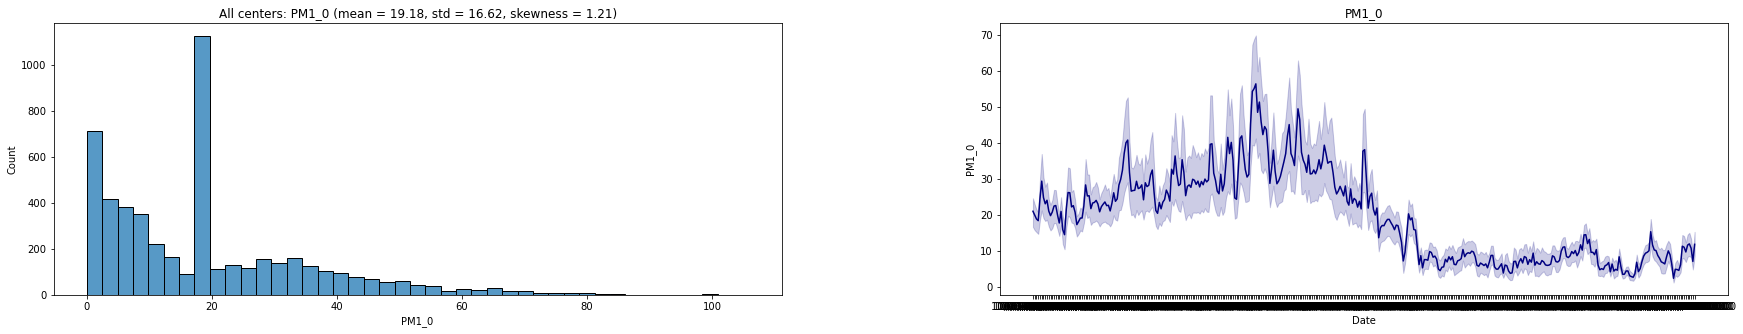

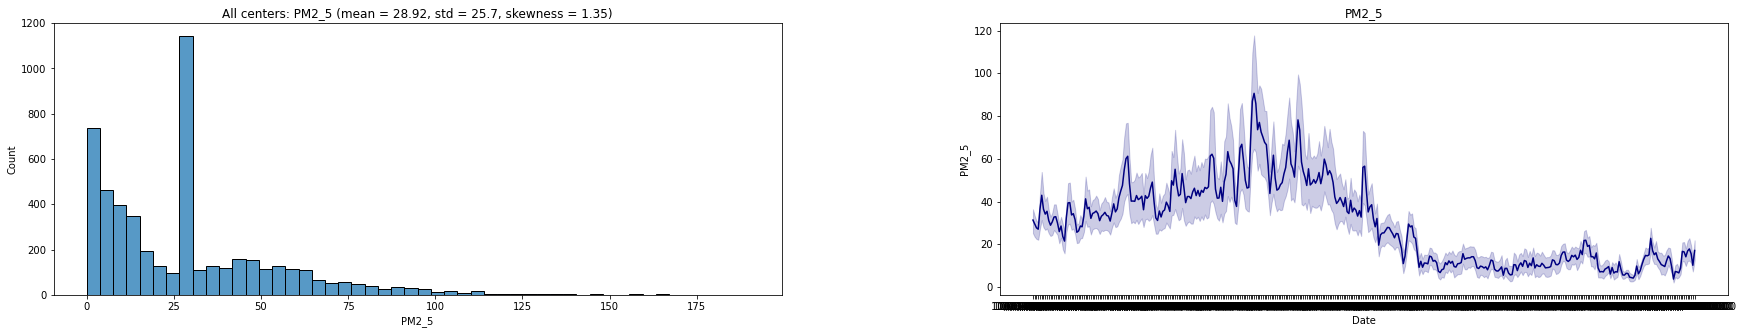

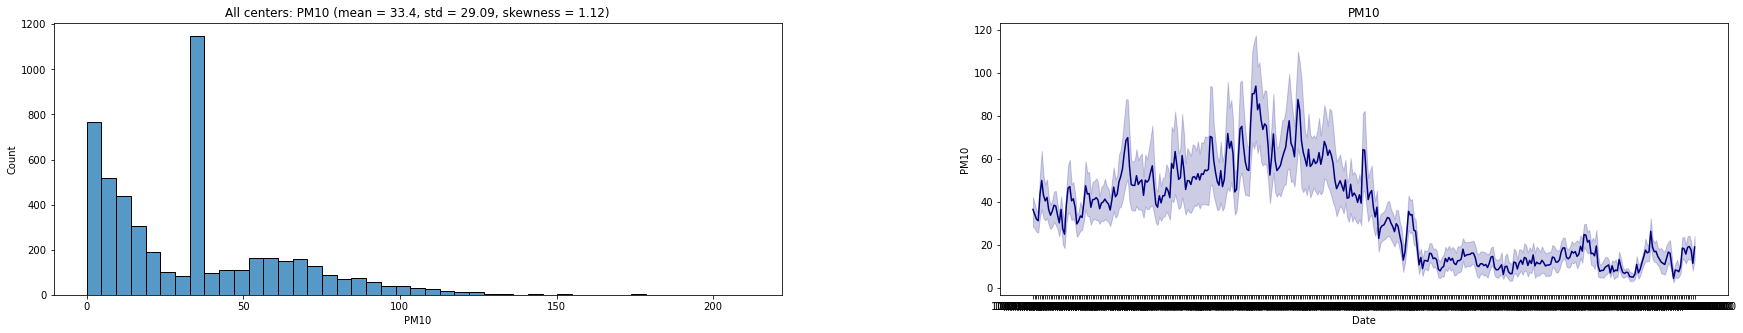

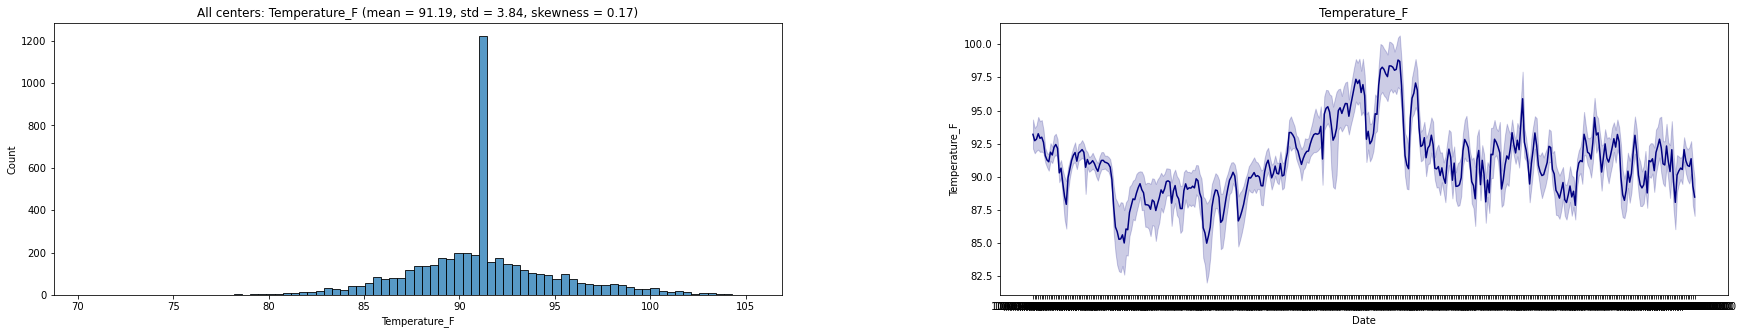

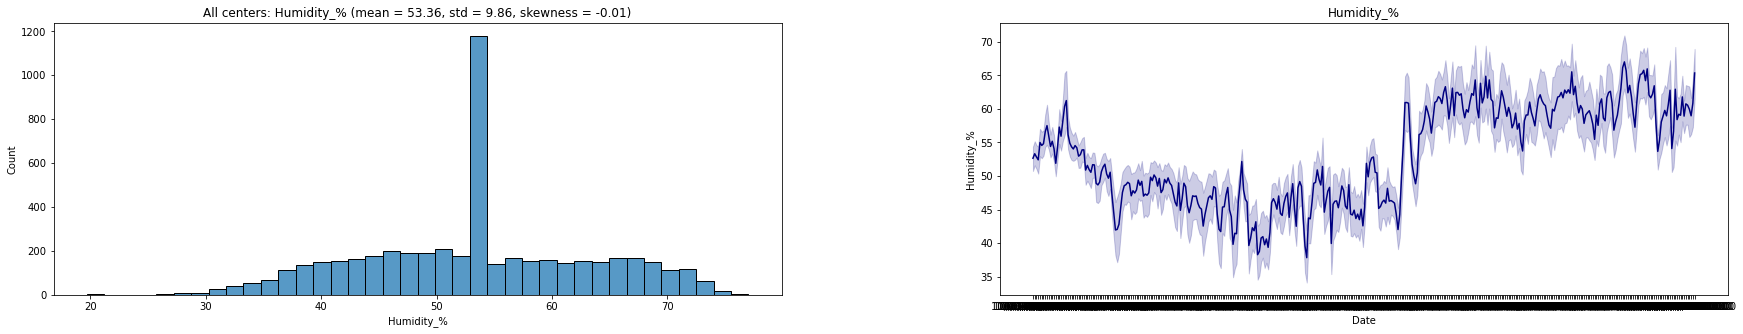

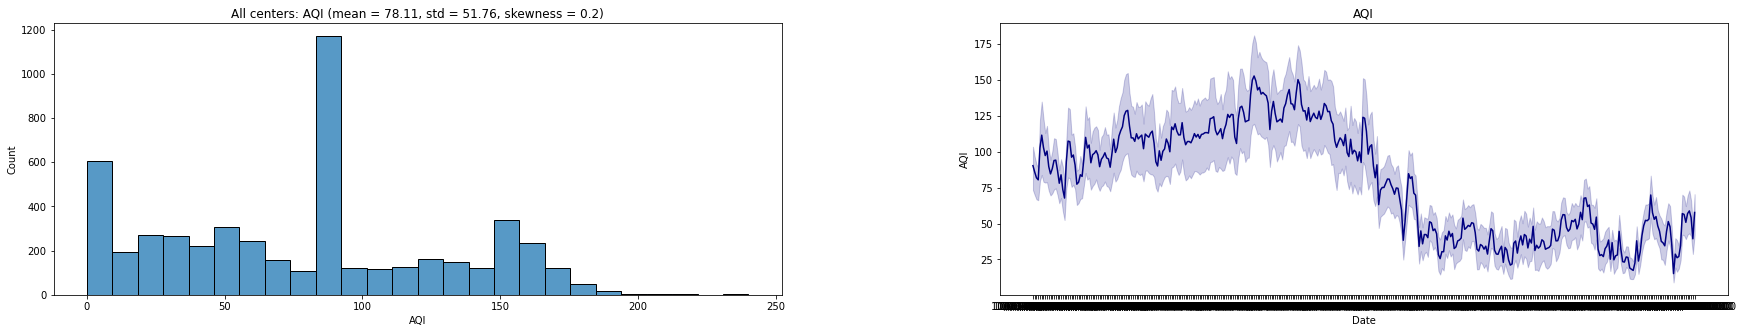

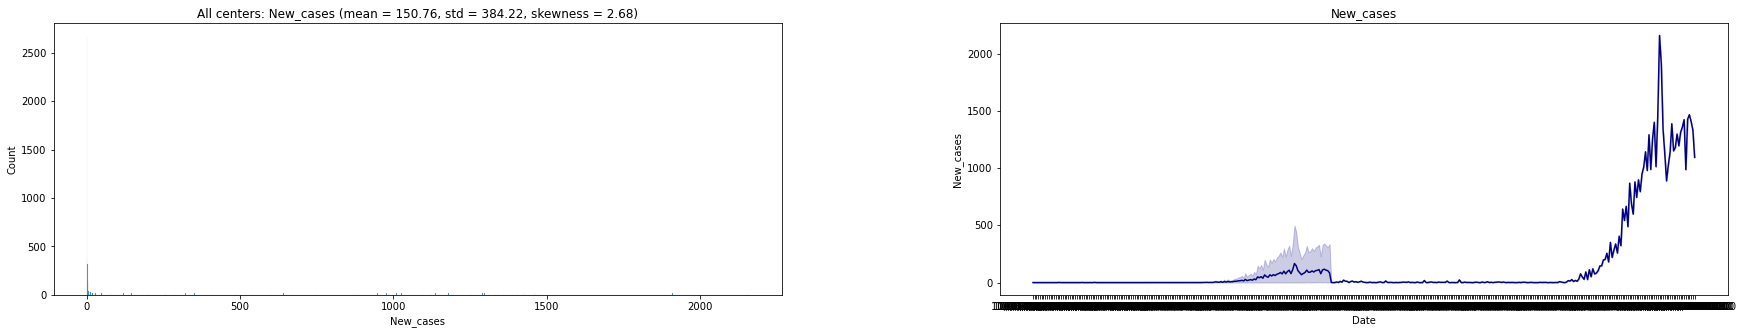

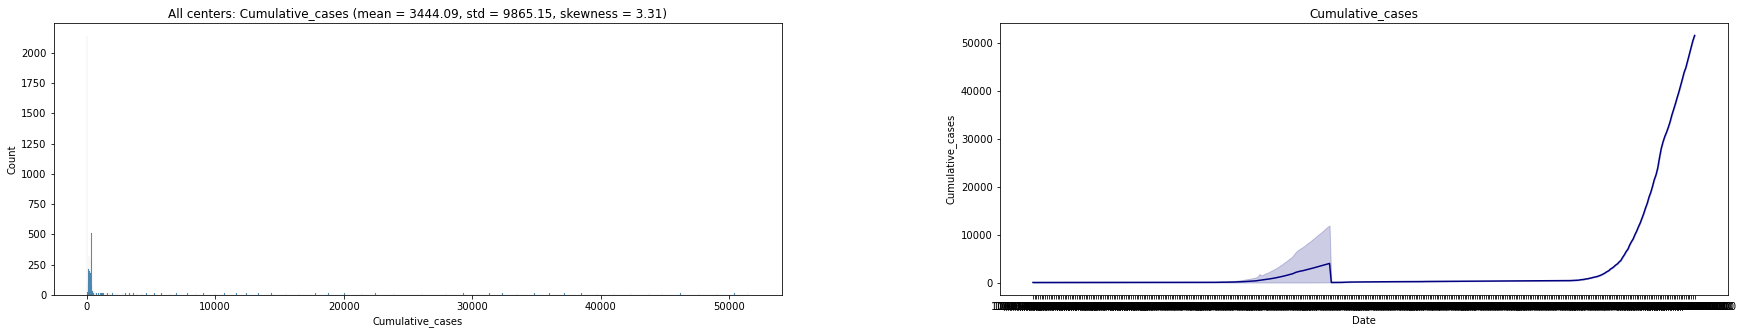

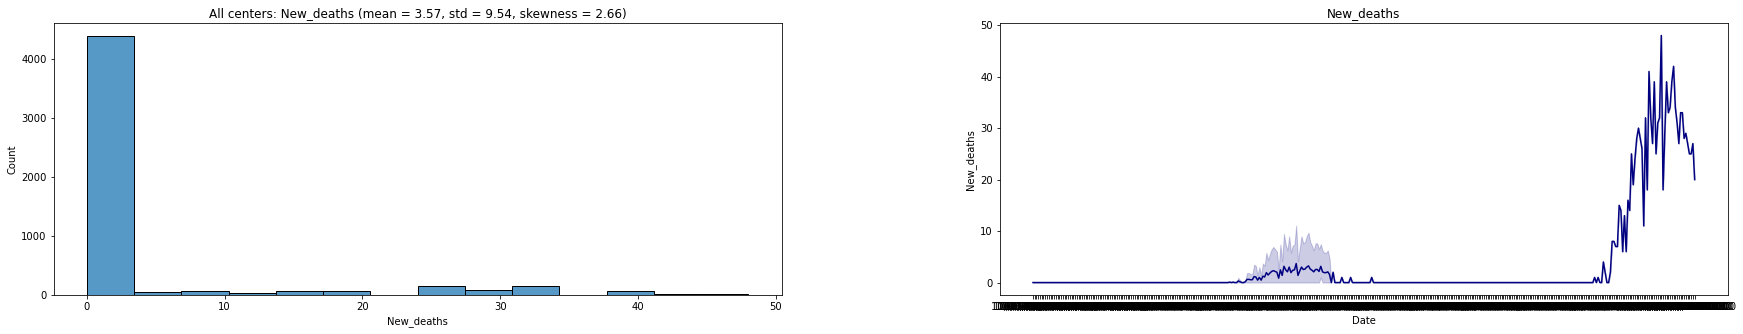

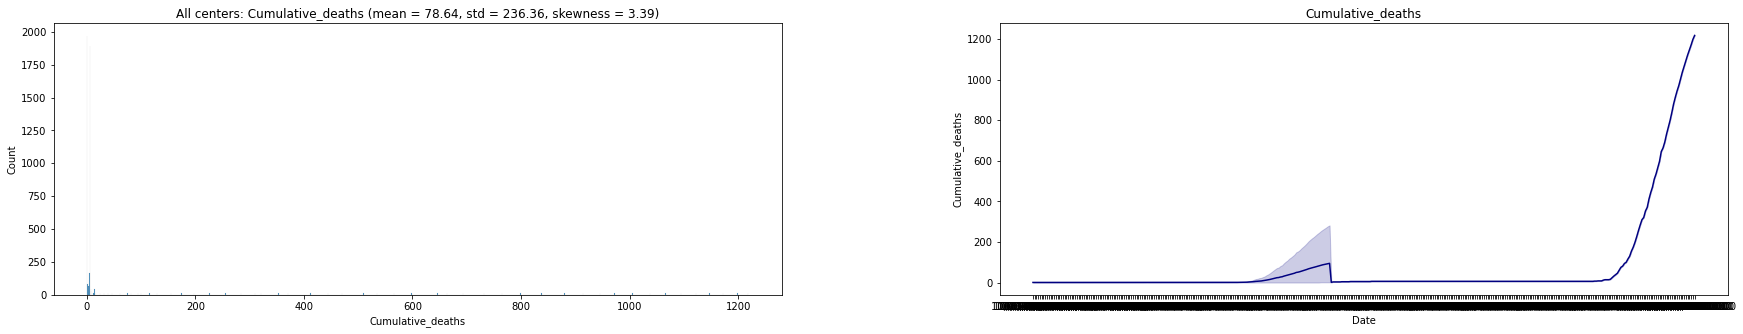

In [23]:
for col in numerical_cols:
    plot_hist_ts(features.Date, features[col], 'All centers:')

Observamos que existen outliers en las columnas de nuevos casos de enfermos y muertes, los cuales se deben a que repentinamente empezaron a existir casos de personas que se enfermaron o murieron por afecciones respiratorias. Por otro lado, en las series de tiempo existe cierta sombra en las gráficas debido a que existen registros por cada centro de medición en un mismo día.

Cabe agregar que cuando la cantidad de enfermos y muertos aumenta los índices de contaminación se mantienen relativamente bajos respecto a meses pasados. Además el comportamiento del AQI respecto al de contaminantes como PM1, PM2.5 y PM10 es similar, y por ello para resumir a dichos contaminantes utilizaremos solamente el AQI como métrica.

## ¿Cómo se comporta a lo largo del tiempo la correlación del AQI, temperatura y % de humedad con los nuevos casos de enfermos y muertes por afecciones respiratorias?

## Series de tiempo

In [24]:
def plot_ts(df, columns, colors, extra_desc = ''):
    __fig__, __axs__ = plt.subplots(1, figsize=(15, 5))
    __fig__.subplots_adjust(hspace=0.1, wspace=0.3)
    __axs__.set(title = extra_desc + ', '.join(columns))
    for col in columns:
        _ = sns.lineplot(x=df.Date, y=df[col], ax=__axs__, color = colors[col], label = col)
    #plt.xticks(np.arange(min(x), max(x)+1, 10.0))
    plt.plot()

### Datos segmentados por centro de medición

In [25]:
centers_cities = features[['City', 'Center']].groupby(['City', 'Center'], as_index=False).count()
centers_cities

City                                             Center
0   Mandalay                                        19th Street
1   Mandalay                                   Jefferson Center
2     Yangon                                  7 Miles Mayangone
3     Yangon     Ahlone Myanmar Center for Responsible Business
4     Yangon                                    American Center
5     Yangon                             Beca Myanmar (Outside)
6     Yangon                                         GEMS Condo
7     Yangon                         Pun Hlaing Dulwich College
8     Yangon                          Star City Dulwich College
9     Yangon  Thin Gan Gyun Yangon International School (Out...
10    Yangon                                      UNOPS Myanmar
11    Yangon                                        WWF-Myanmar
12    Yangon                             YIS Grade 4 C (Inside)
13    Yangon                                          Yangon-HO

In [26]:
sel_numerical_cols = ['AQI', 'Temperature_F', 'Humidity_%']
sel_effects_cols = ['New_cases', 'New_deaths']

In [30]:
colors_numerical_cols = {'AQI': 'Navy', 'Temperature_F': 'Green', 'Humidity_%': 'Orange'}
colors_effects_cols = {'New_cases': 'Black', 'New_deaths': 'Red'}

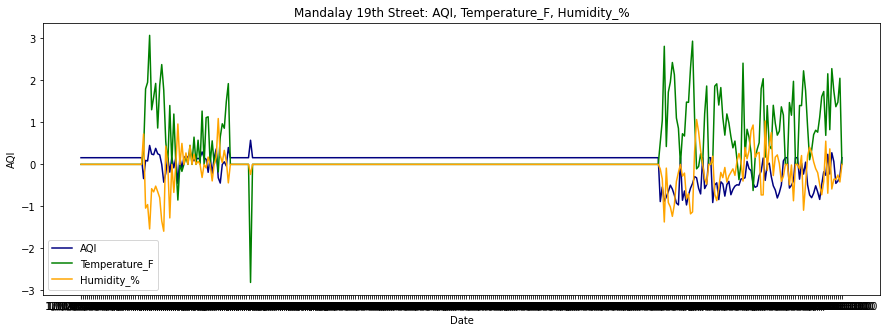

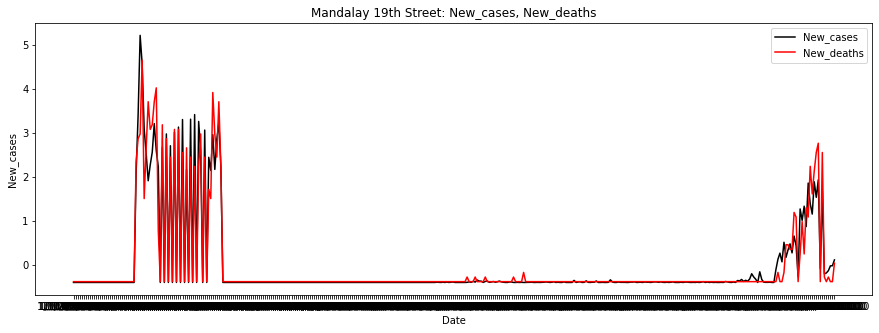

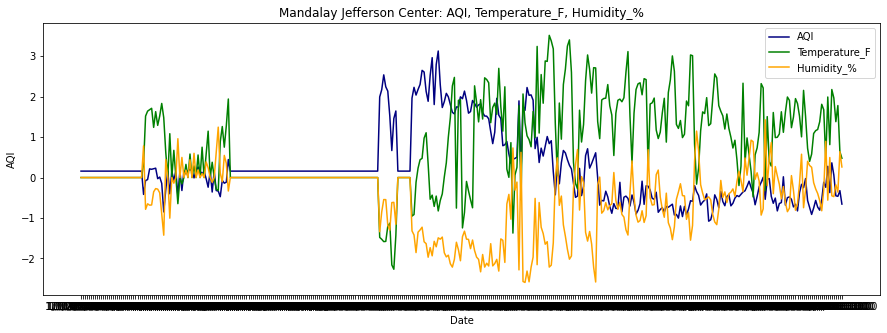

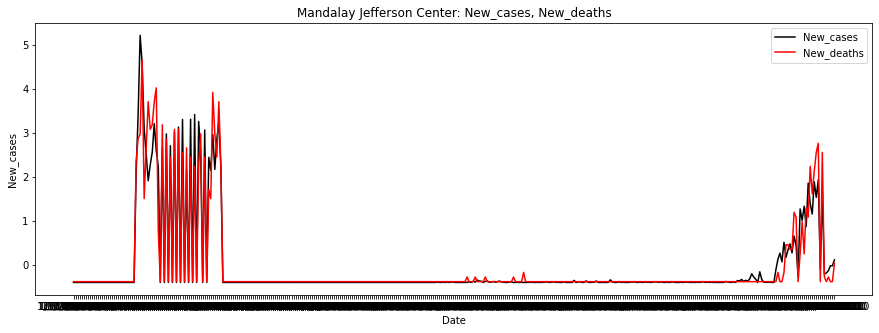

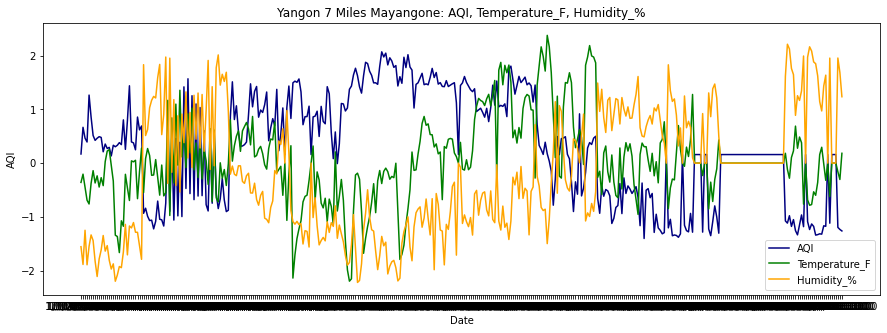

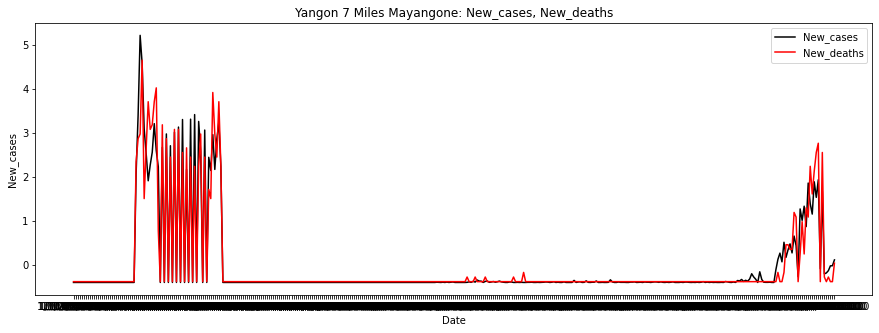

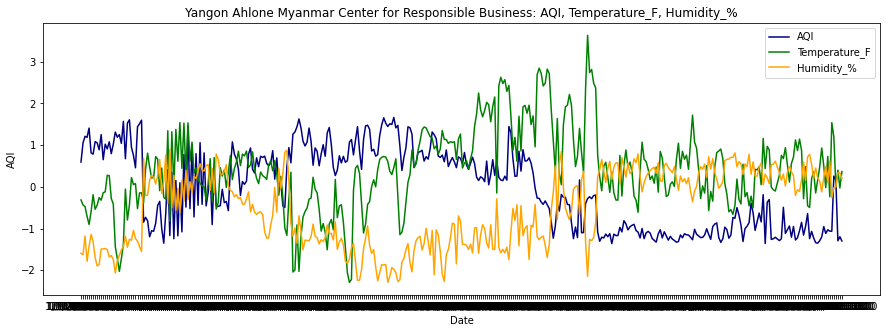

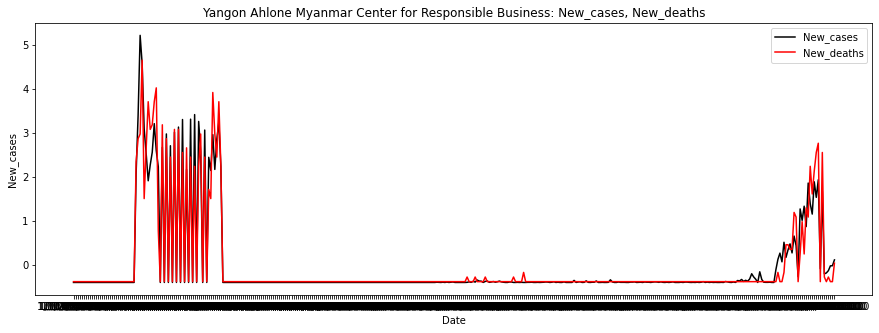

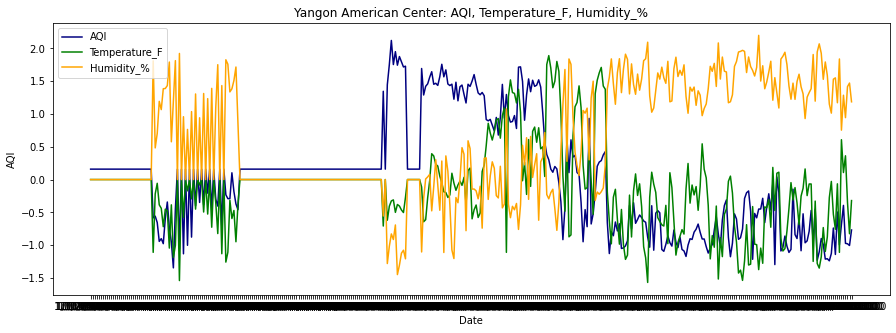

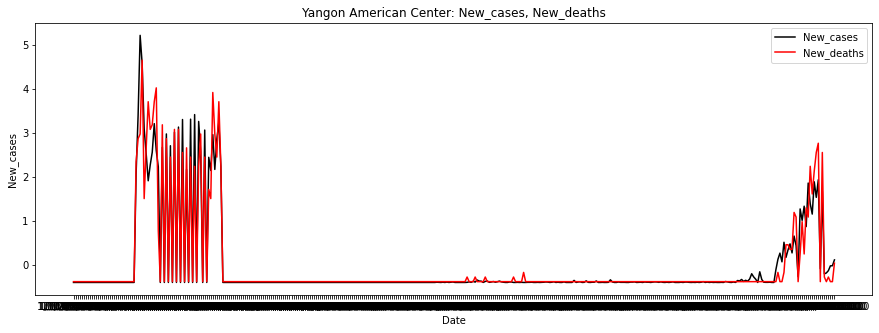

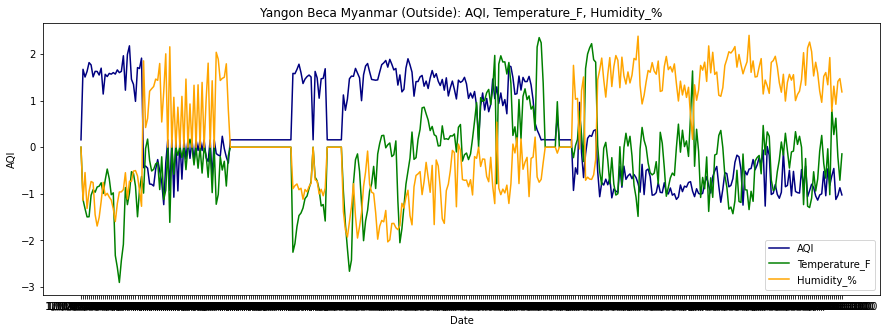

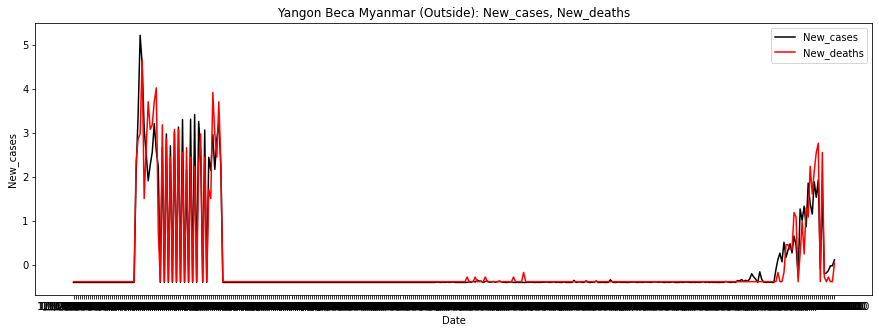

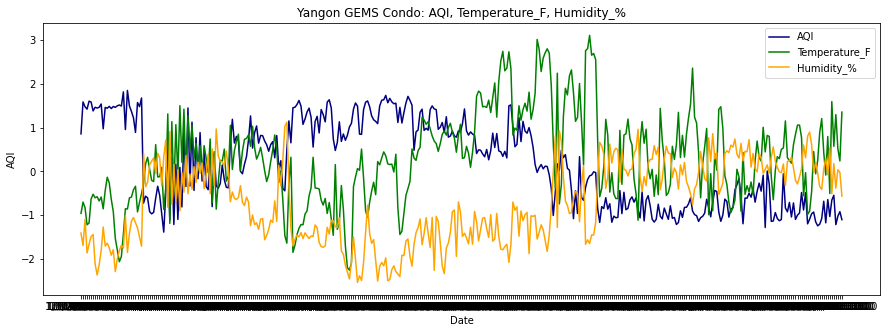

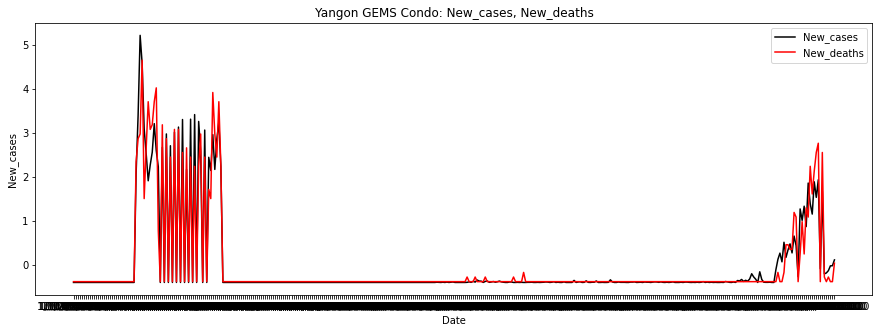

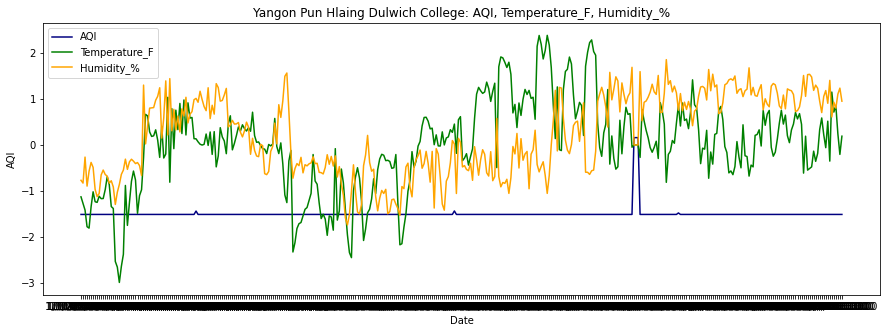

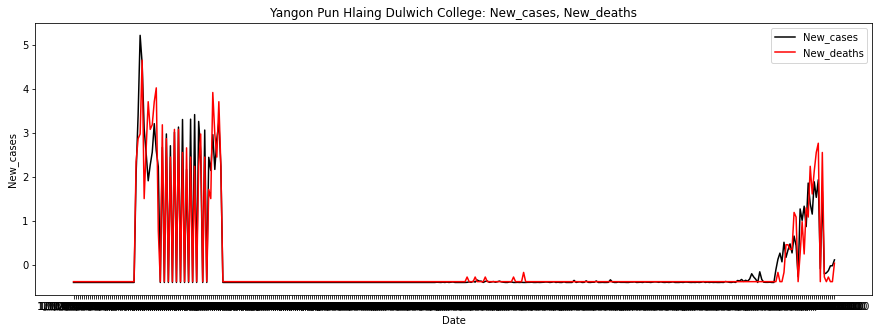

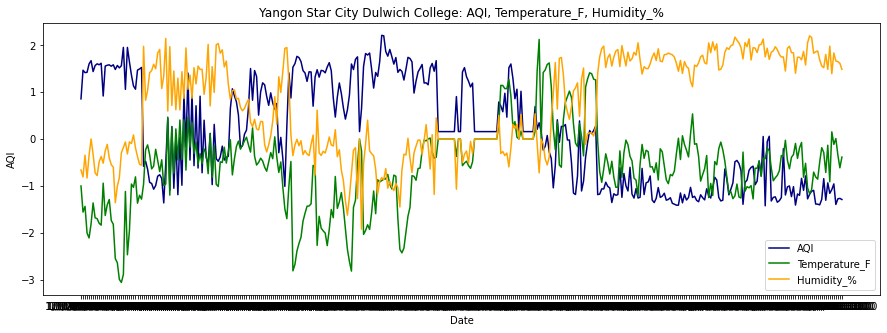

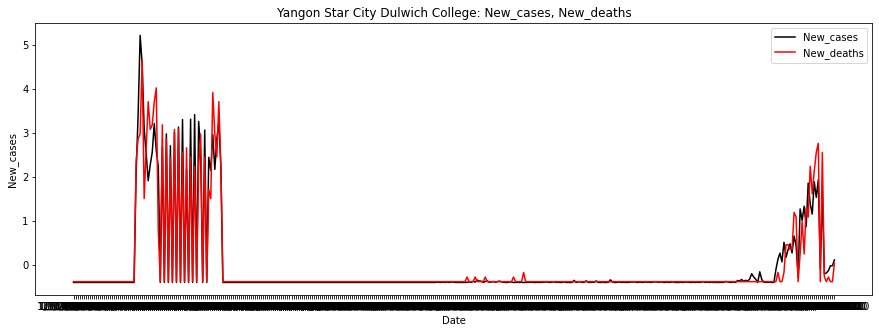

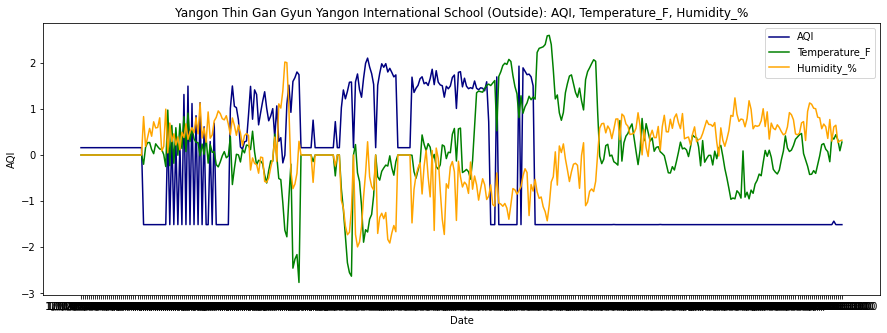

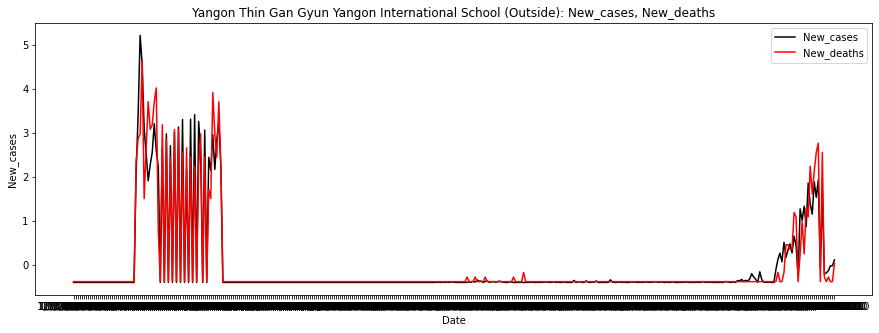

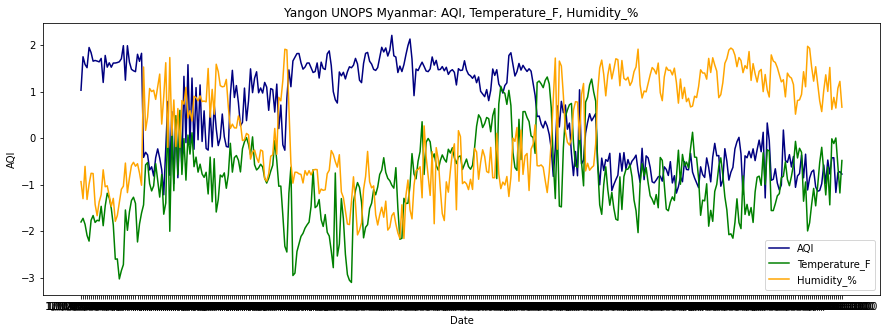

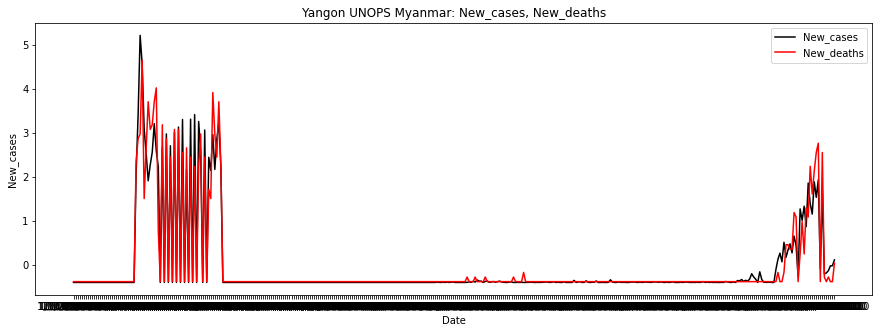

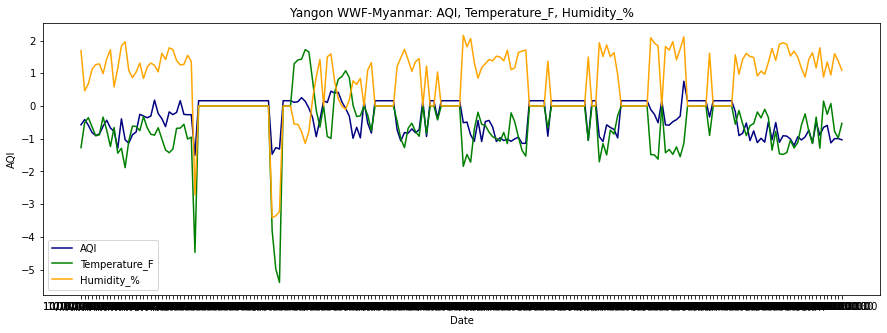

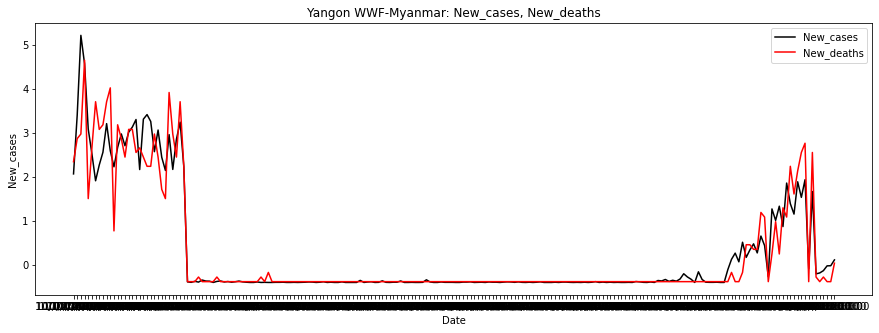

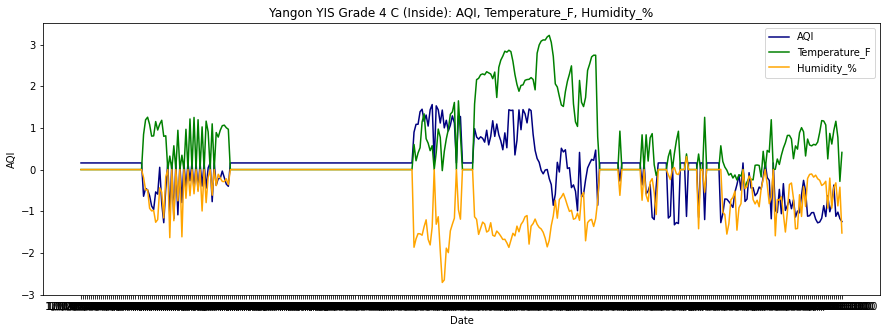

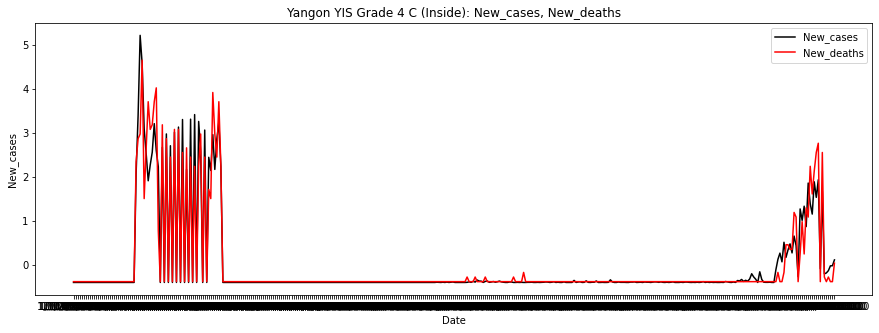

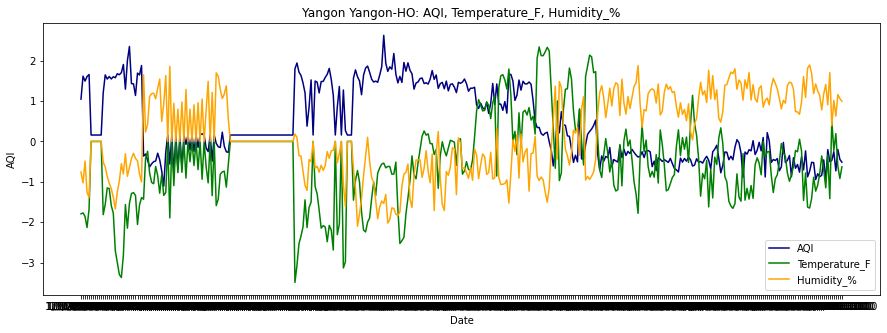

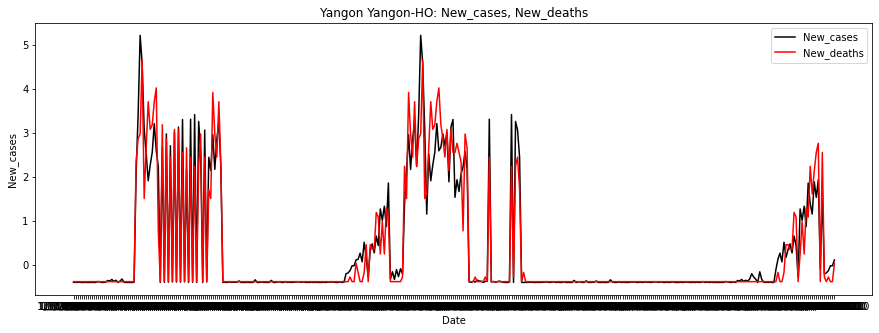

In [31]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = normalized_df[normalized_df.Center == center].sort_values(by = 'Date')
    plot_ts(center_data, sel_numerical_cols, colors_numerical_cols, city + ' ' + center + ': ')
    plot_ts(center_data, sel_effects_cols, colors_effects_cols, city + ' ' + center + ': ')

### Datos agrupados por ciudad (media)

In [57]:
df_city_grouped_mean = normalized_df.groupby(['City', 'Date'], as_index=False)[['PM1_0', 'PM2_5', 'PM10', 'Temperature_F', 'Humidity_%', 'AQI', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].mean()
df_city_grouped_mean

City            Date     PM1_0     PM2_5      PM10  Temperature_F  \
0    Mandalay   1/1/2020 0:00 -0.000231 -0.000116 -0.000027       0.000955   
1    Mandalay  1/10/2020 0:00 -0.000231 -0.000116 -0.000027       0.000955   
2    Mandalay  1/11/2020 0:00 -0.000231 -0.000116 -0.000027       0.000955   
3    Mandalay  1/12/2020 0:00 -0.000231 -0.000116 -0.000027       0.000955   
4    Mandalay  1/13/2020 0:00 -0.000231 -0.000116 -0.000027       0.000955   
..        ...             ...       ...       ...       ...            ...   
751    Yangon   9/5/2020 0:00 -0.595523 -0.574909 -0.544440       0.287267   
752    Yangon   9/6/2020 0:00 -0.819697 -0.807945 -0.830525       0.418593   
753    Yangon   9/7/2020 0:00 -0.921704 -0.898281 -0.945468      -0.065468   
754    Yangon   9/8/2020 0:00 -0.913881 -0.910440 -0.938880      -0.475075   
755    Yangon   9/9/2020 0:00 -0.940662 -0.932910 -0.958902       0.025266   

     Humidity_%       AQI  New_cases  Cumulative_cases  New_deaths  \
0      0.000353  0.159609  -0.392390         -0.349117   -0.374213   
1      0.000353  0.159609  -0.392390         -0.349117   -0.374213   
2      0.000353  0.159609  -0.392390         -0.349117   -0.374213   
3      0.000353  0.159609  -0.392390         -0.349117   -0.374213   
4      0.000353  0.159609  -0.392390         -0.349117   -0.374213   
..          ...       ...        ...               ...         ...   
751    0.744541 -0.542766  -0.176369         -0.225855   -0.374213   
752    0.541872 -0.962227  -0.124316         -0.215414   -0.269343   
753    0.929891 -1.064947  -0.015004         -0.200716   -0.374213   
754    0.944252 -1.070066  -0.012401         -0.185916   -0.374213   
755    0.603543 -1.110816   0.120335         -0.165947    0.045269   

     Cumulative_deaths  
0            -0.332695  
1            -0.332695  
2            -0.332695  
3            -0.332695  
4            -0.332695  
..                 ...  
751          -0.303079  
752          -0.298848  
753          -0.298848  
754          -0.298848  
755          -0.281925  

[756 rows x 12 columns]

In [58]:
cities = list(set(df_city_grouped_mean.City))
cities

['Yangon', 'Mandalay']

In [59]:
#sel_numerical_cols = ['AQI', 'Temperature_F', 'Humidity_%', 'New_cases', 'New_deaths']
sel_numerical_cols = ['AQI', 'Temperature_F', 'Humidity_%']
sel_effects_cols = ['New_cases', 'New_deaths']

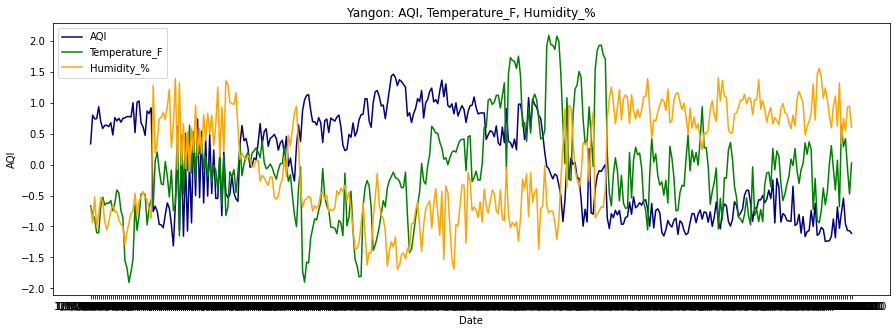

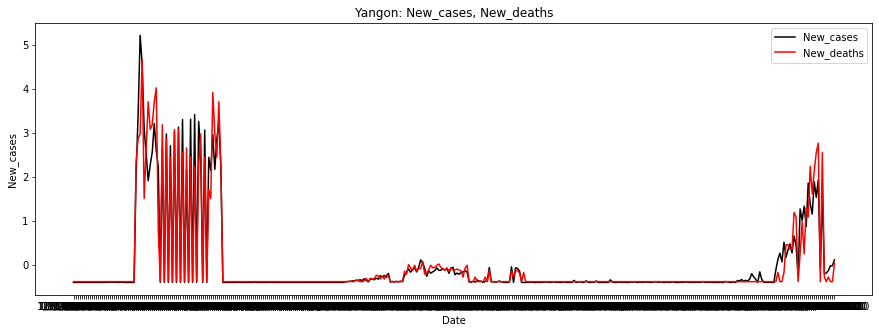

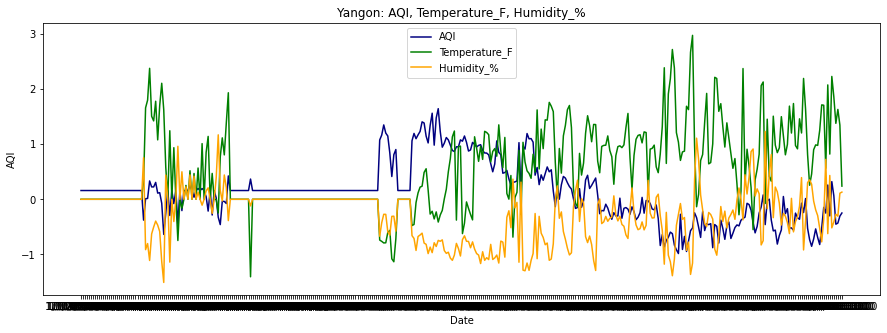

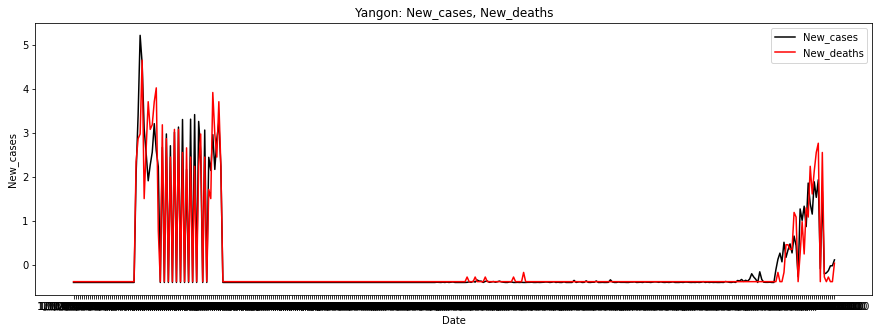

In [63]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    plot_ts(city_data, sel_numerical_cols, colors_numerical_cols, city + ': ')
    plot_ts(city_data, sel_effects_cols, colors_effects_cols, city + ': ')

## Correlogramas de casos y muertes por enfermedades respiratorias con AQI, temperatura y % de humedad

In [32]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la autocovarianza.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para loscuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    # CÓDIGO AQUI
    
    mean_ts1 = time_series_1.mean()
    mean_ts2 = time_series_2.mean()
    if isinstance(lags, int):
        num_times = len(time_series_1)
        prods = np.array(num_times - lags)
        ts1_lag = np.array(time_series_1)[lags:]
        ts2_lag = np.array(time_series_2)[:num_times - lags]
        prods = (ts1_lag - mean_ts1) * (ts2_lag - mean_ts2)
        cvar = sum(prods) / len(prods)
        #print(cvar)
        
        return cvar
    
    else:
        cvars = list()
        for lag in lags:
            num_times = len(time_series_1)
            prods = np.array(num_times - lag)
            ts1_lag = np.array(time_series_1)[lag:]
            ts2_lag = np.array(time_series_2)[:num_times - lag]
            prods = (ts1_lag - mean_ts1) * (ts2_lag - mean_ts2)
            cvar = sum(prods) / len(prods)
            cvars.append(cvar)
        #print(cvars)
        
        return cvars
    
    return None

In [33]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para los cuales debe calcularse la correlación.
            
    Salidas:
    - Si lags es un número debe regresar un valor de correlación, si es una lista, 
        debe ser una lista de correlaciones.
    """
    
    # CÓDIGO AQUI
    
    if isinstance(lags, int):
        cvar12 = crossvariance(time_series_1, time_series_2, lags)
        cvar11 = crossvariance(time_series_1, time_series_1, 0)
        cvar22 = crossvariance(time_series_2, time_series_2, 0)
        c_corr = cvar12 / ((cvar11 * cvar22) ** (1/2))
        
        return c_corr
    
    else:
        c_corrs = list()
        for lag in lags:
            var12 = crossvariance(time_series_1, time_series_2, lag)
            cvar11 = crossvariance(time_series_1, time_series_1, 0)
            cvar22 = crossvariance(time_series_2, time_series_2, 0)
            c_corr = cvar12 / ((cvar11 * cvar22) ** (1/2))
            c_corrs.append(c_corr)
        
        return c_corrs
    
    return None

In [34]:
def plot_correlogram(col1, col2, extra_desc = '', H = 100):
    lags = [l for l in range(H)]
    c_corrs = np.array([crosscorrelation(col1, col2, l) for l in lags])
    std = (np.var(c_corrs)) ** (1 / 2)
    std_2 = 2 * std
    std_2_5 = 2.5 * std
    std_3 = 3 * std
    __fig__, __axs__ = plt.subplots(1, figsize = (30,5))
    __axs__.set_xticklabels(__axs__.get_xticklabels(), rotation=90, ha="right")
    
    __axs__.set(title="{} Correlograma {} vs {} (std = {})".format(extra_desc, col1.name, col2.name, round(std, 2)))
    
    _ = sns.barplot(x=lags, y=c_corrs, palette="mako", ax=__axs__)
    _.axhline(y=std_2, color='#9dd017', ls='--', lw=1.5, label = '2x std')
    _.axhline(y=std_2_5, color='#2fff3c', ls='--', lw=1.5, label = '2.5x std')
    _.axhline(y=std_3, color='#62e2ff', ls='--', lw=1.5, label = '3x std')
    _.axhline(y=-std_2, color='#9dd017', ls='--', lw=1.5, label = '-2x std')
    _.axhline(y=-std_2_5, color='#2fff3c', ls='--', lw=1.5, label = '-2.5x std')
    _.axhline(y=-std_3, color='#62e2ff', ls='--', lw=1.5, label = '-3x std')
    __axs__.legend(title='Std criteria', title_fontsize = 10)
    
    plt.tight_layout()

### Datos segmentados por centro de medición

In [35]:
centers_cities = features[['City', 'Center']].groupby(['City', 'Center'], as_index=False).count()

#### Nuevos casos de enfermos vs AQI

In [36]:
sel_numerical_cols = ['AQI']
sel_effects_cols = ['New_cases']

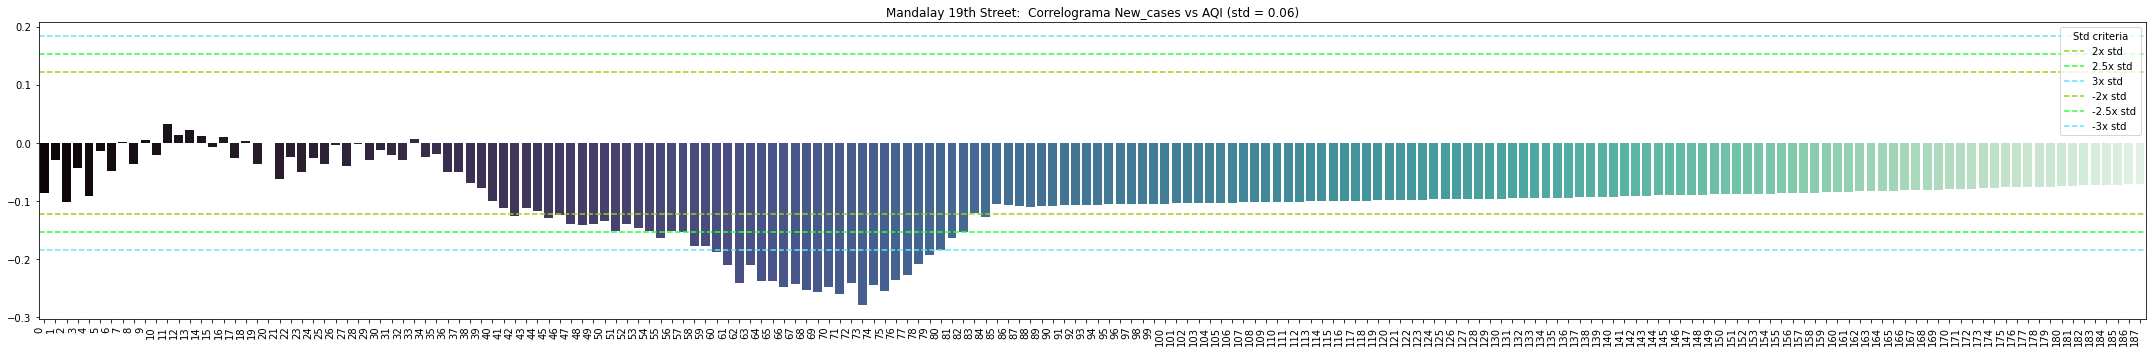

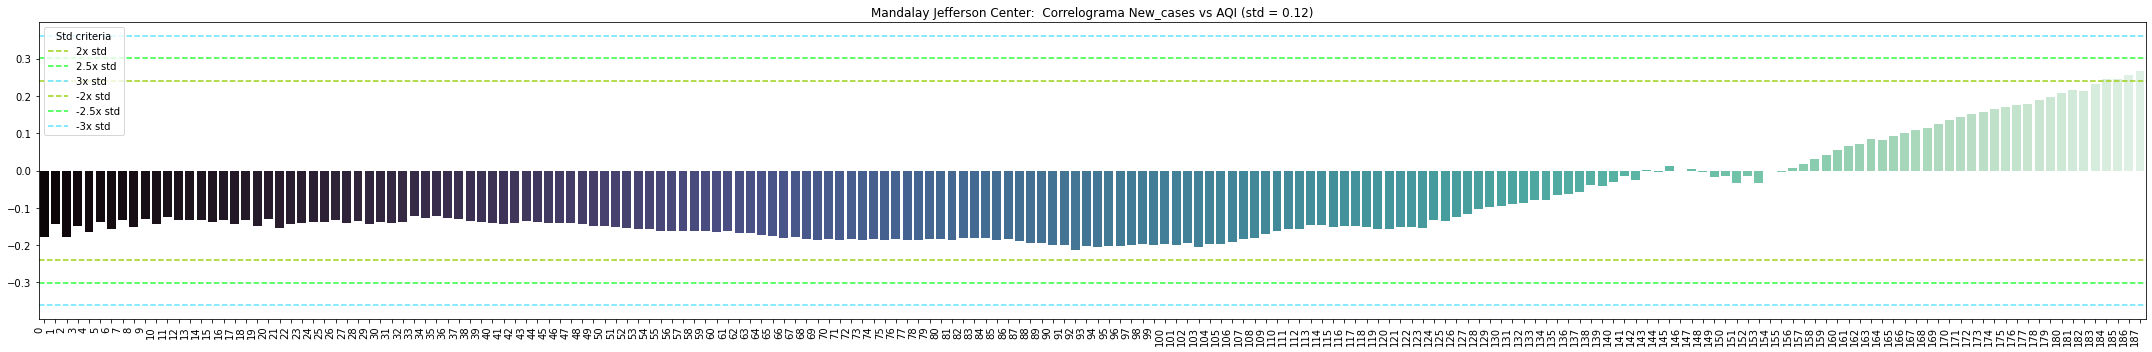

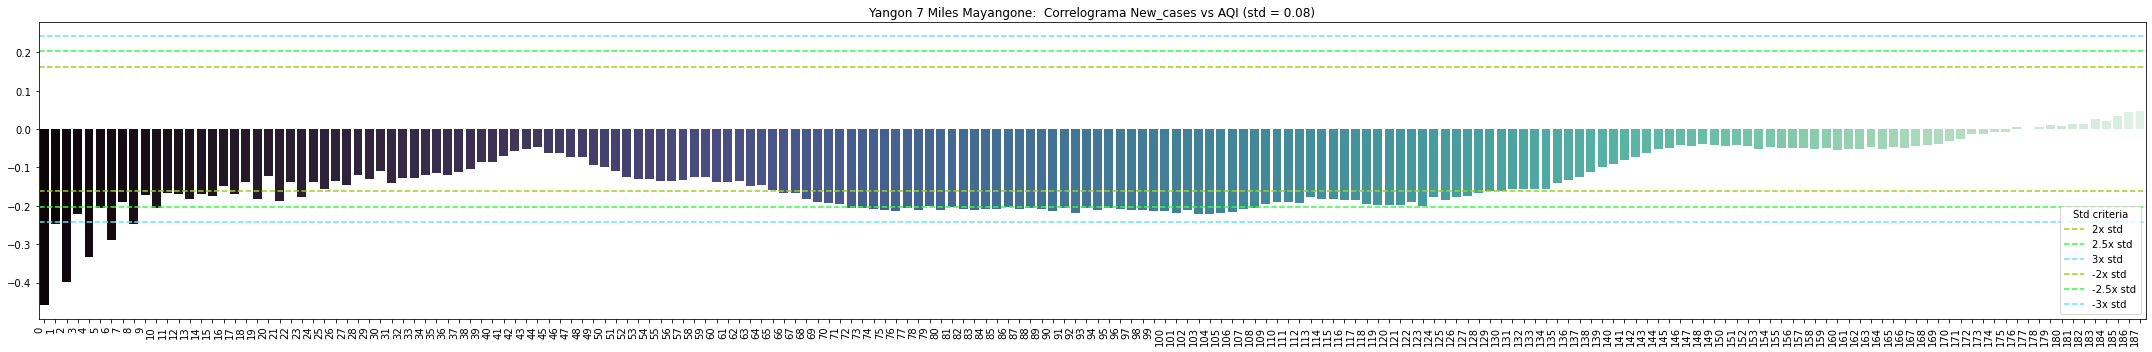

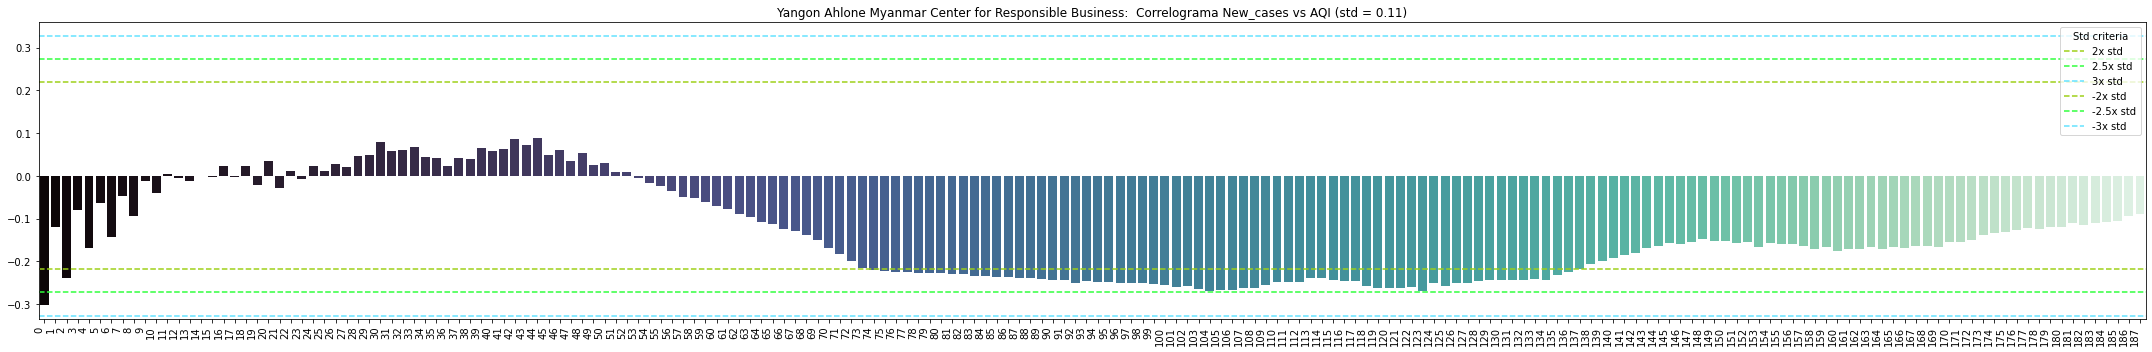

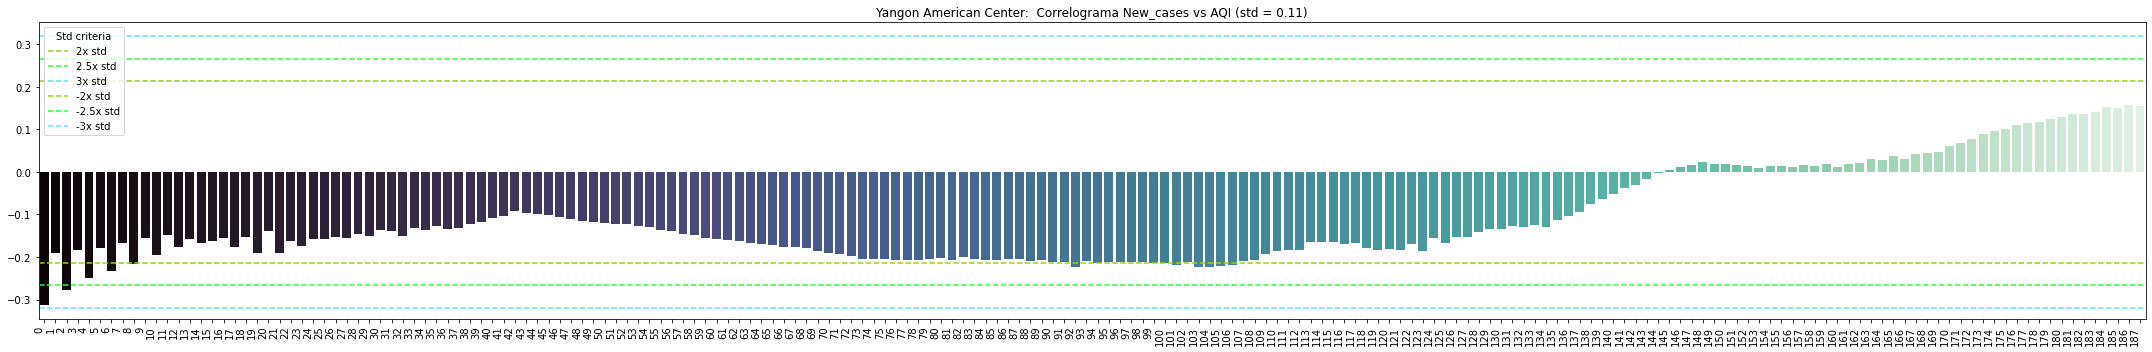

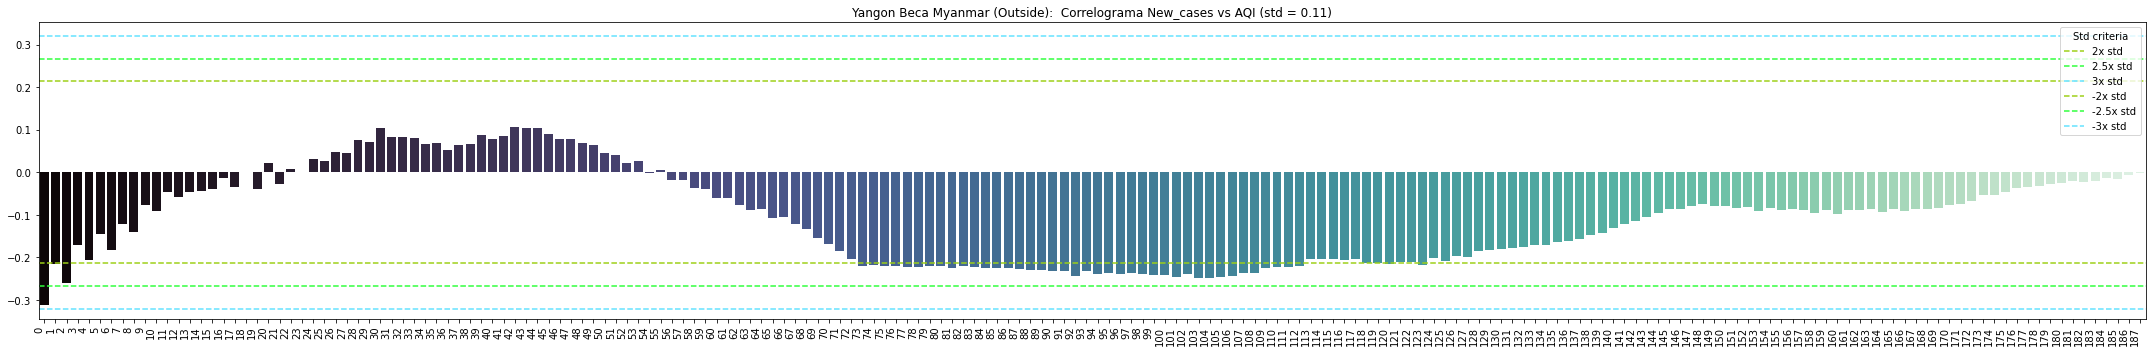

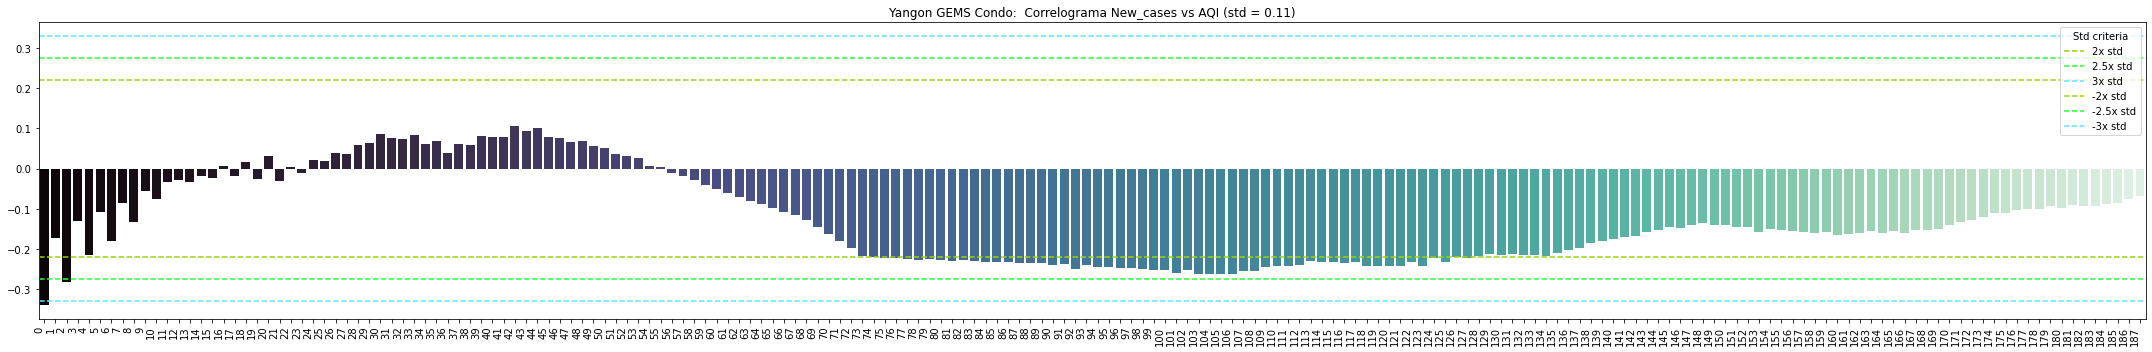

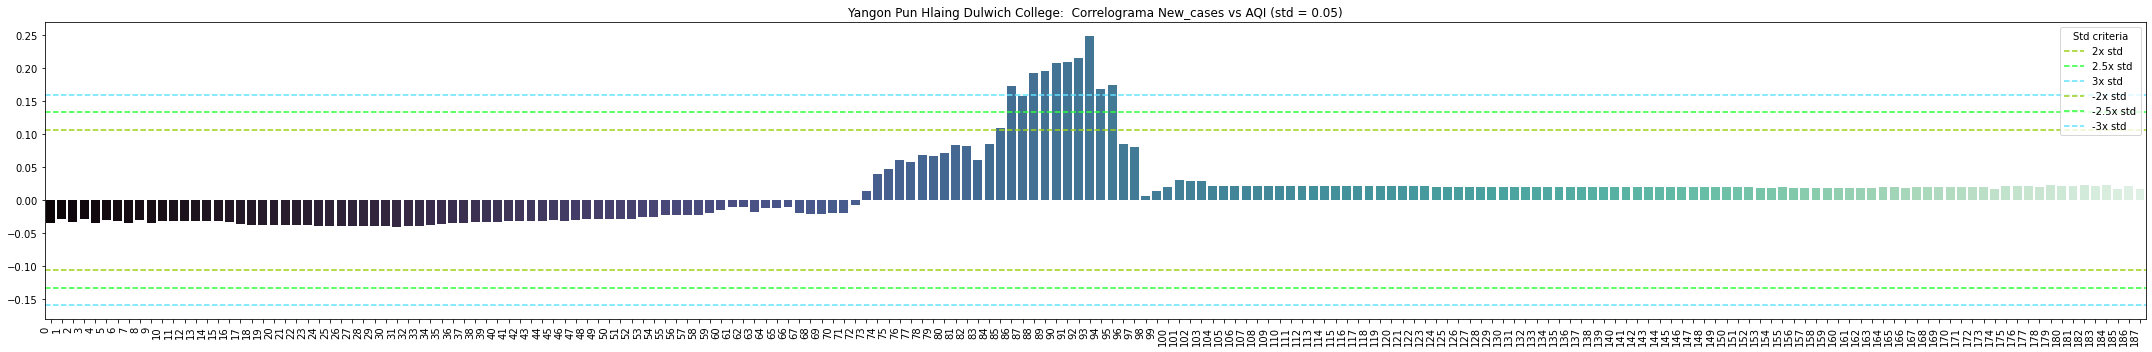

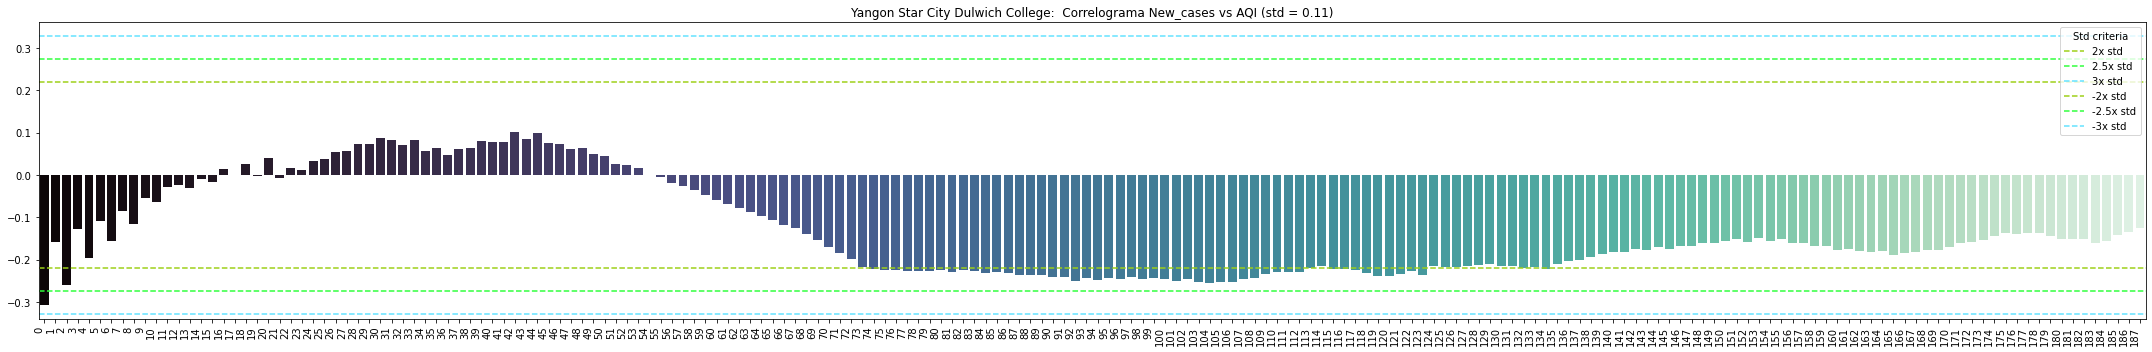

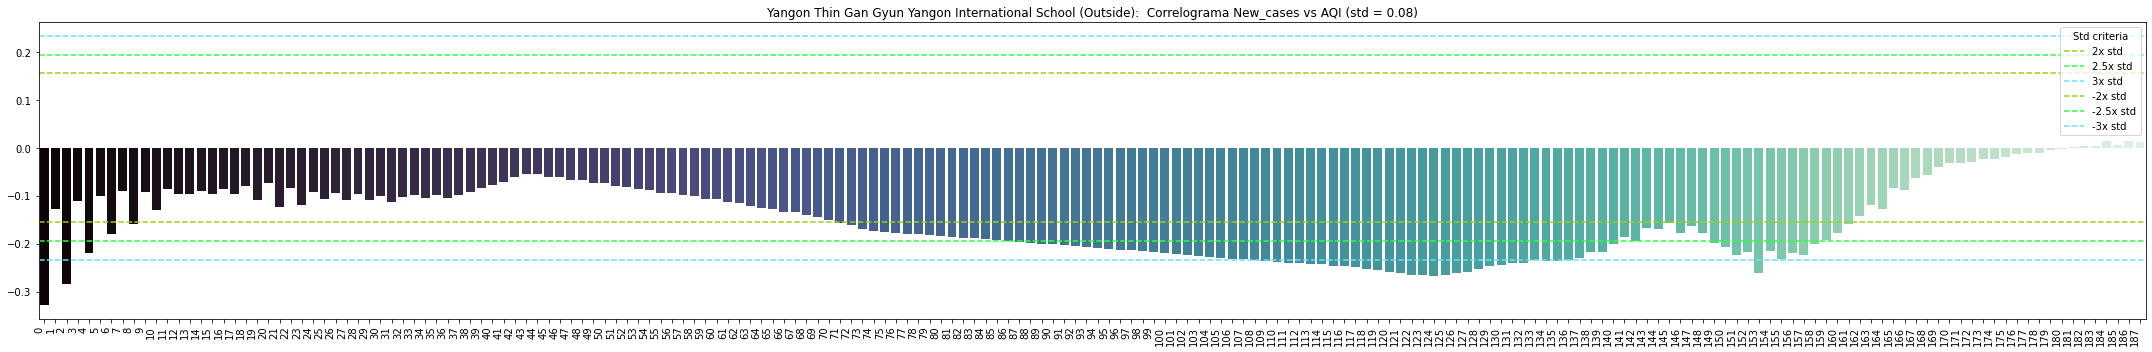

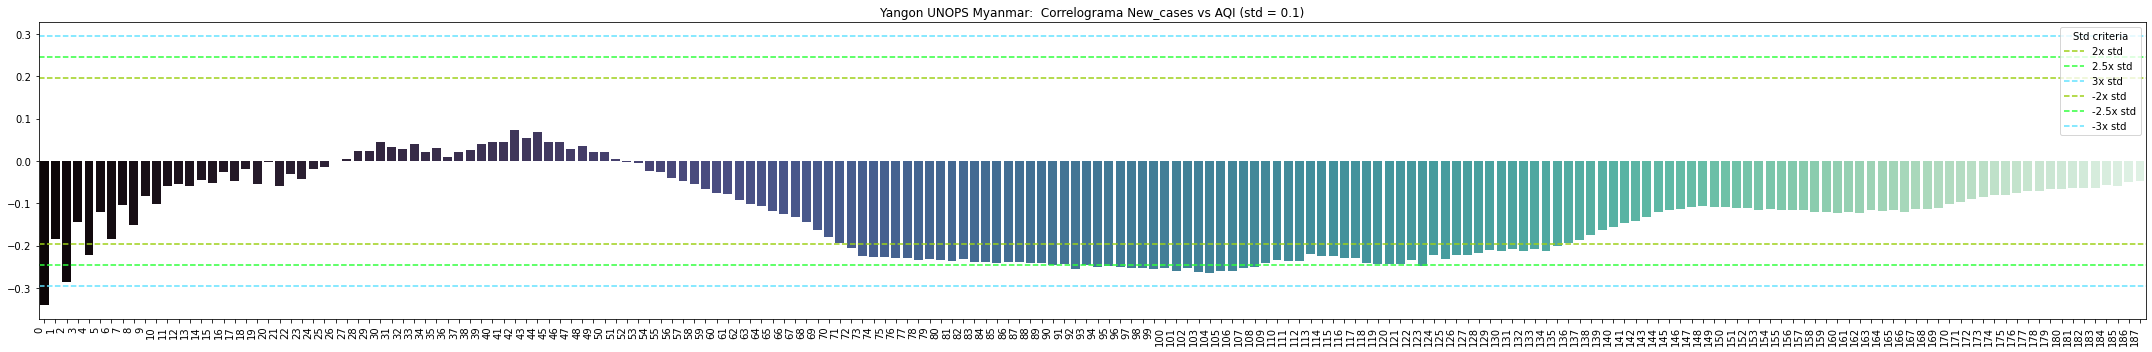

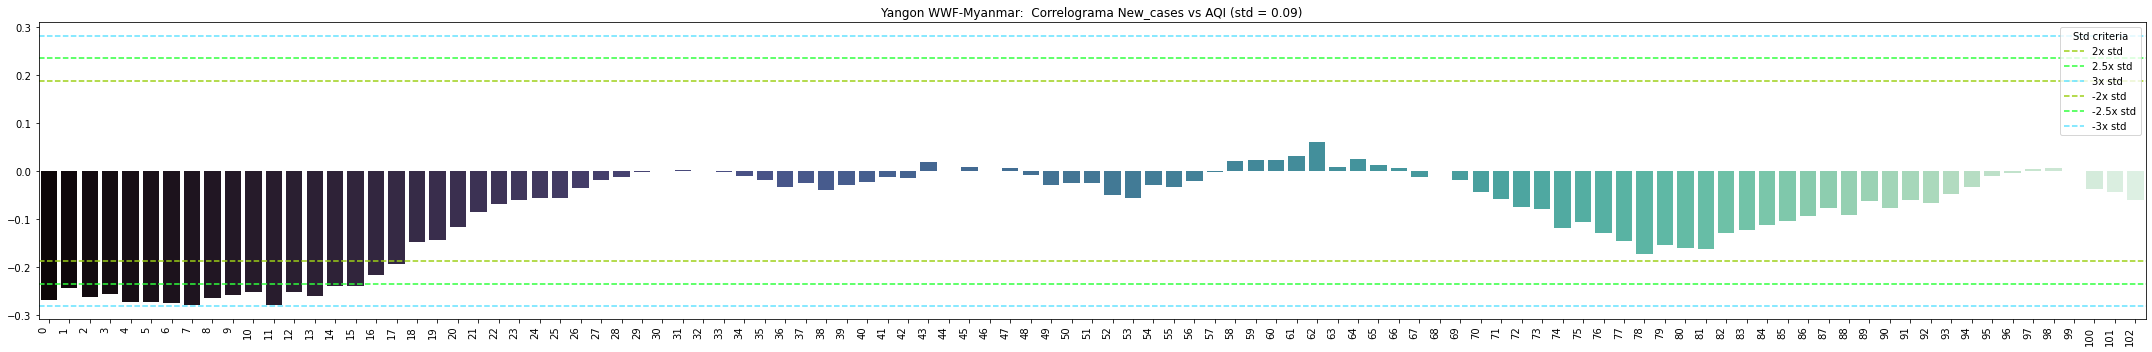

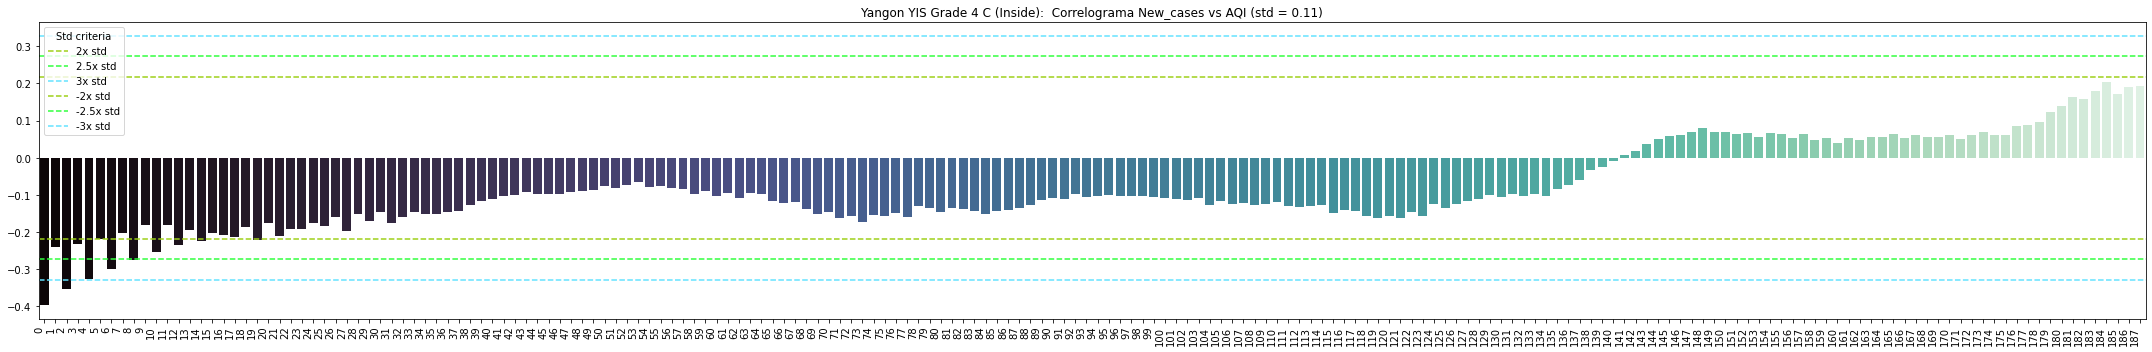

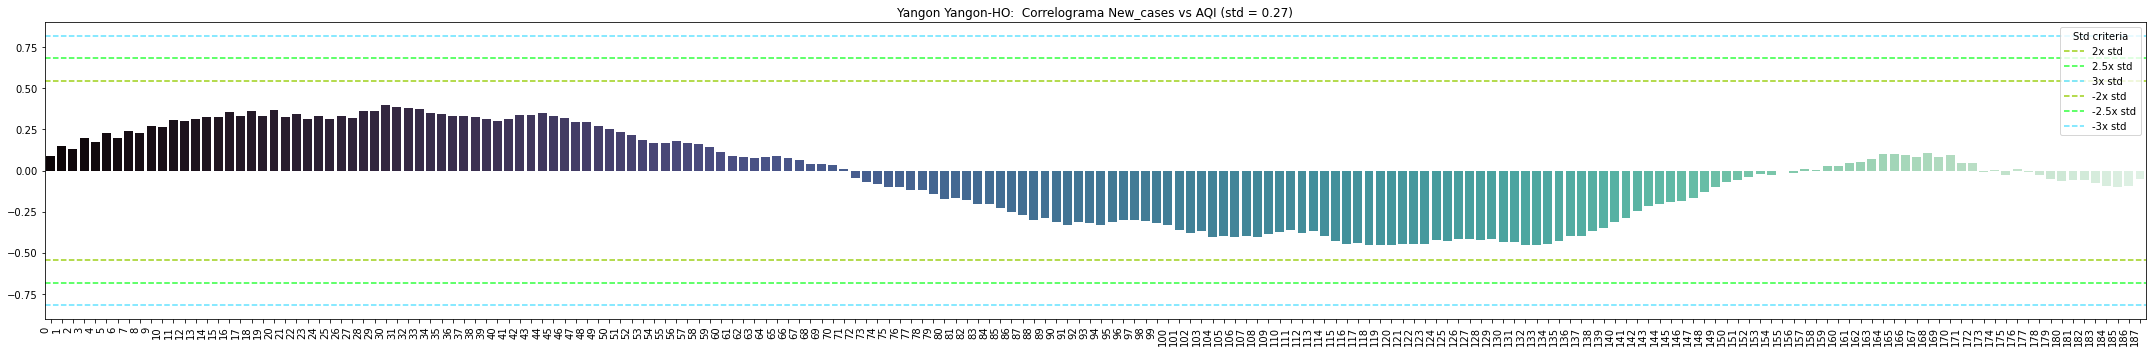

In [37]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = features[features.Center == center].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(center_data[col2], center_data[col1], city + ', ' + center + ': ', H)

#### Nuevos casos de muertes vs AQI

In [38]:
sel_numerical_cols = ['AQI']
sel_effects_cols = ['New_deaths']

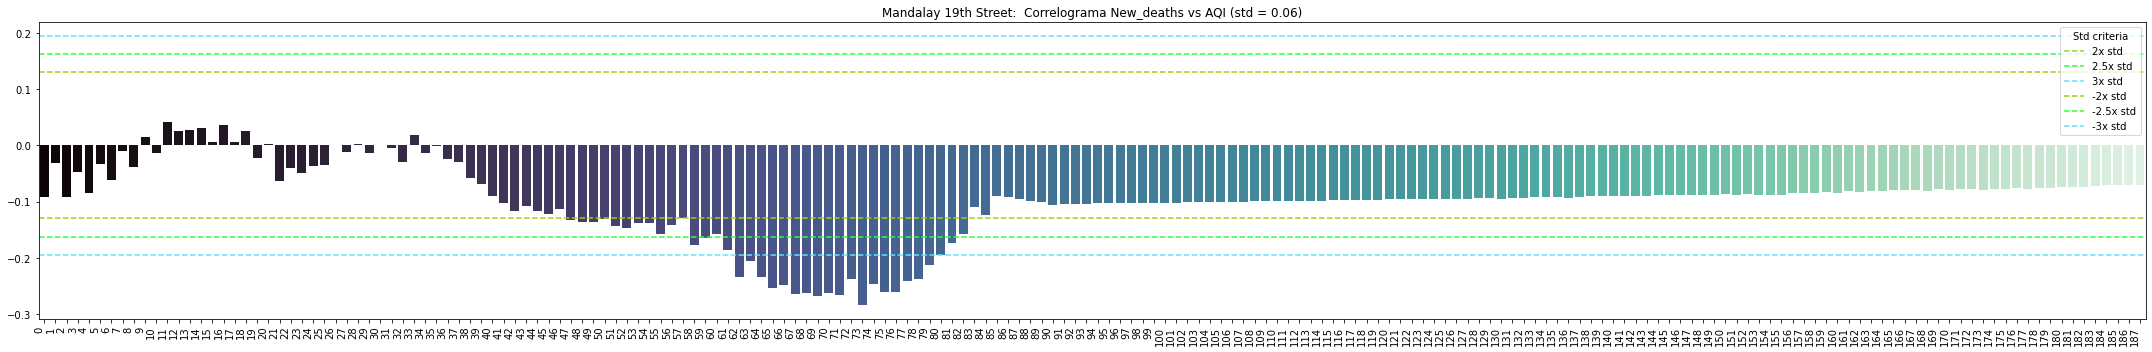

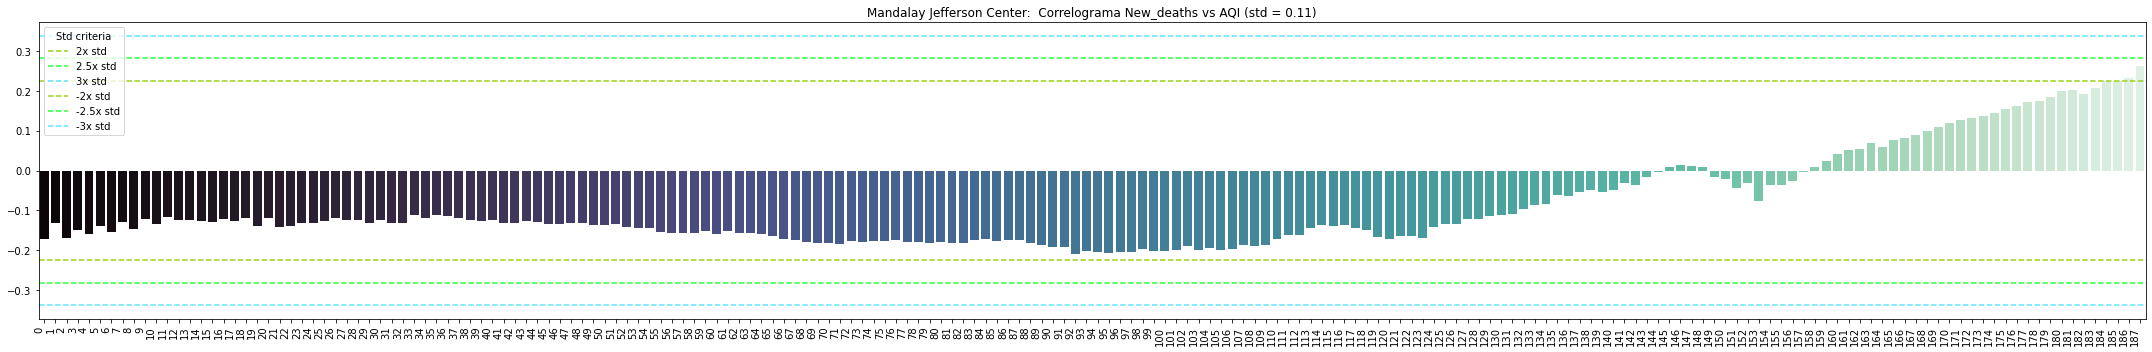

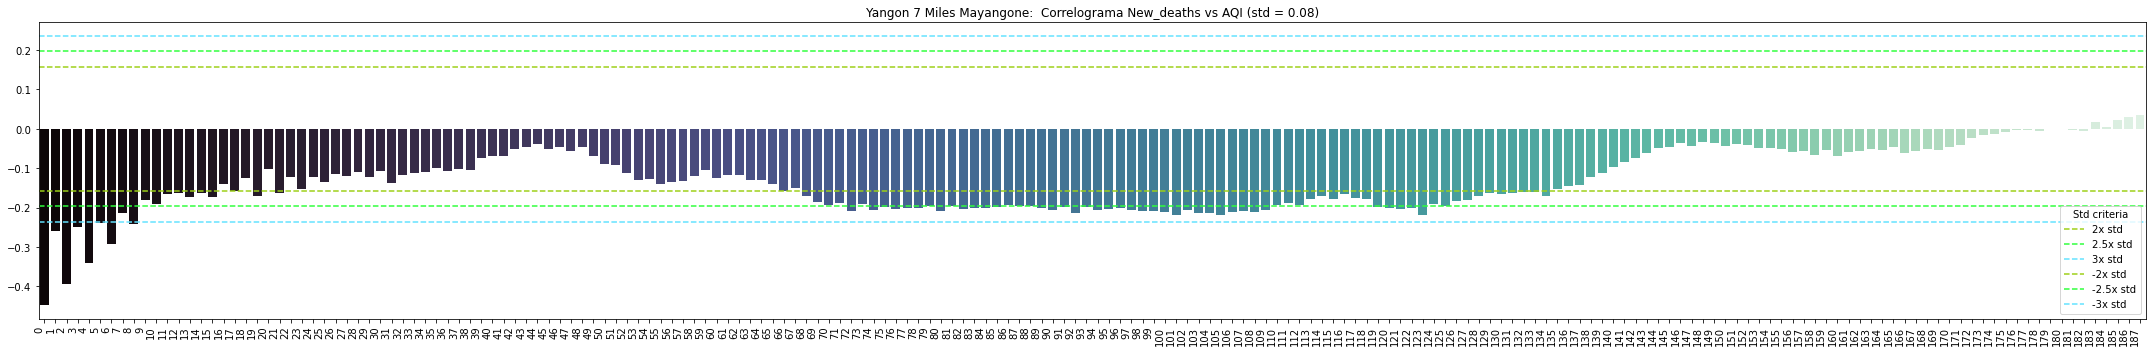

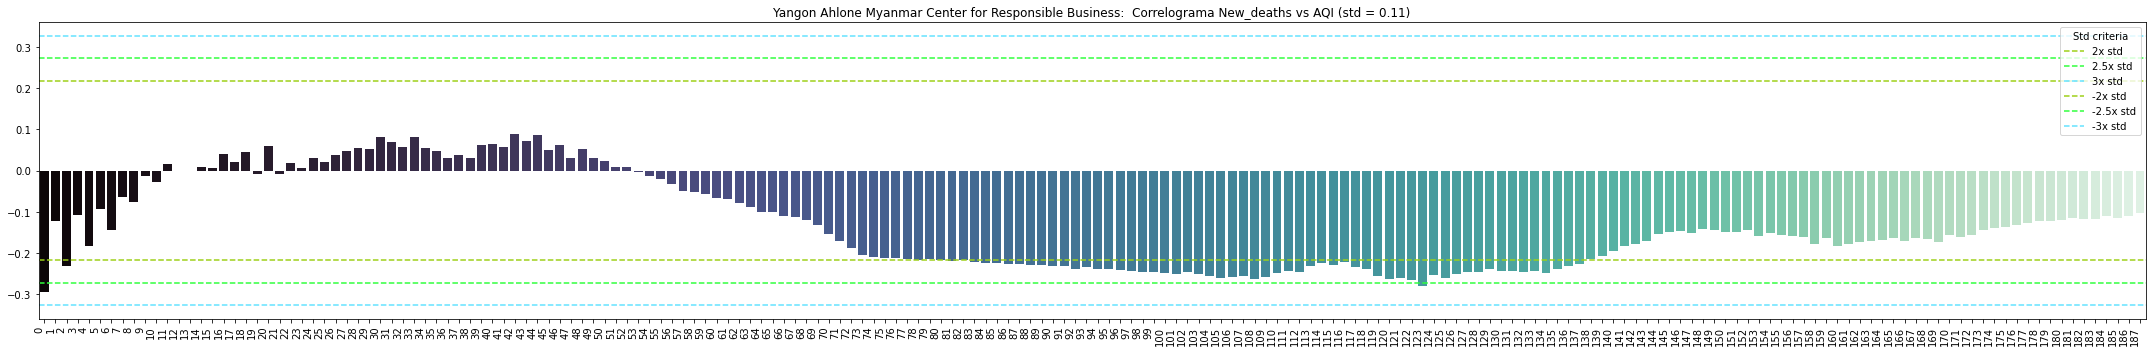

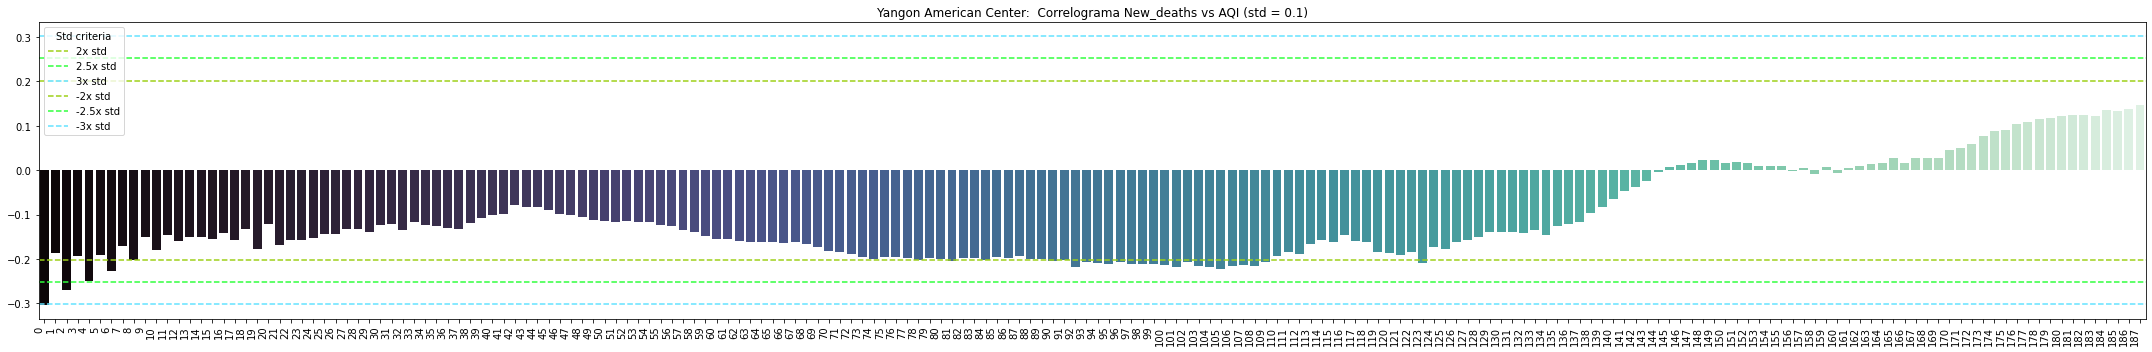

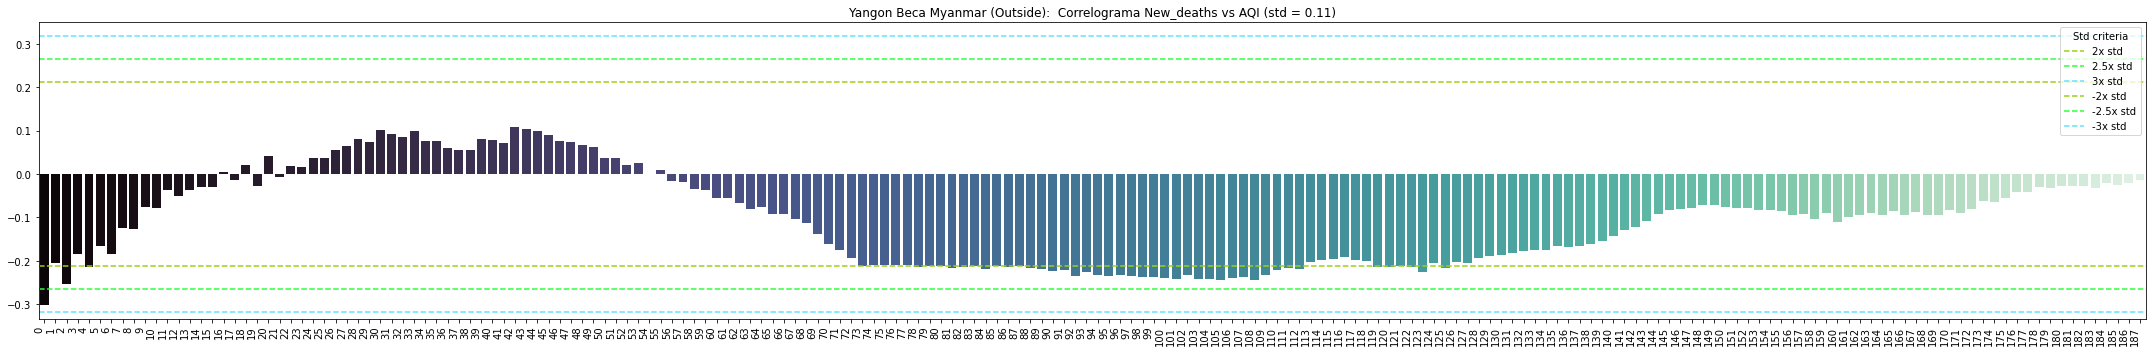

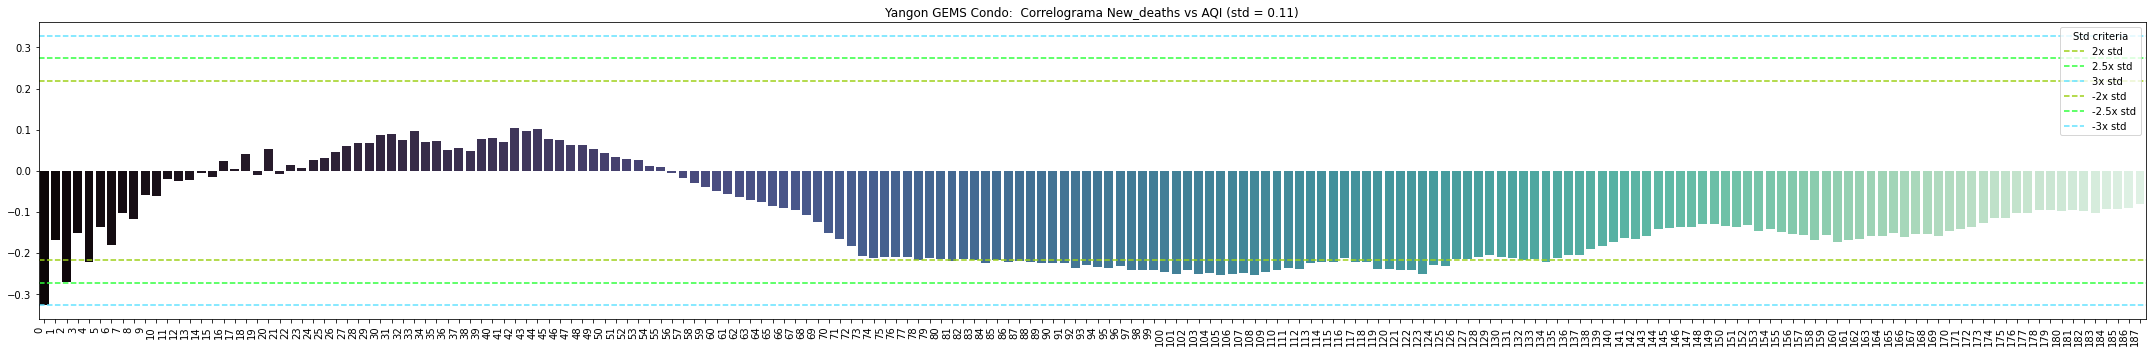

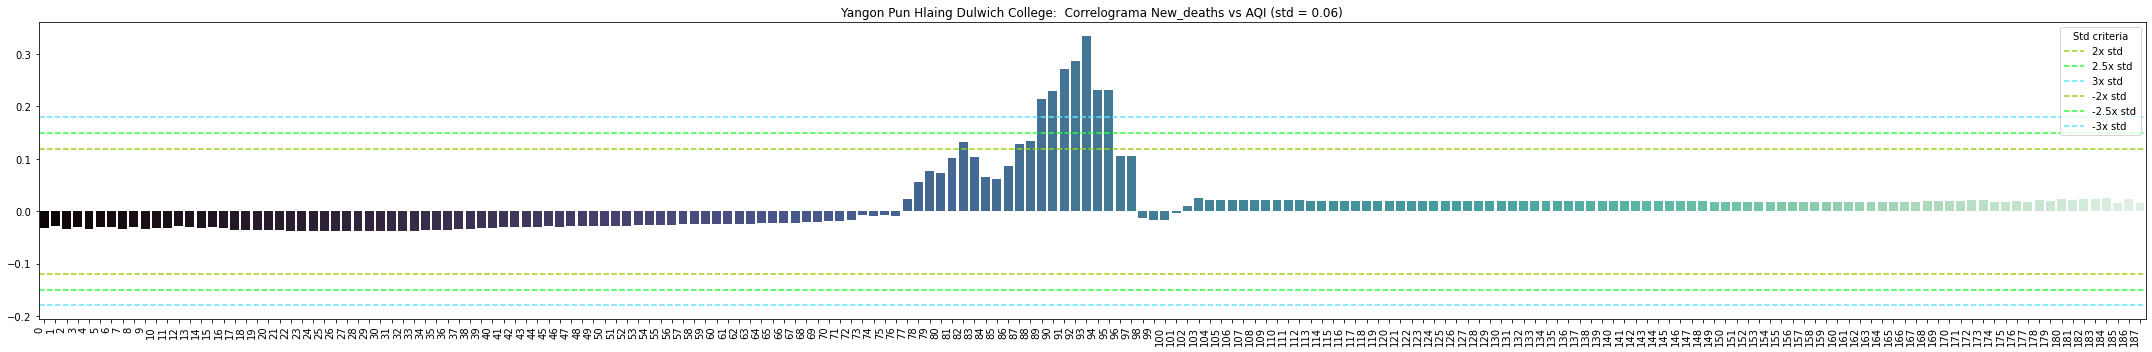

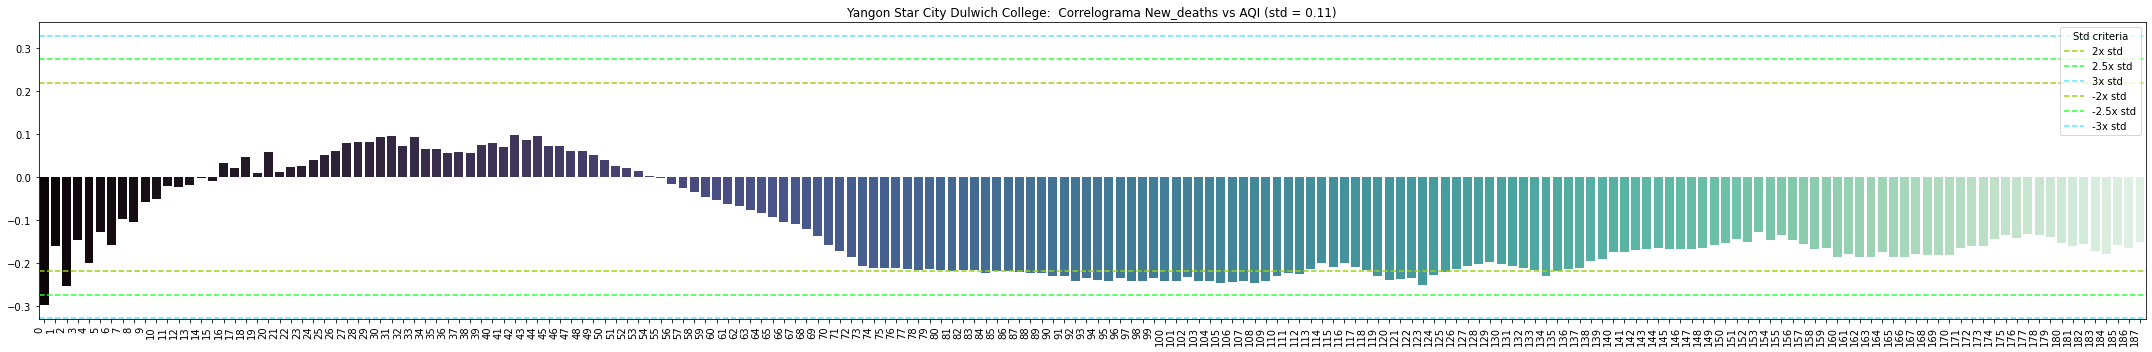

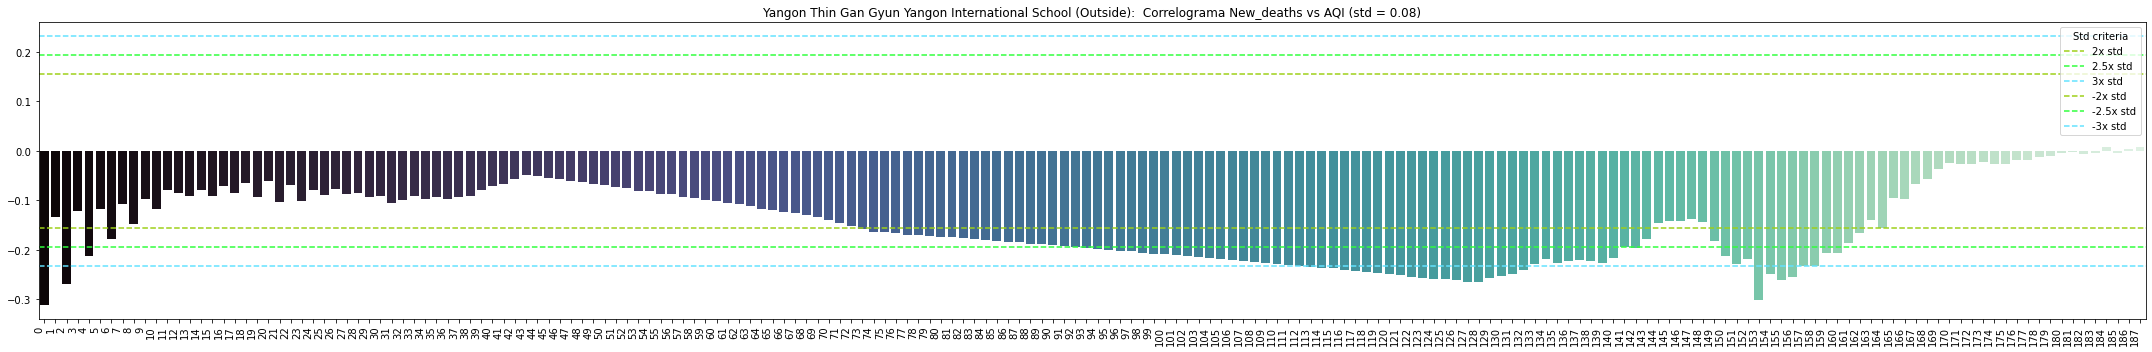

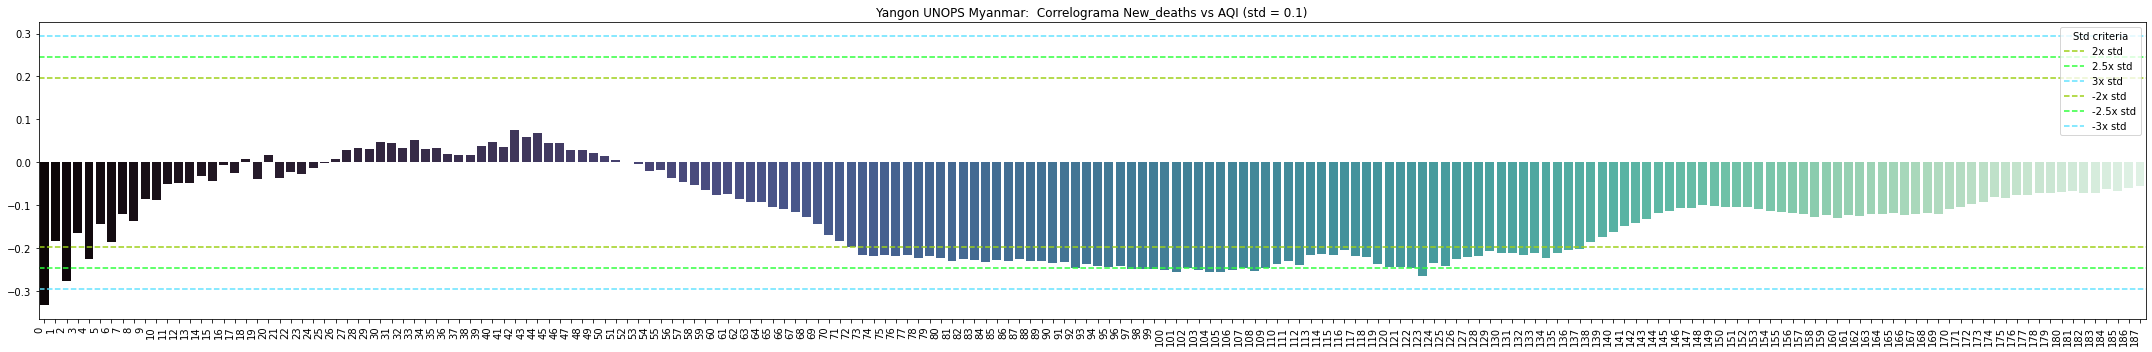

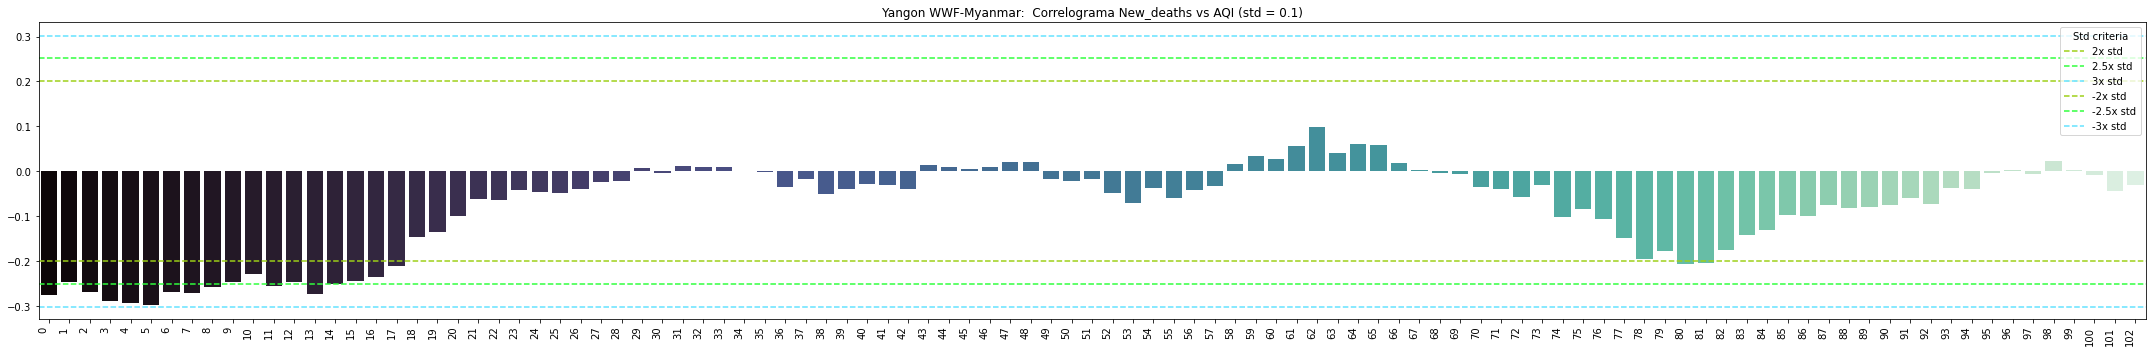

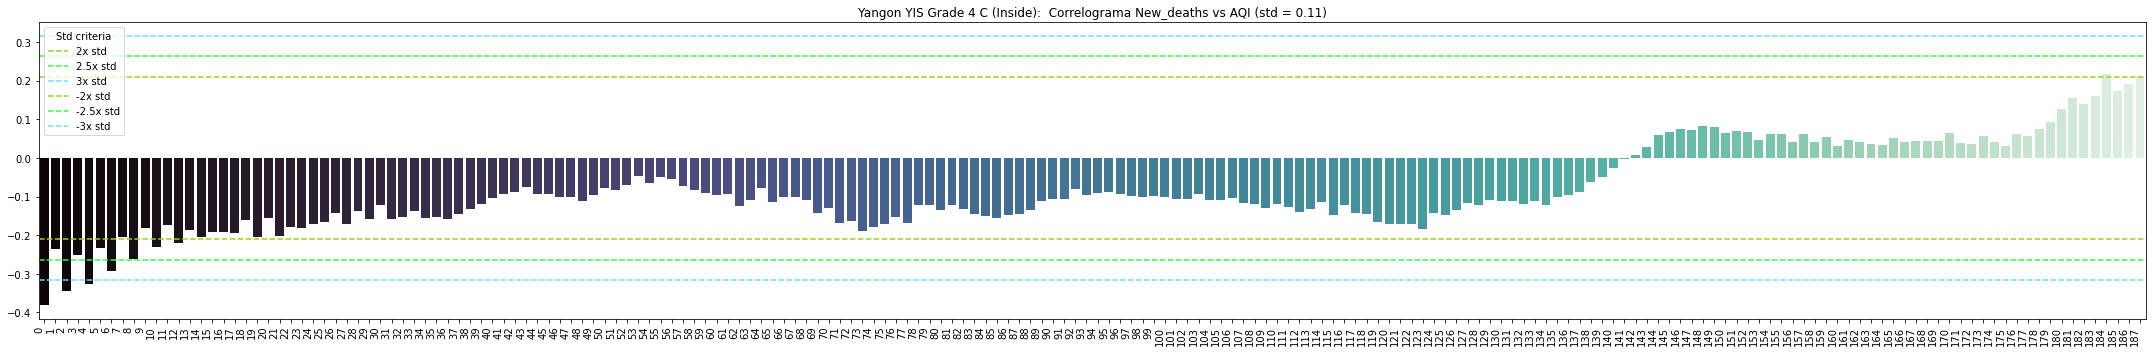

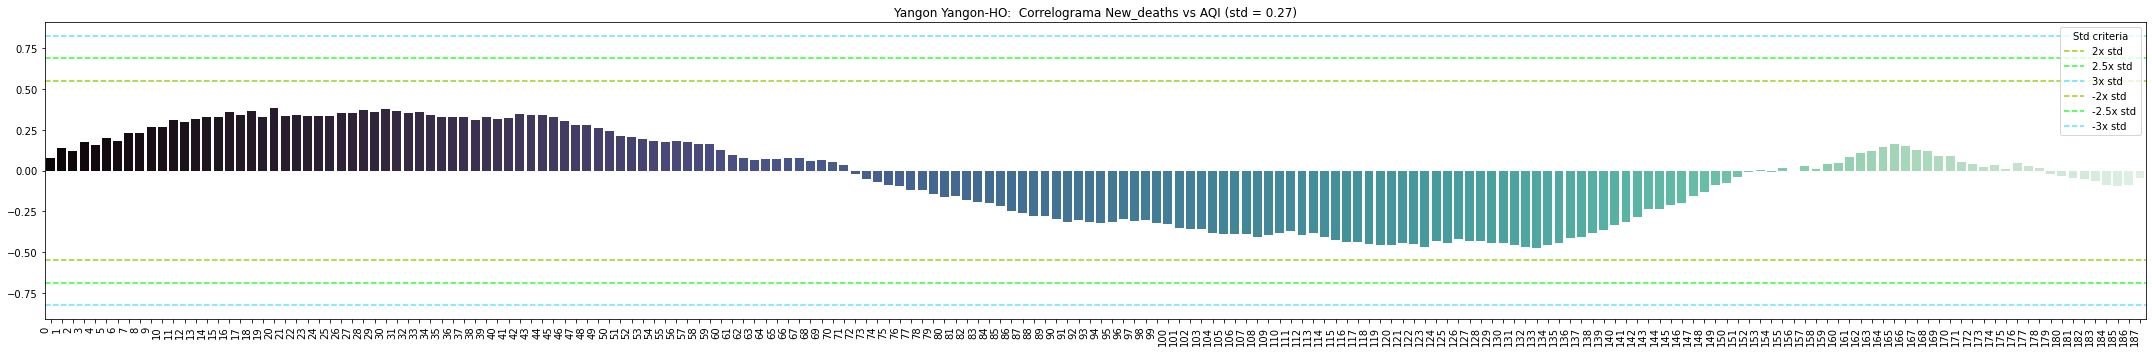

In [39]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = features[features.Center == center].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(center_data[col2], center_data[col1], city + ', ' + center + ': ', H)

Observamos que en la mayoría de centros de medición, la correlación entre la cantidad de nuevos casos de enfermos y muertes con AQI es negativa para la mayoría del tiempo, lo cual nos quiere decir que cuando una de estas variables disminuye aumenta la otra en el futuro. Este resultado es importante, ya que contradice la intuición que cuando los contaminantes son mayores existen más casos de enfermos y muertes.

#### Nuevos casos de enfermos vs Temperatura

In [40]:
sel_numerical_cols = ['Temperature_F']
sel_effects_cols = ['New_cases']

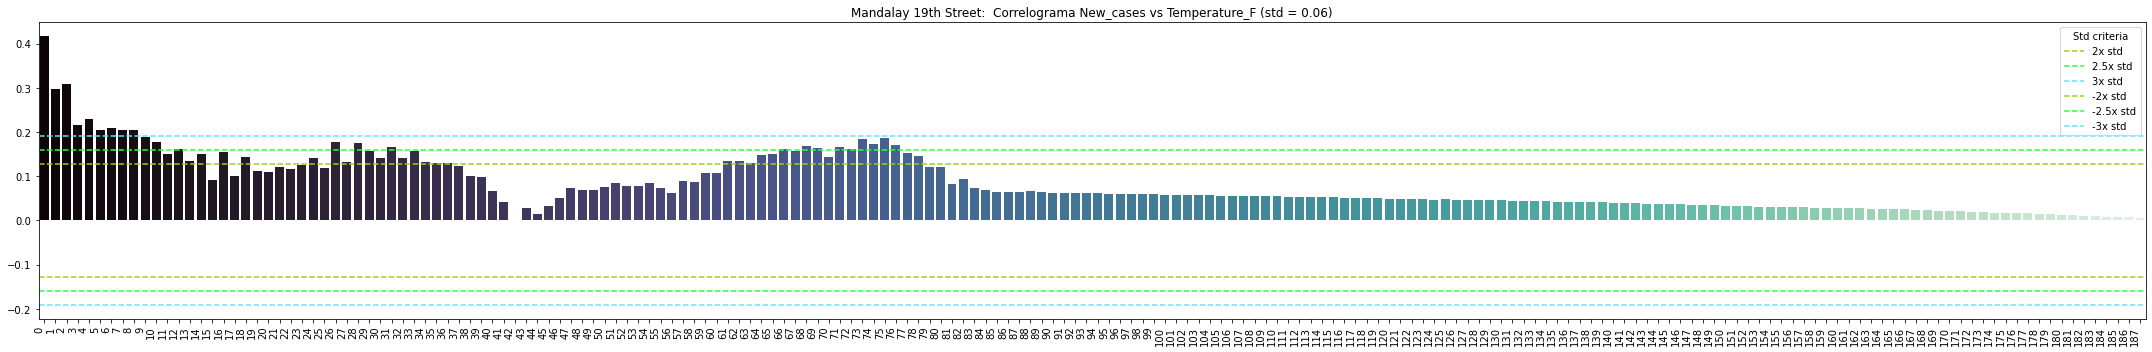

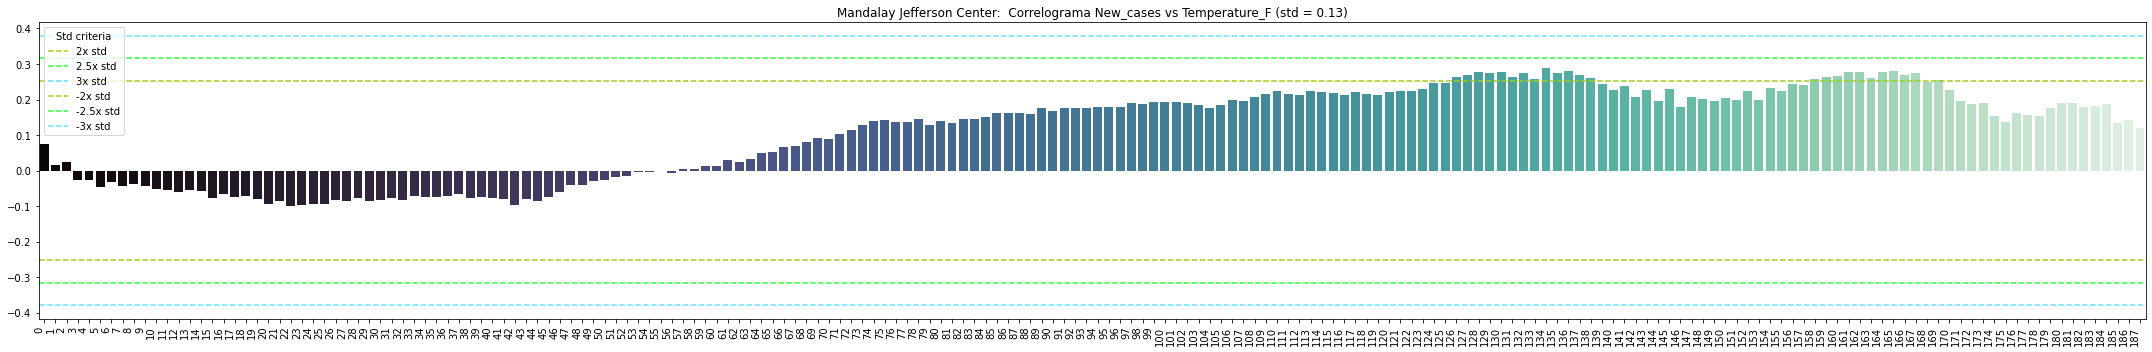

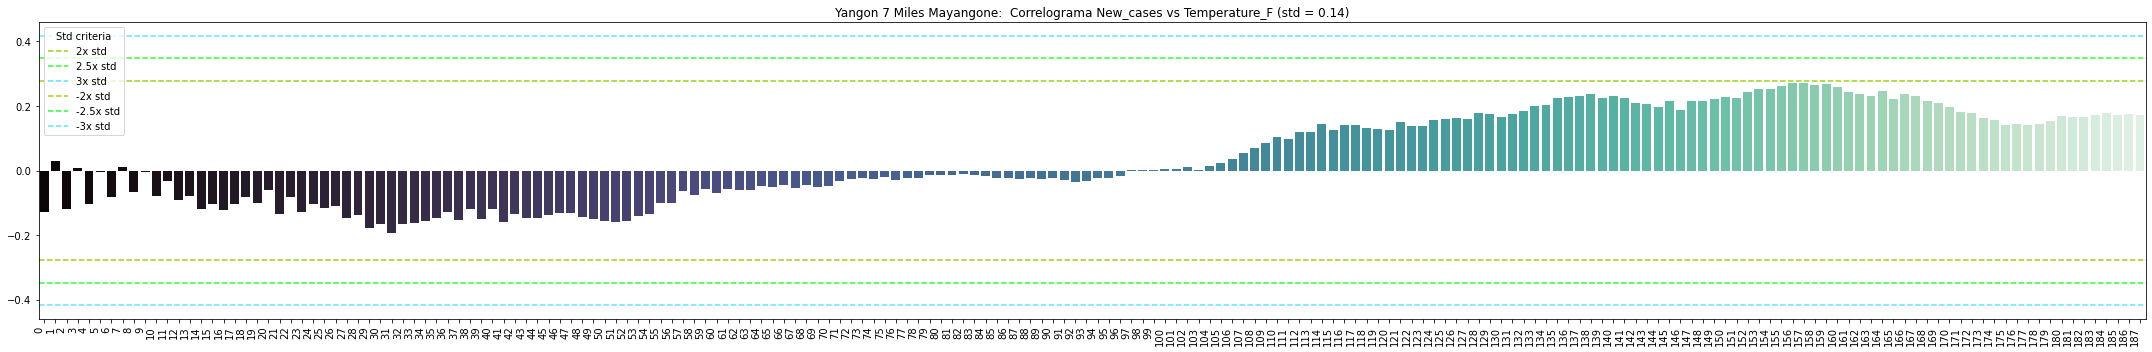

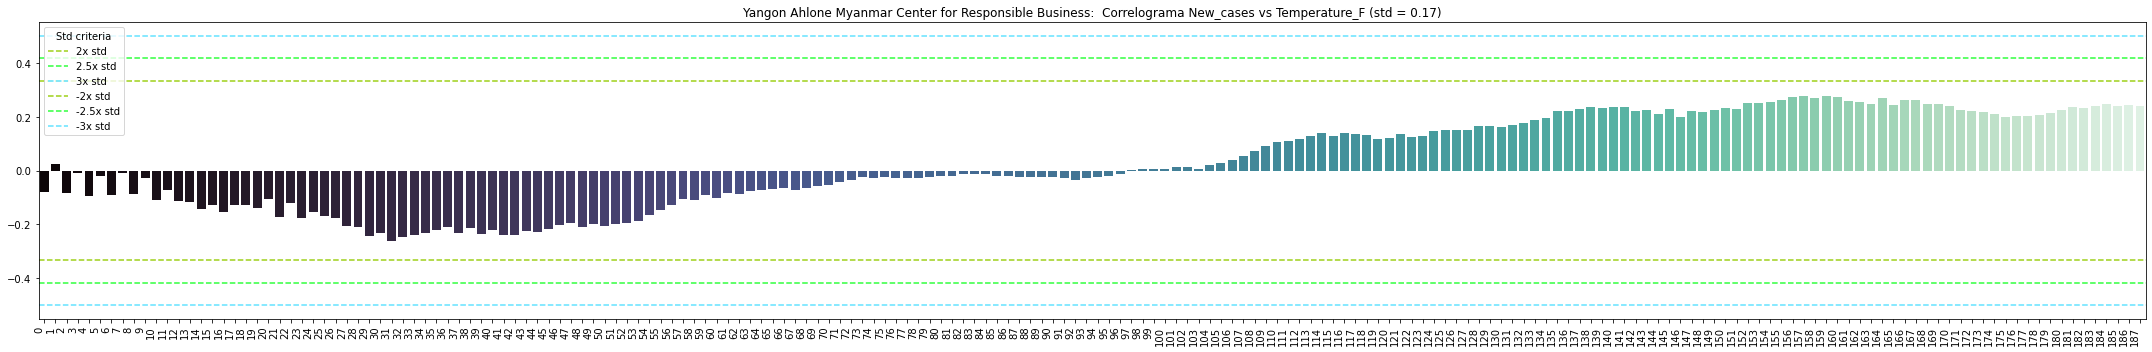

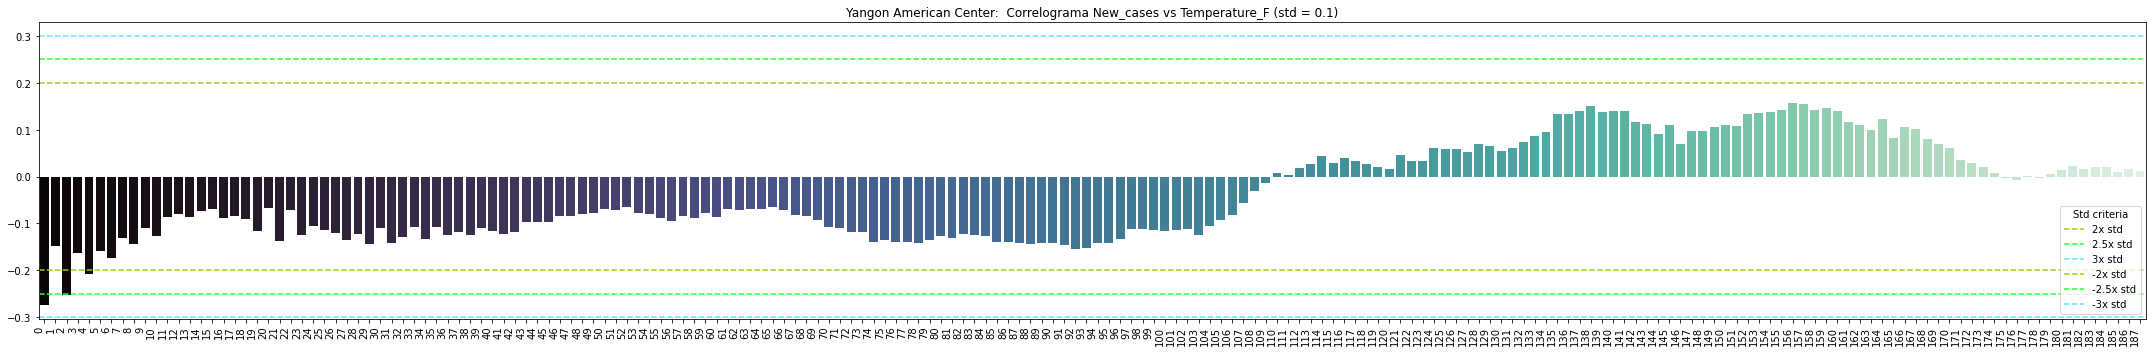

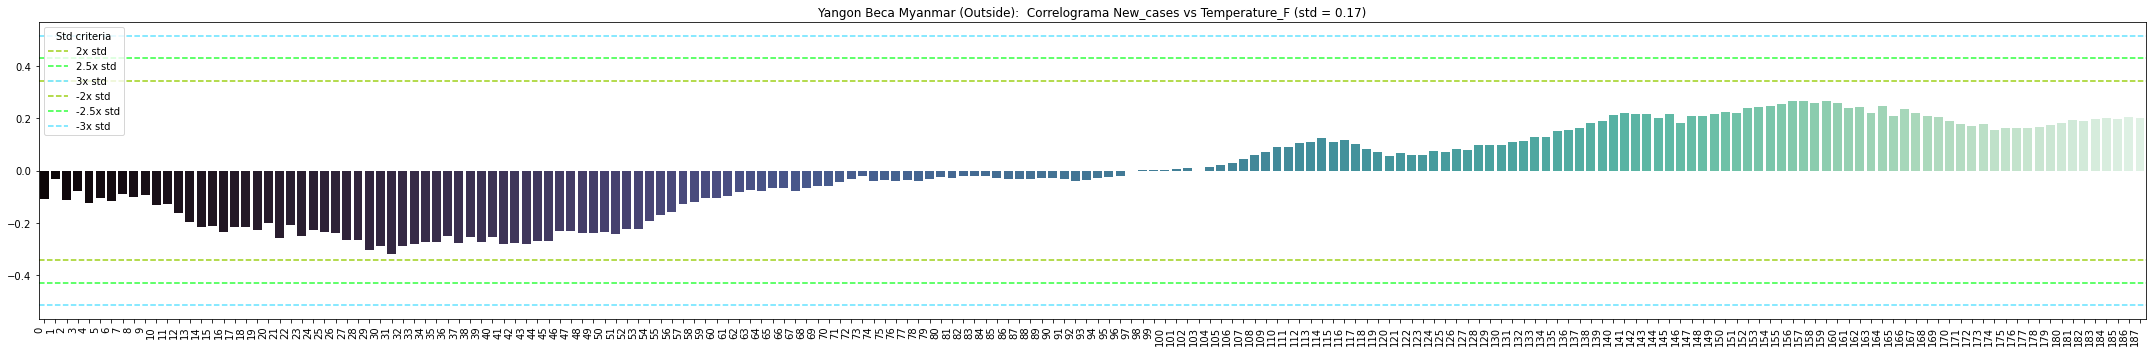

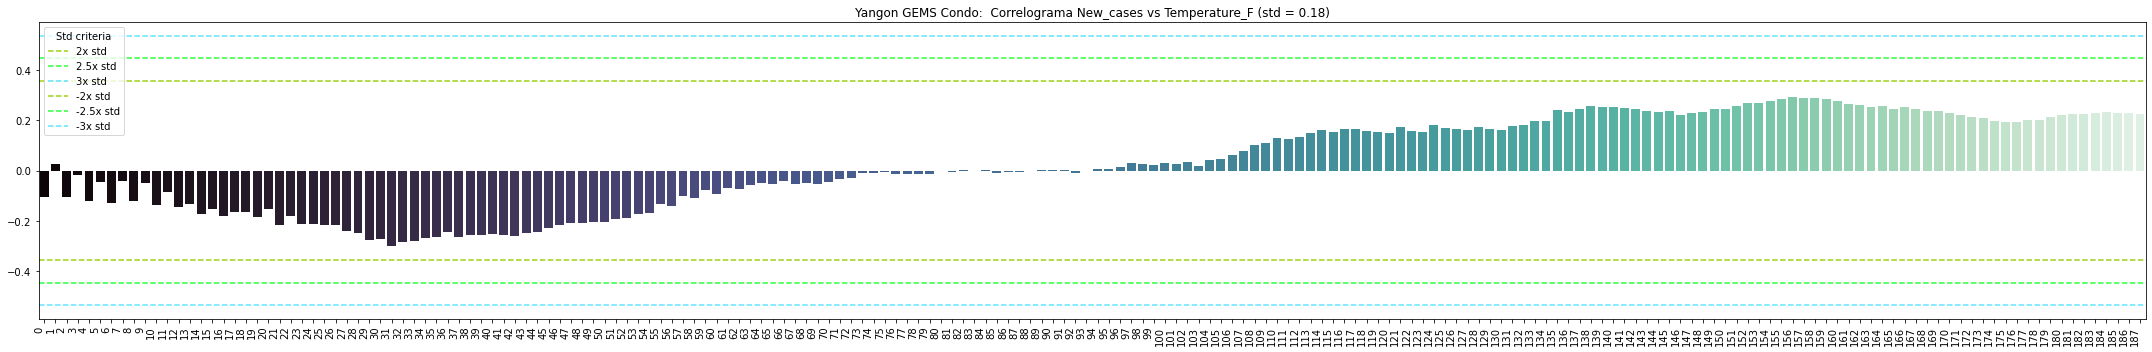

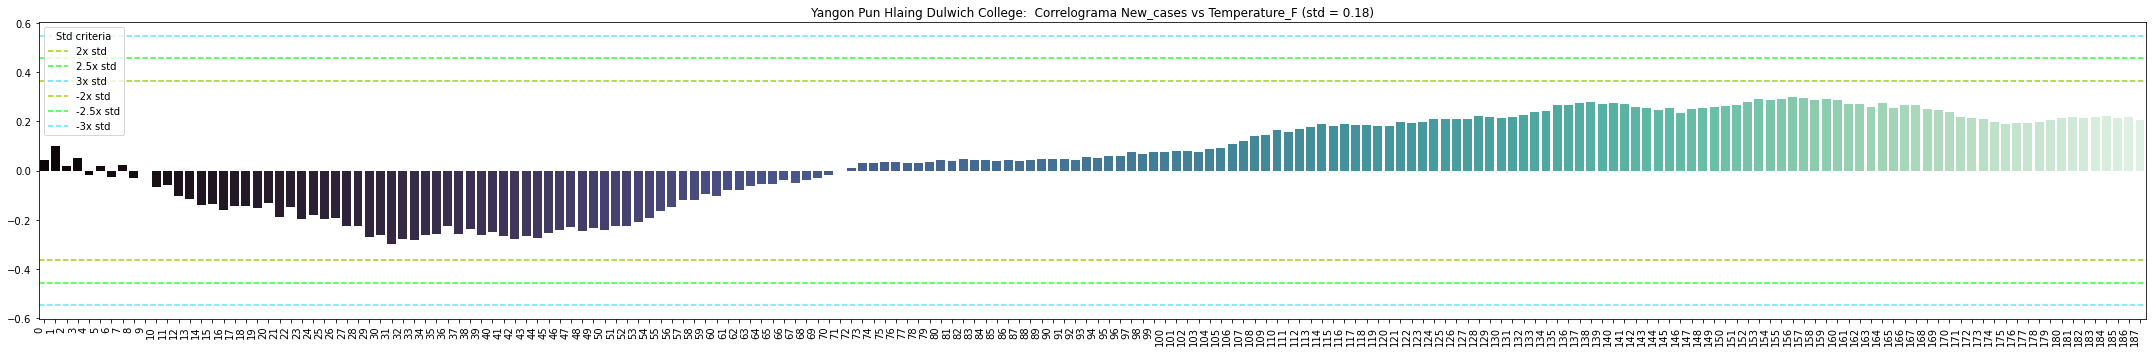

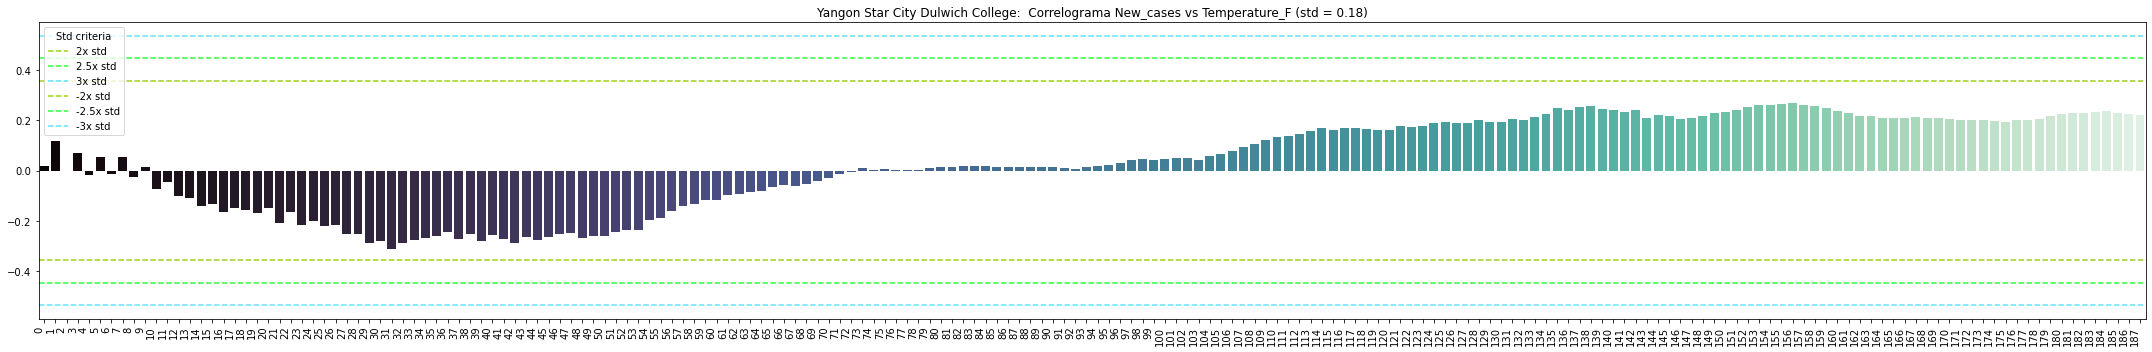

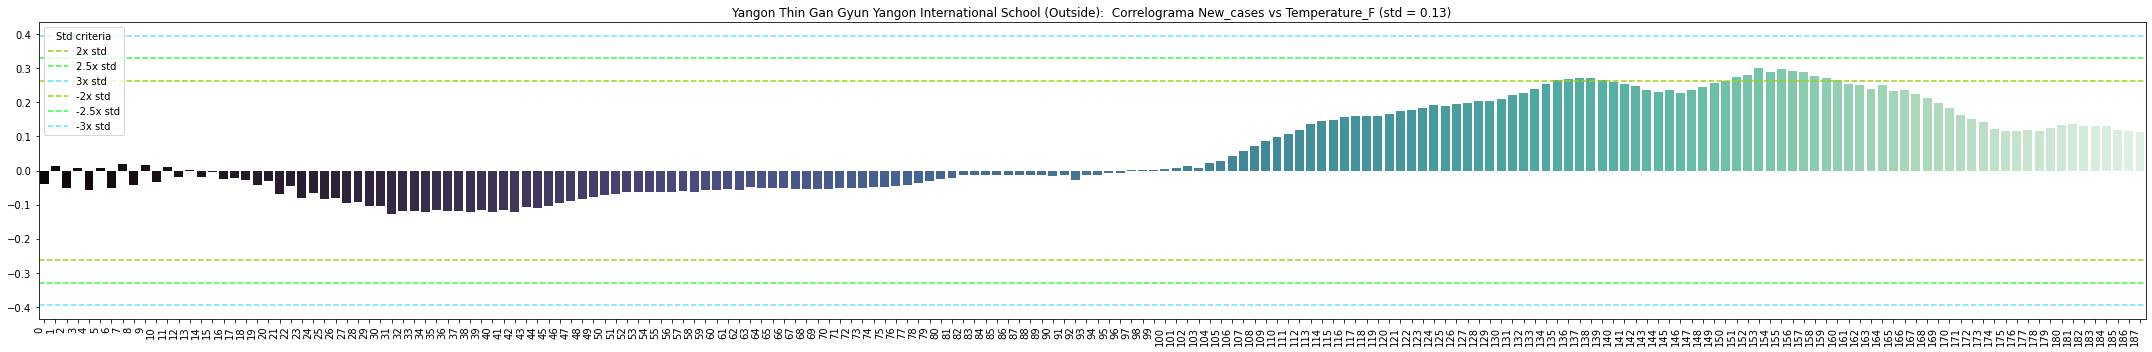

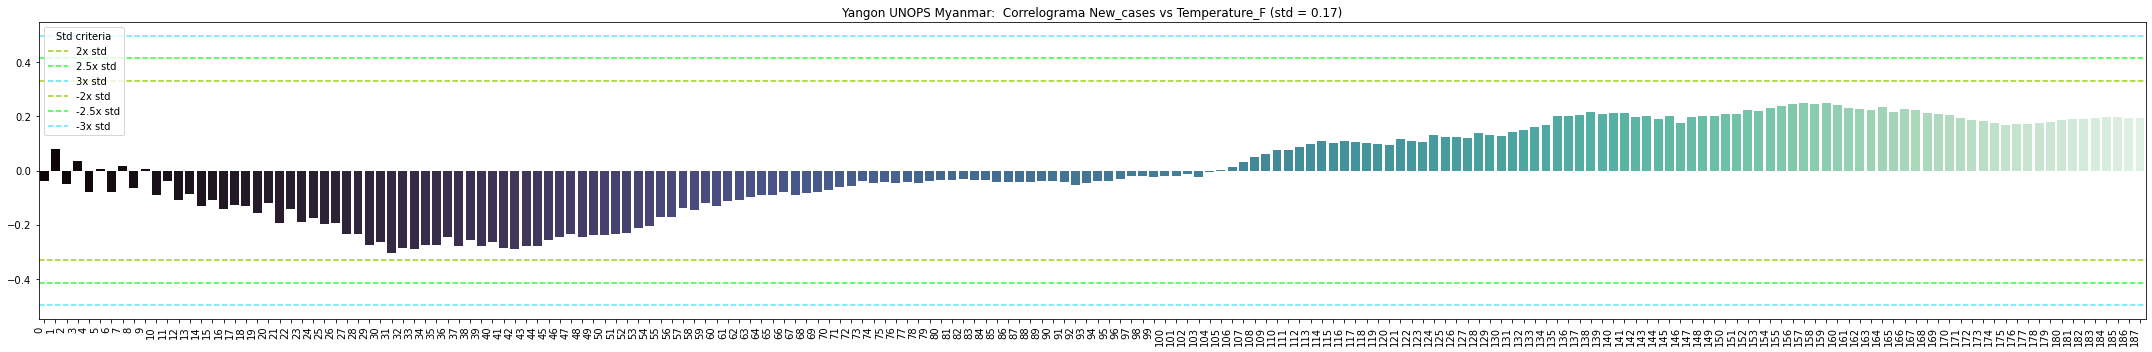

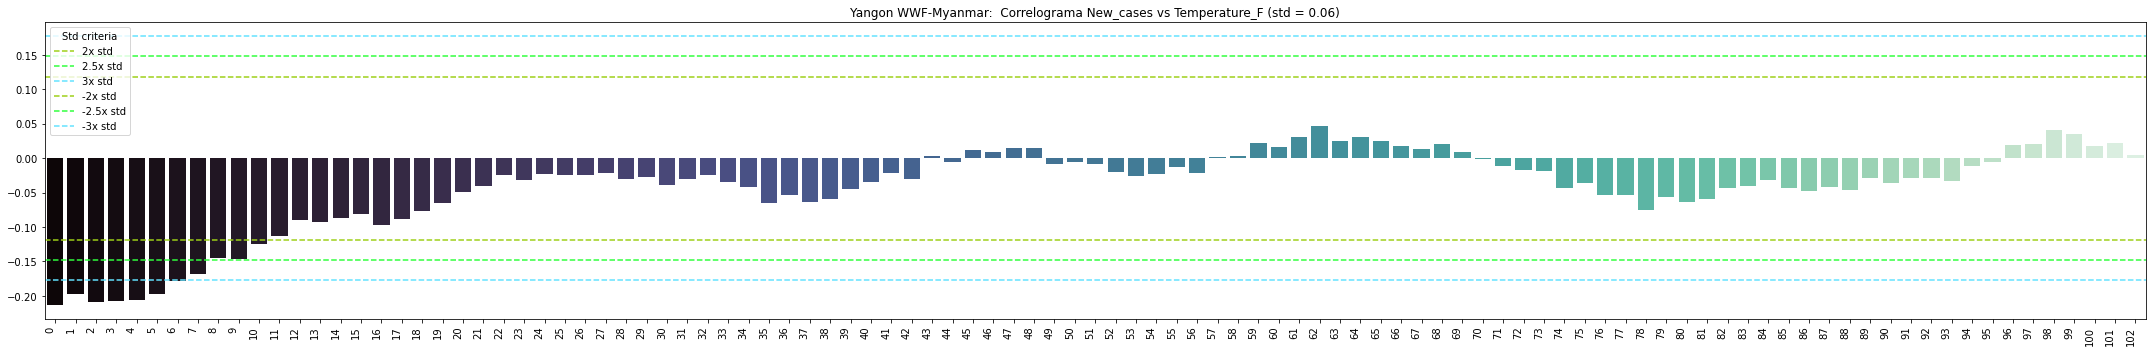

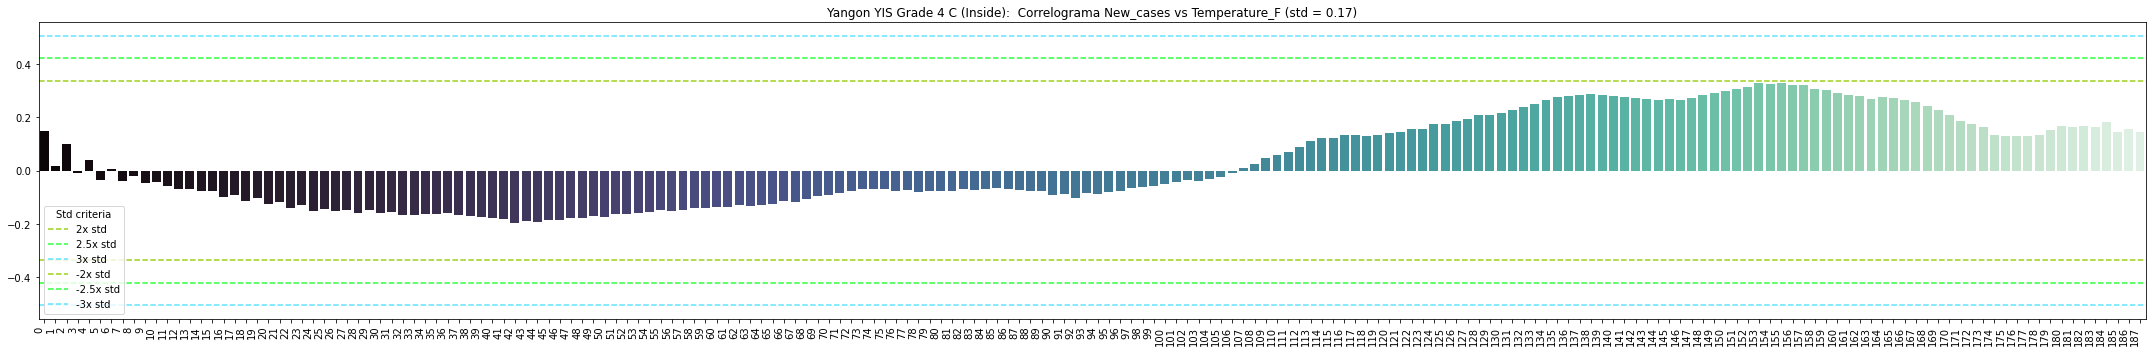

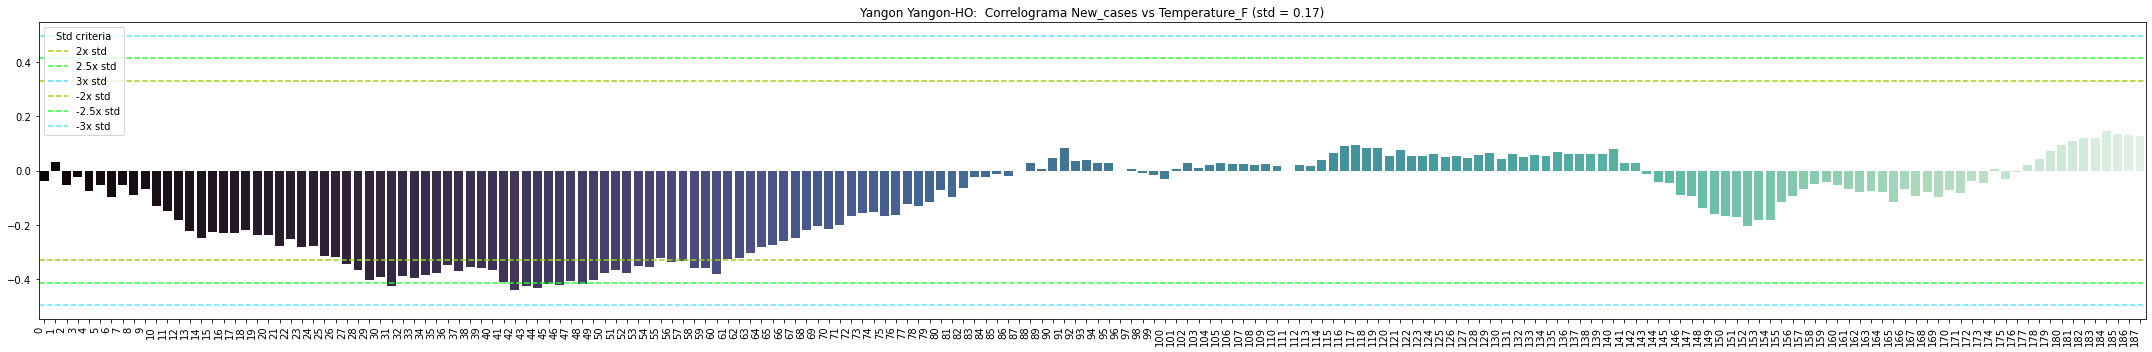

In [41]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = features[features.Center == center].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(center_data[col2], center_data[col1], city + ', ' + center + ': ', H)

Observamos que en la mayoría de centros de medición, la correlación entre la cantidad de nuevos casos de enfermos y el AQI es negativa la mayoría del tiempo, lo cual nos quiere decir que cuando una de estas variables disminuye aumenta la otra en el futuro. Este resultado es importante, ya que contradice la intuición que cuando los contaminantes son mayores existen más casos de enfermos.

#### Nuevos casos de muertes vs Temperatura

In [42]:
sel_numerical_cols = ['Temperature_F']
sel_effects_cols = ['New_deaths']

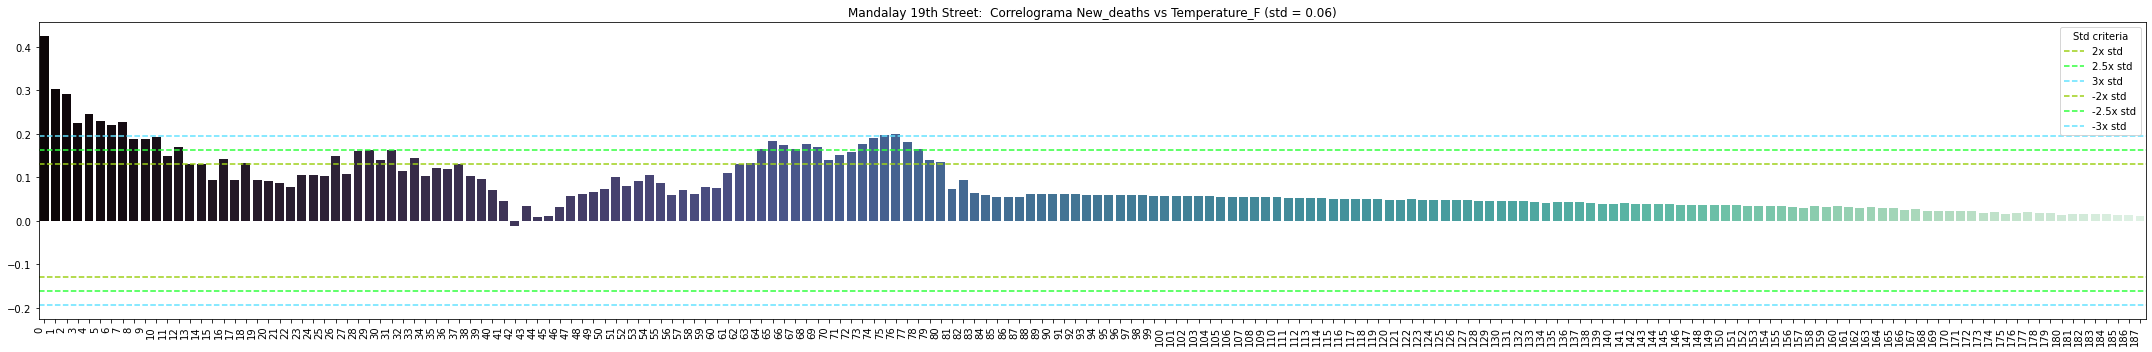

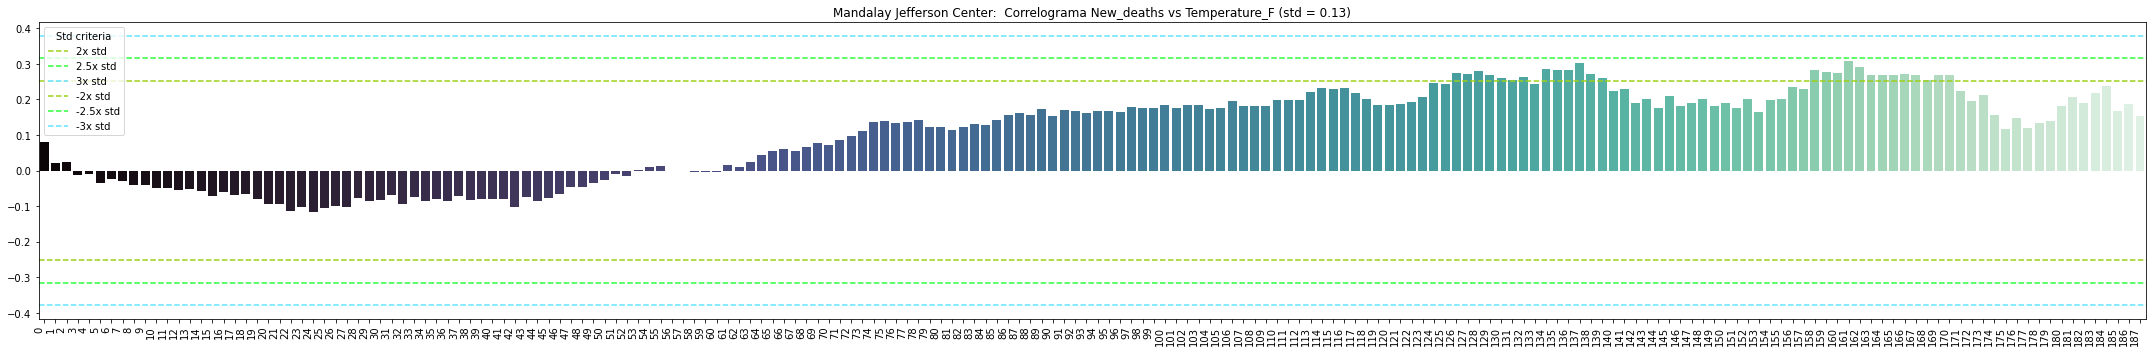

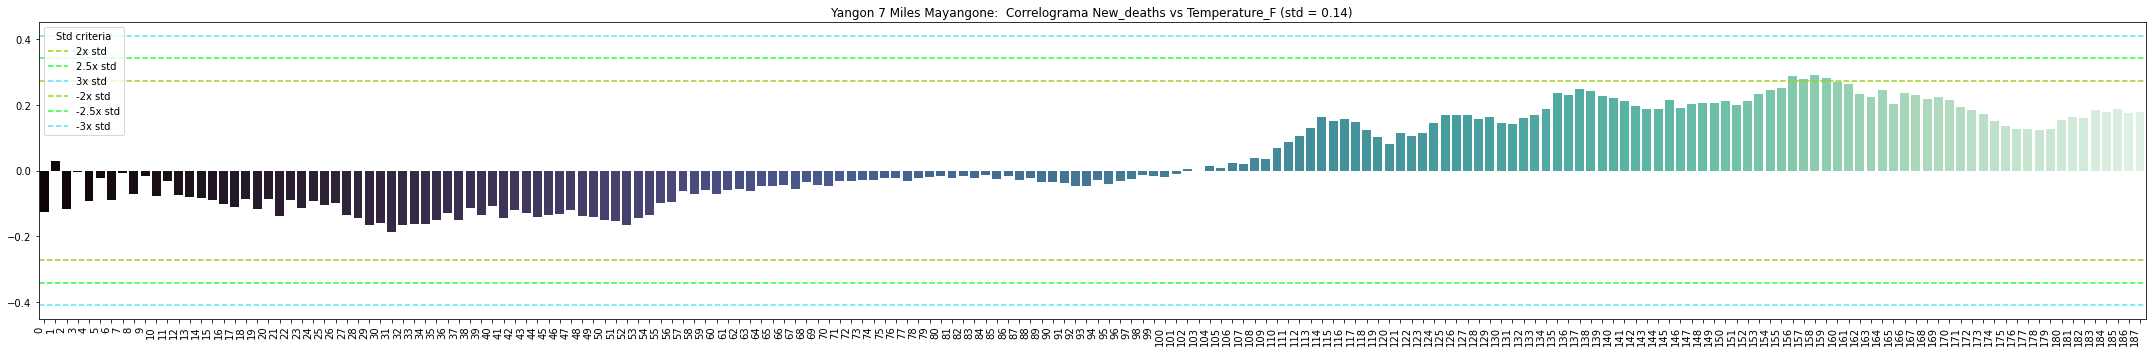

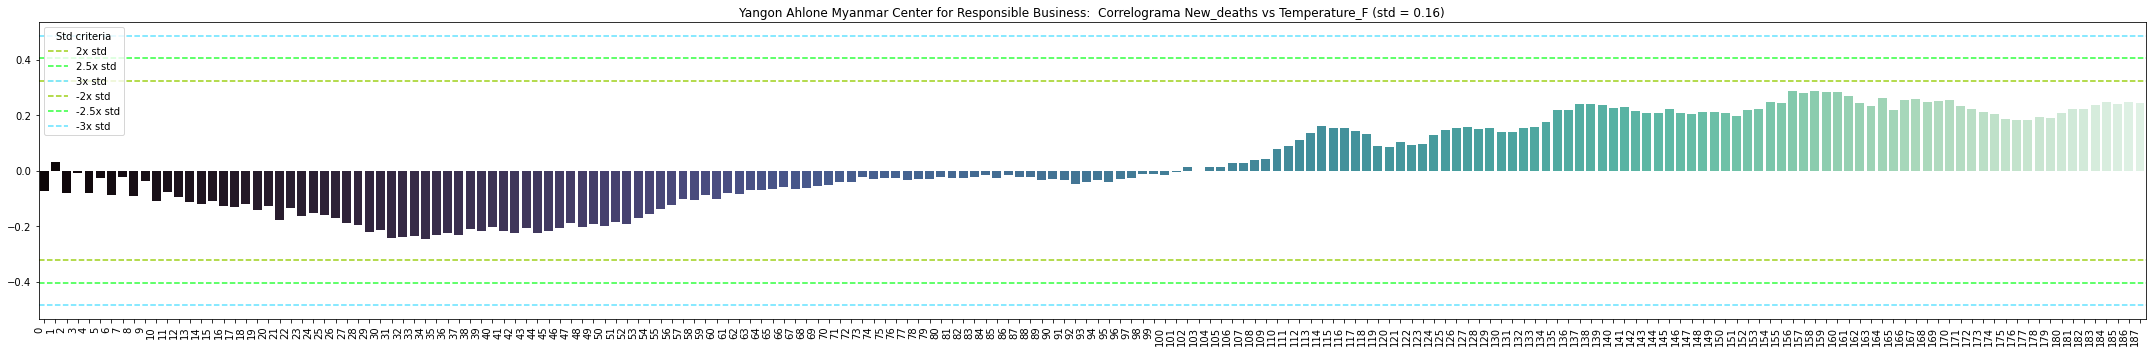

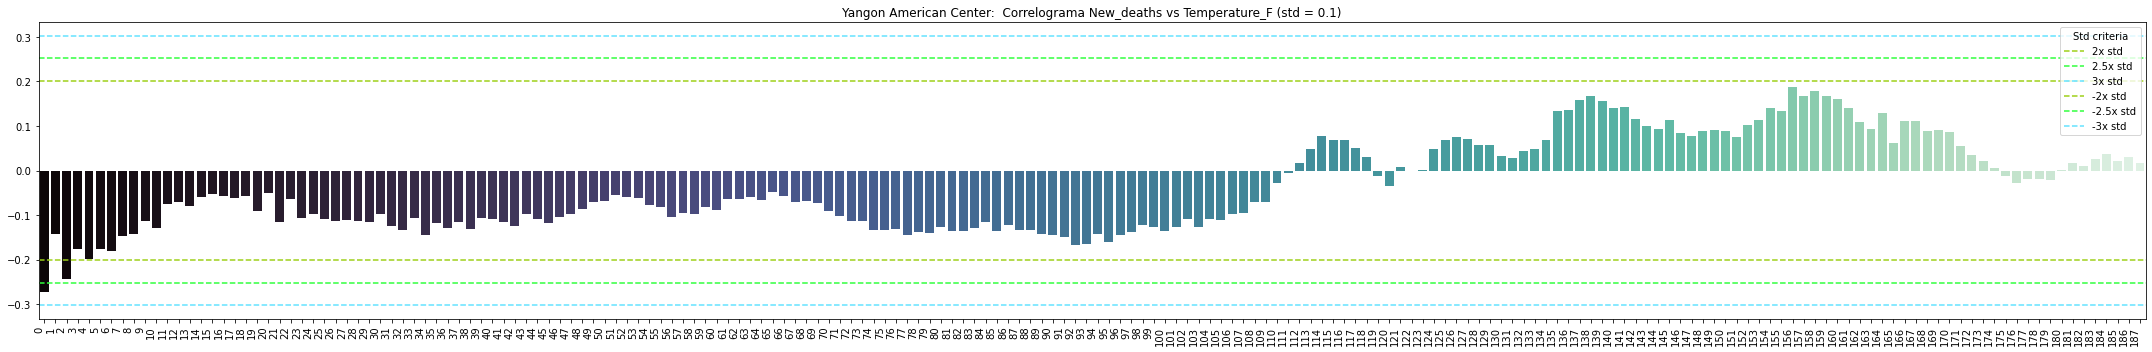

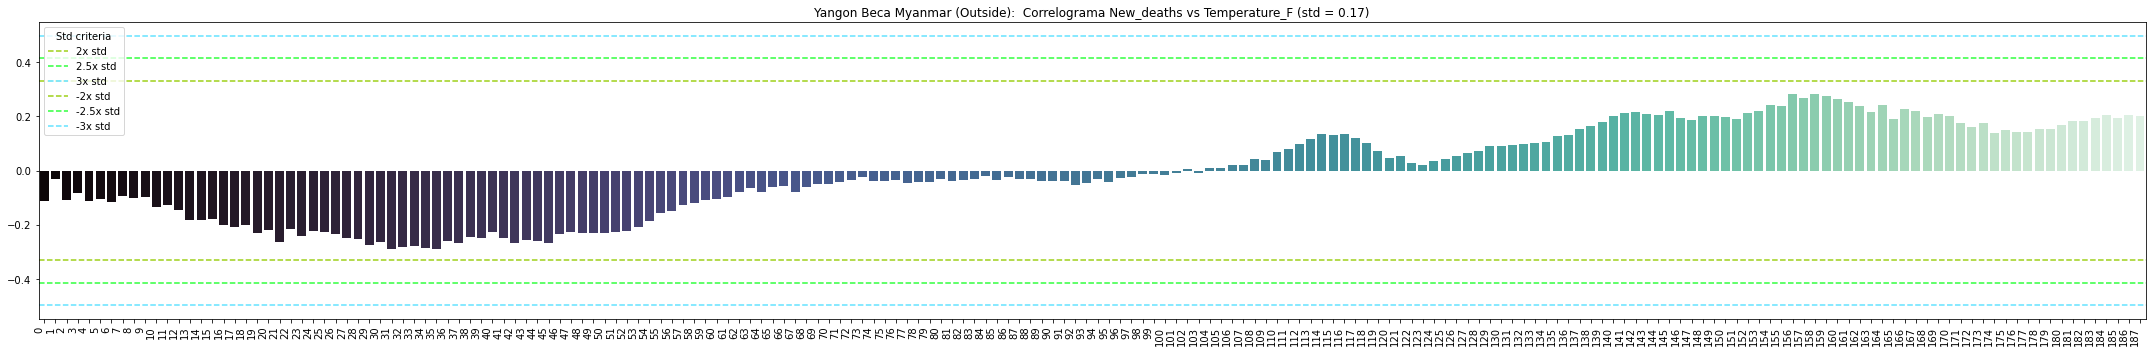

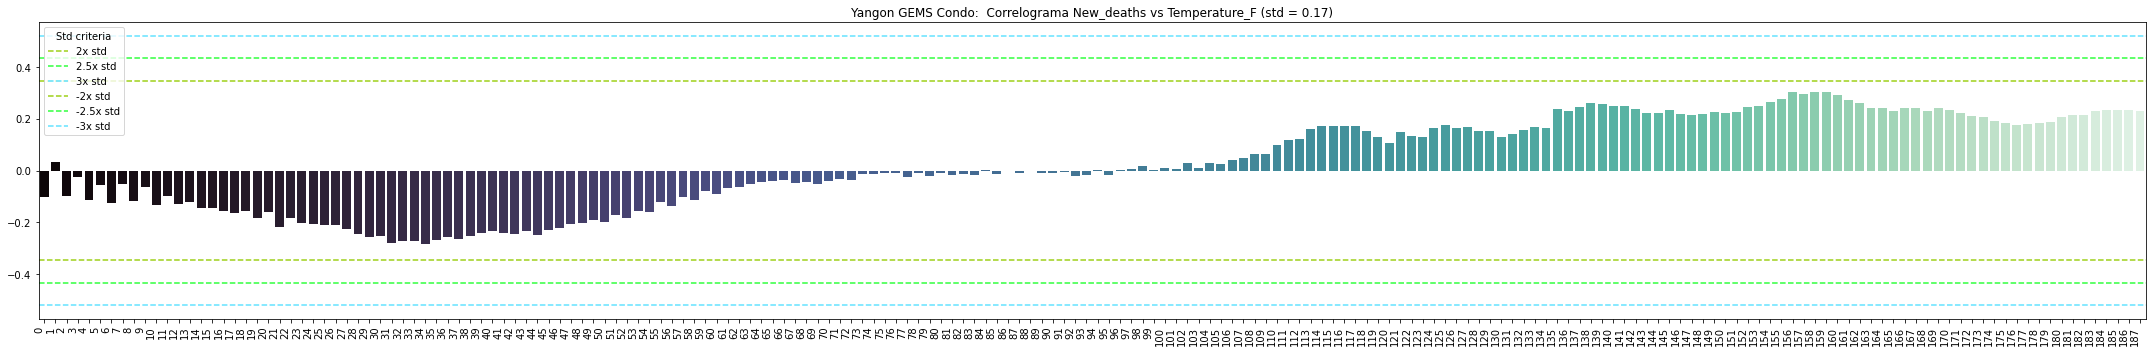

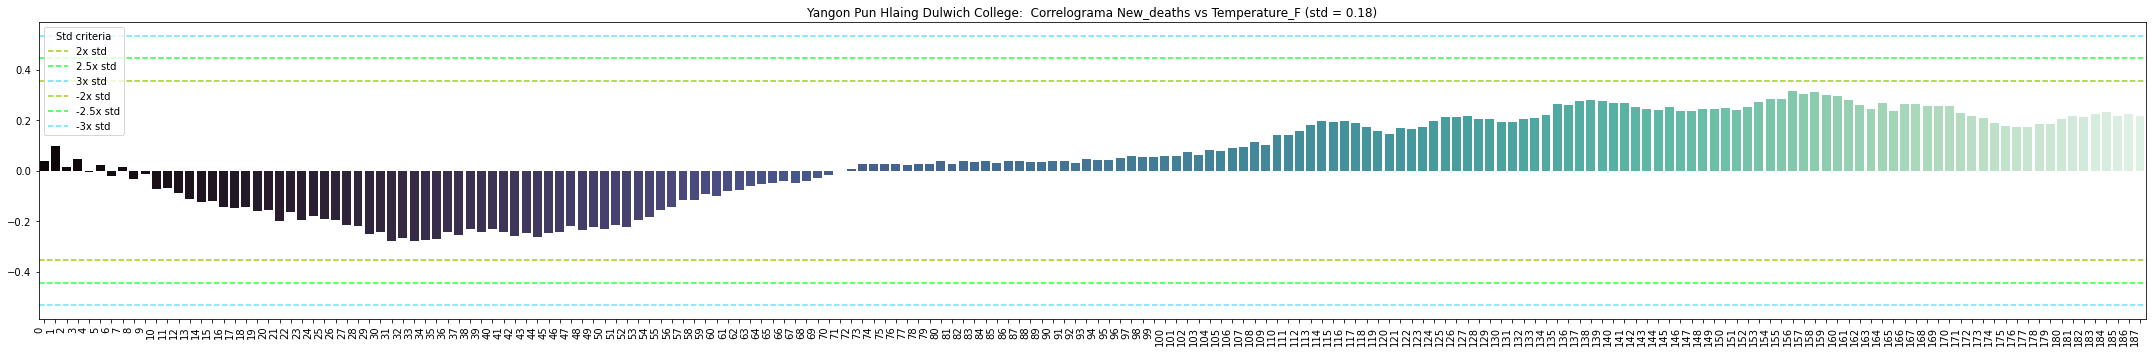

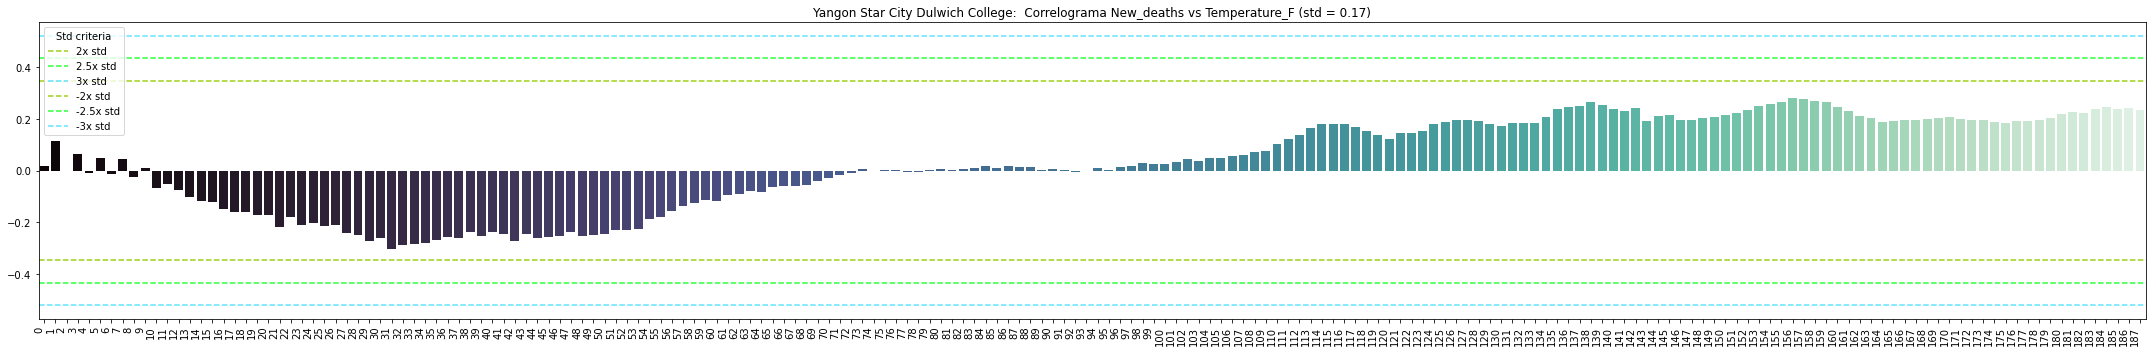

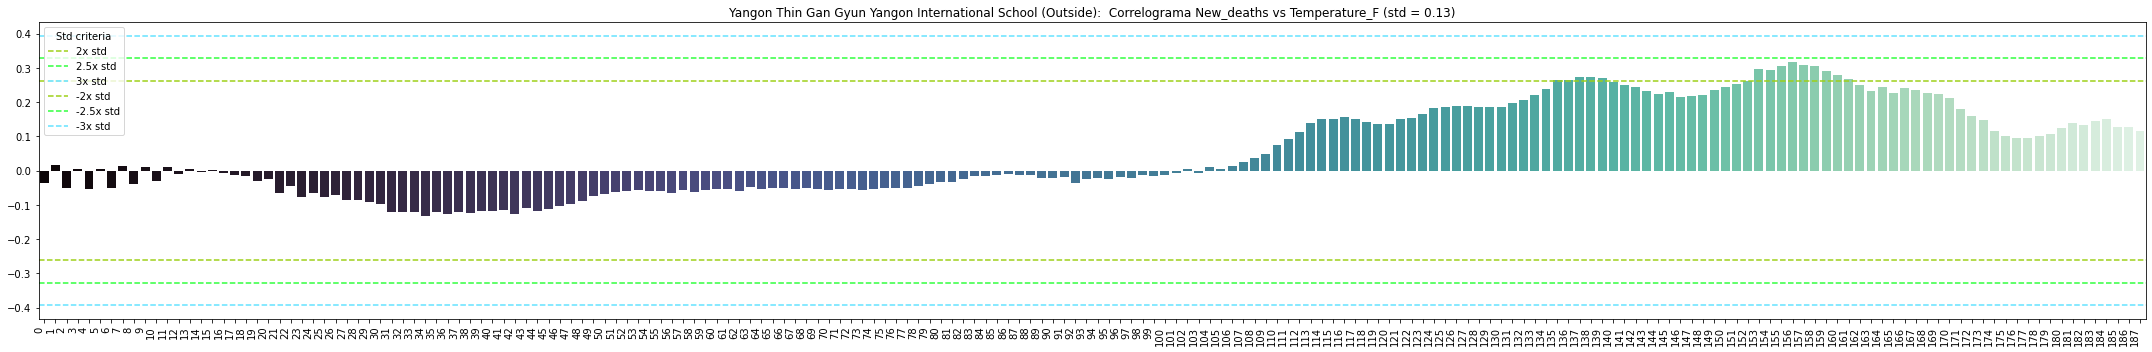

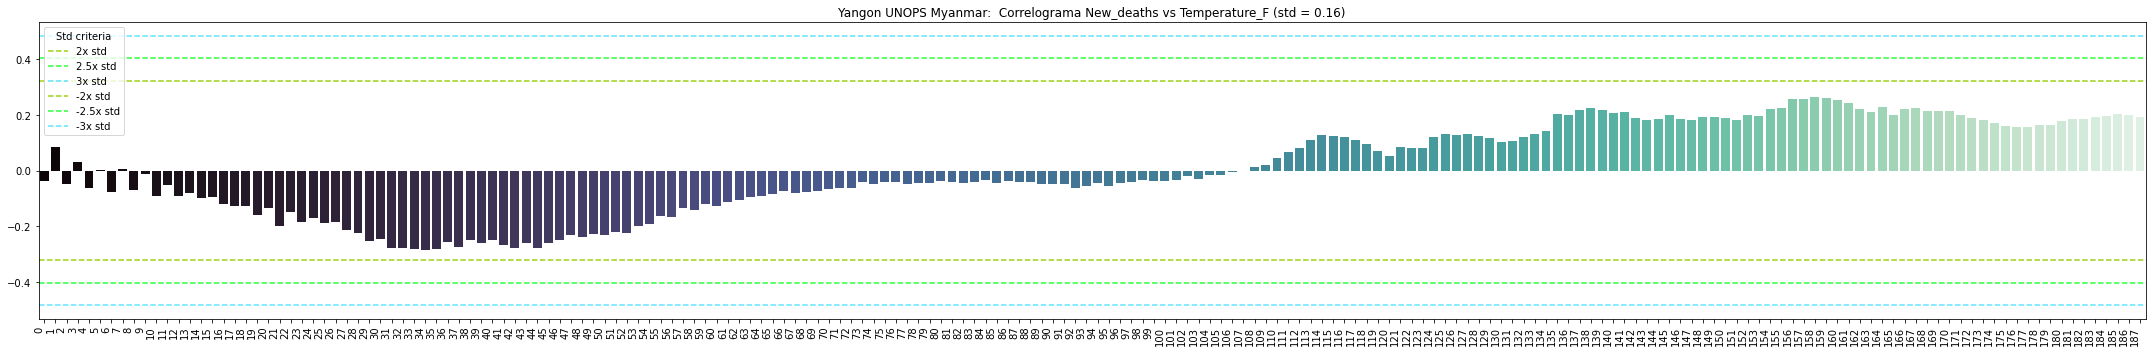

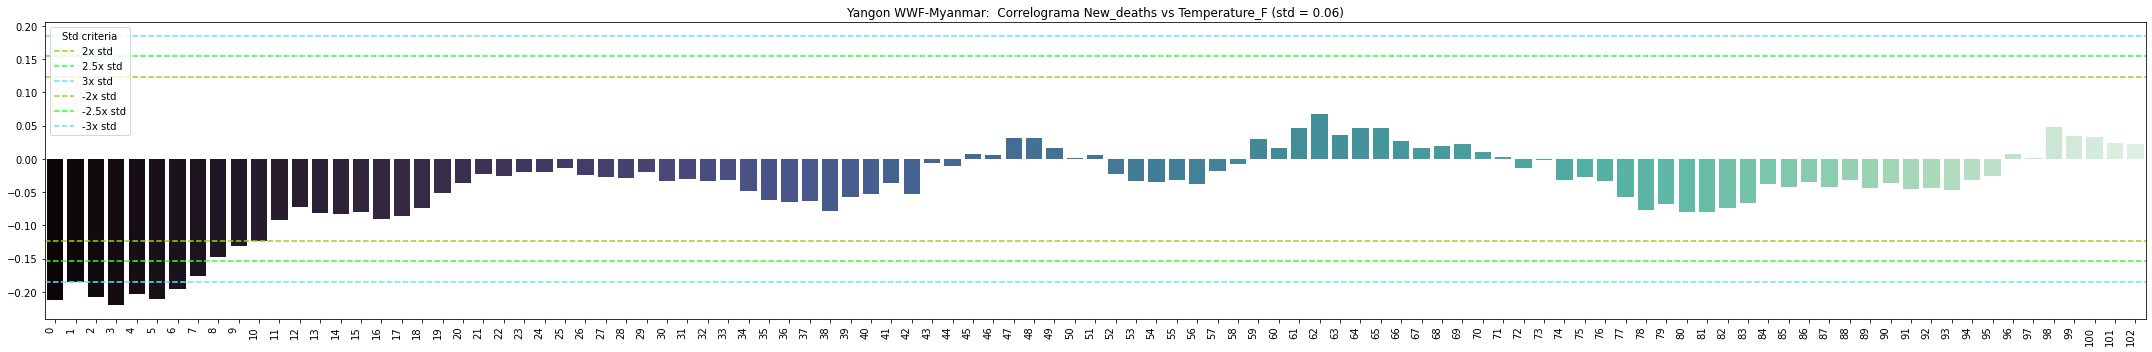

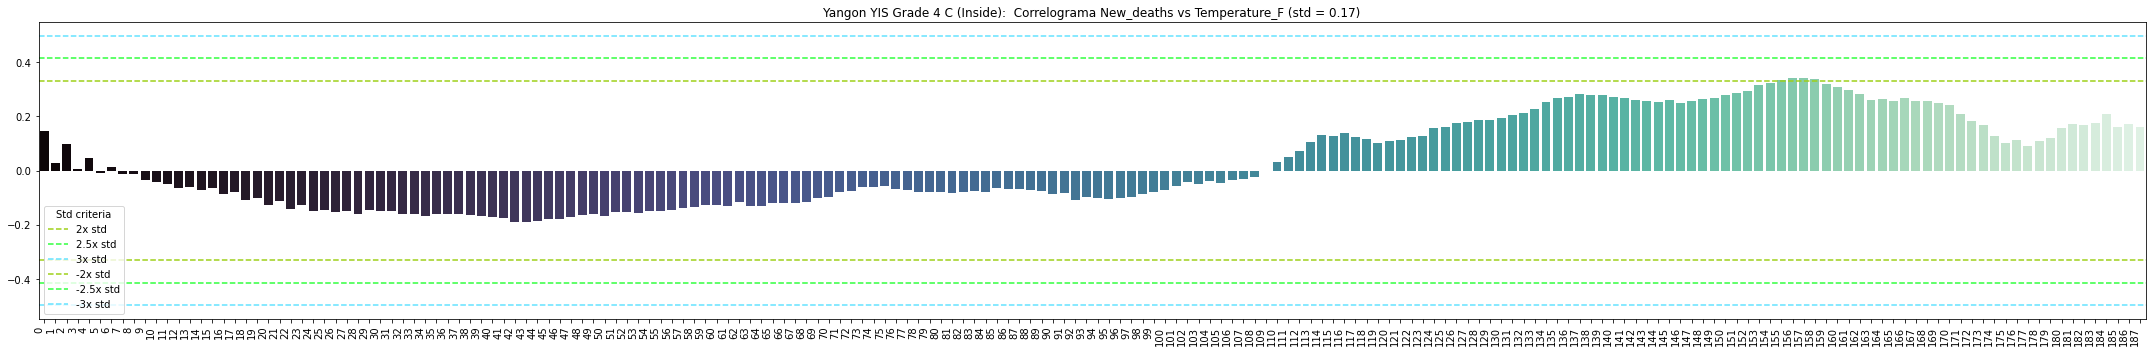

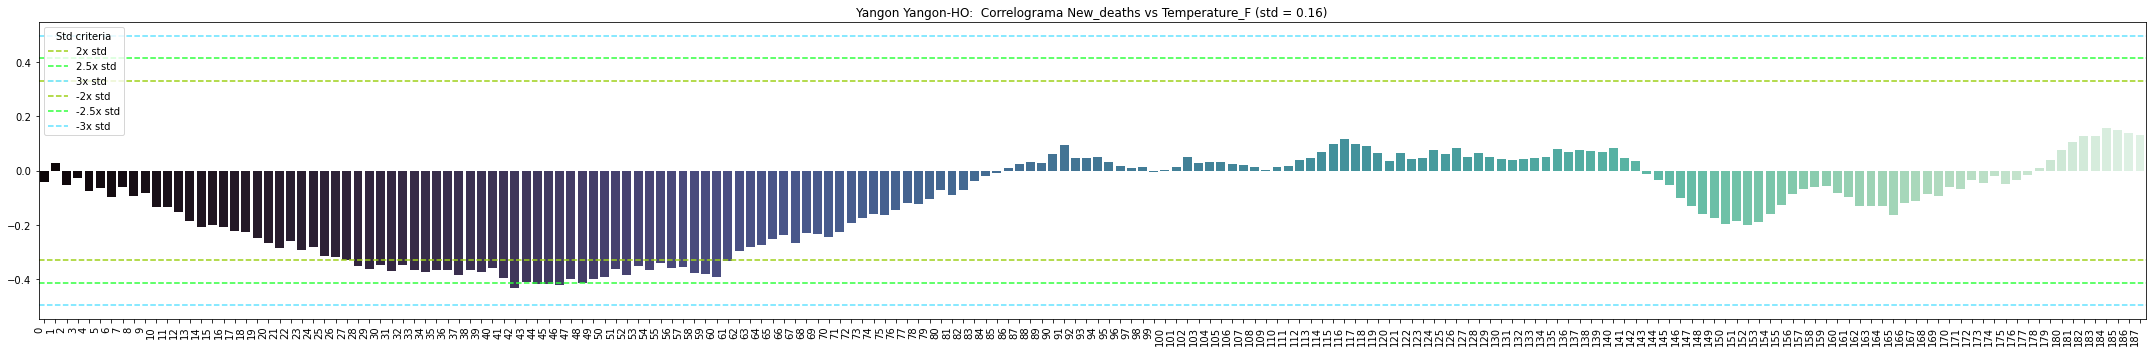

In [43]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = features[features.Center == center].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(center_data[col2], center_data[col1], city + ', ' + center + ': ', H)

#### Nuevos casos de enfermos vs % de Humedad

In [ ]:
sel_numerical_cols = ['Humidity_%']
sel_effects_cols = ['New_cases']

In [ ]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = features[features.Center == center].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(center_data[col2], center_data[col1], city + ', ' + center + ': ', H)

Observamos que en la mayoría de centros de medición, la correlación entre la cantidad de nuevos casos de enfermos y el AQI es negativa la mayoría del tiempo, lo cual nos quiere decir que cuando una de estas variables disminuye aumenta la otra en el futuro. Este resultado es importante, ya que contradice la intuición que cuando los contaminantes son mayores existen más casos de enfermos.

#### Nuevos casos de muertes vs % de Humedad

In [ ]:
sel_numerical_cols = ['Humidity_%']
sel_effects_cols = ['New_deaths']

In [ ]:
for i in range(len(centers_cities)):
    city, center = centers_cities.loc[i, ['City', 'Center']]
    center_data = features[features.Center == center].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(center_data[col2], center_data[col1], city + ', ' + center + ': ', H)

### Datos agrupados por ciudad (media)

#### Nuevos casos de enfermos vs AQI

In [36]:
sel_numerical_cols = ['AQI']
sel_effects_cols = ['New_cases']

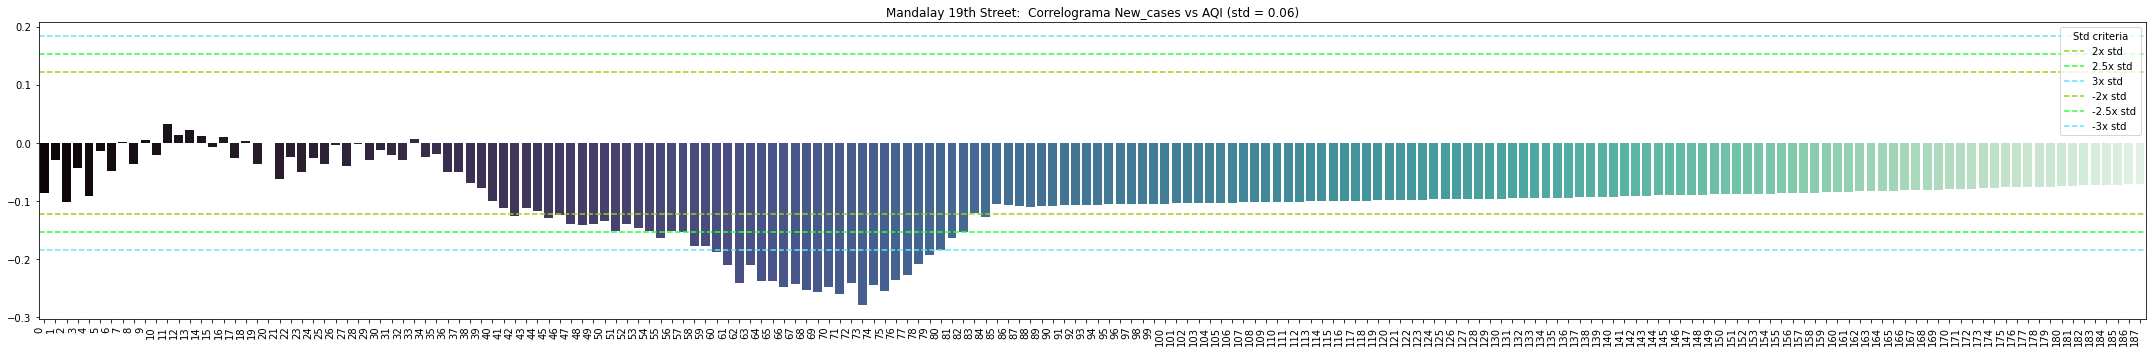

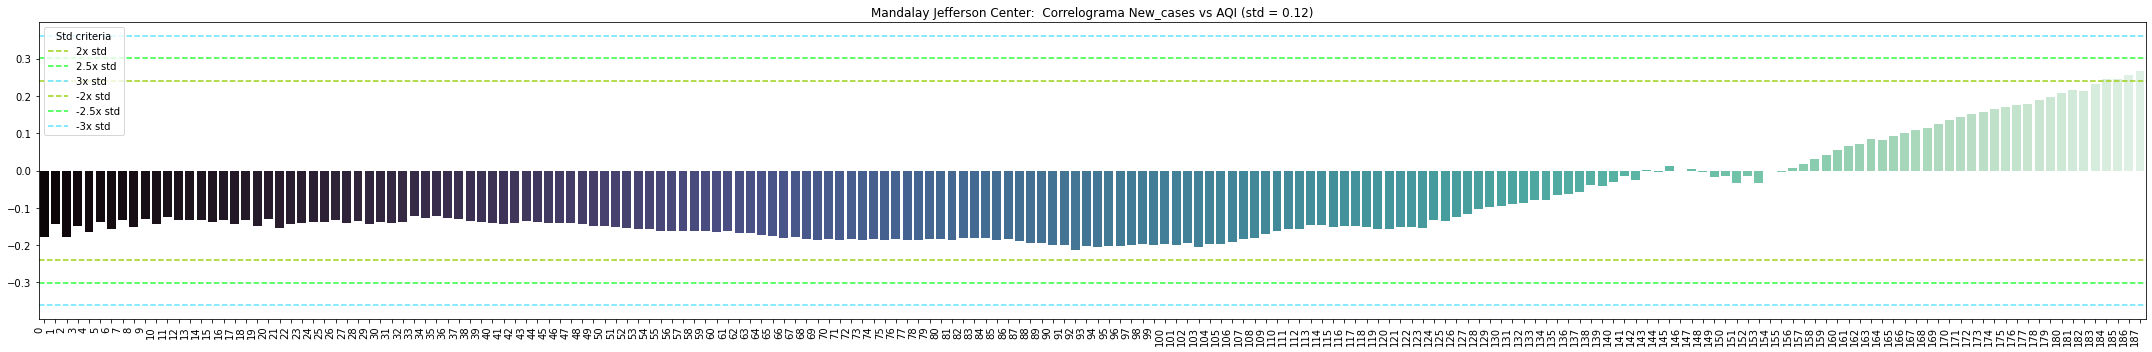

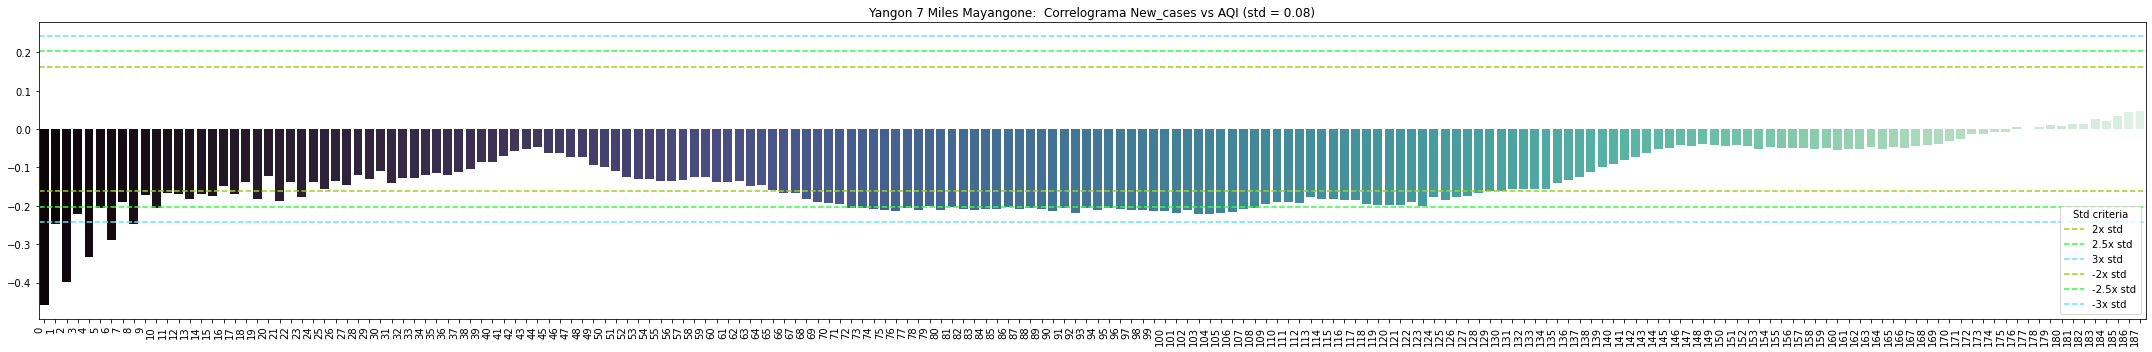

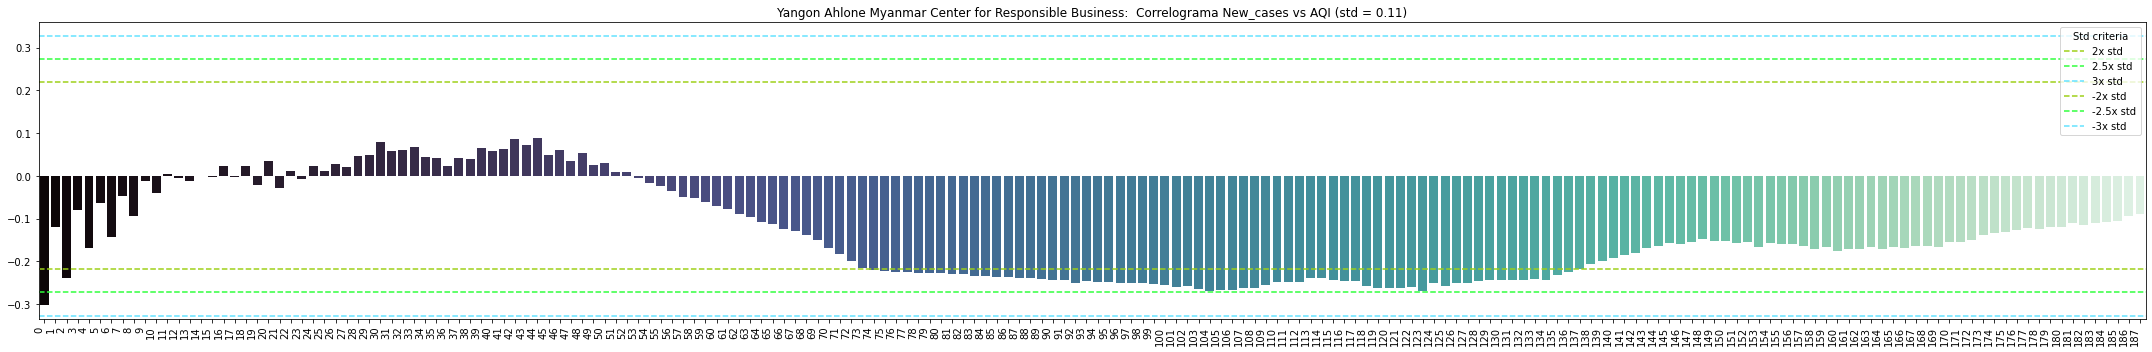

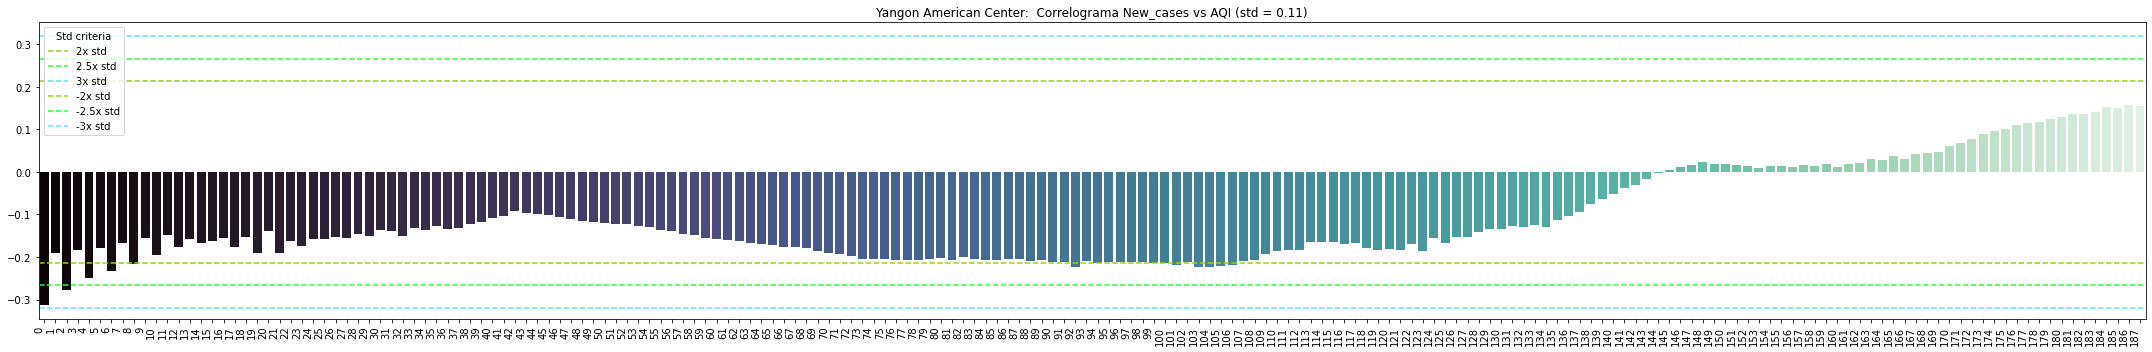

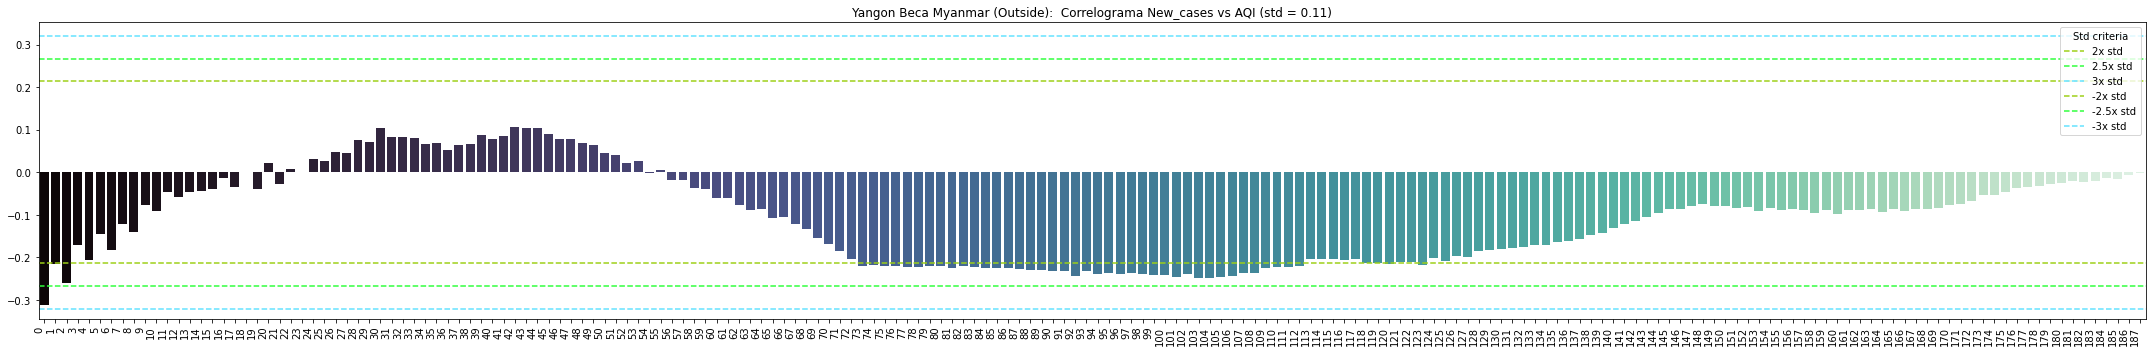

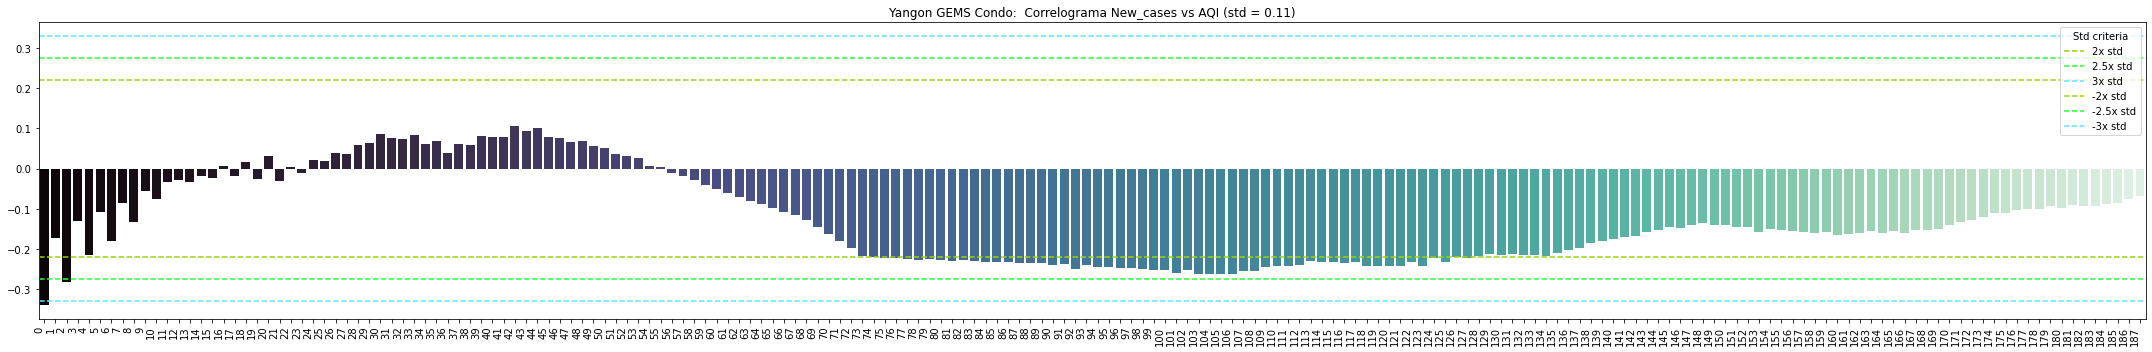

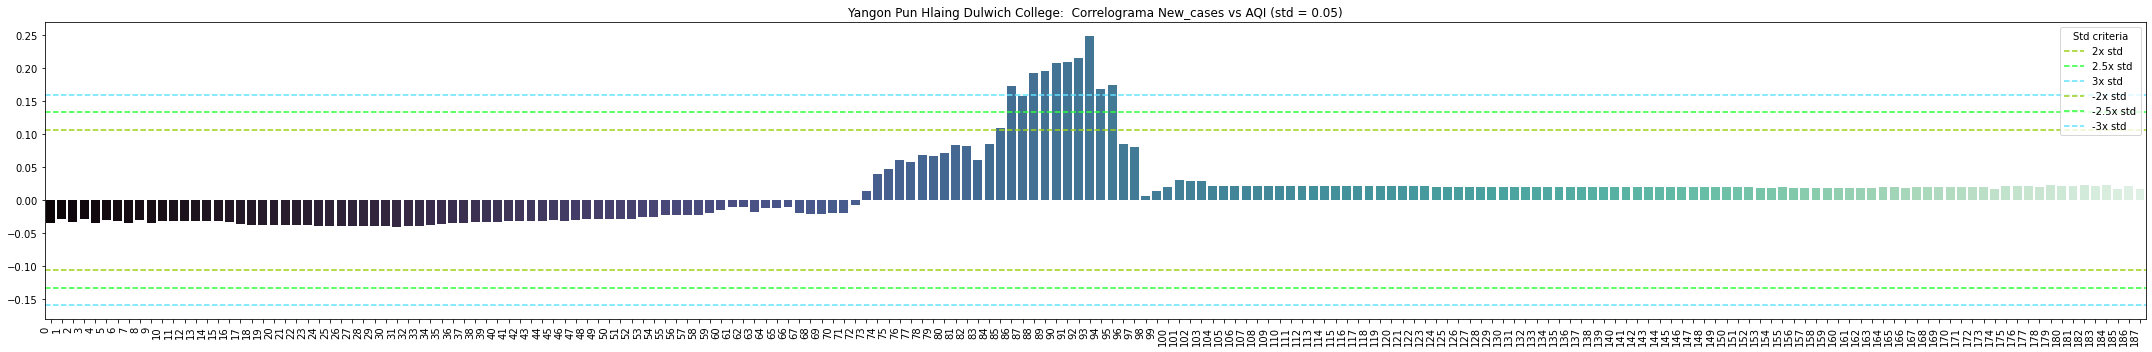

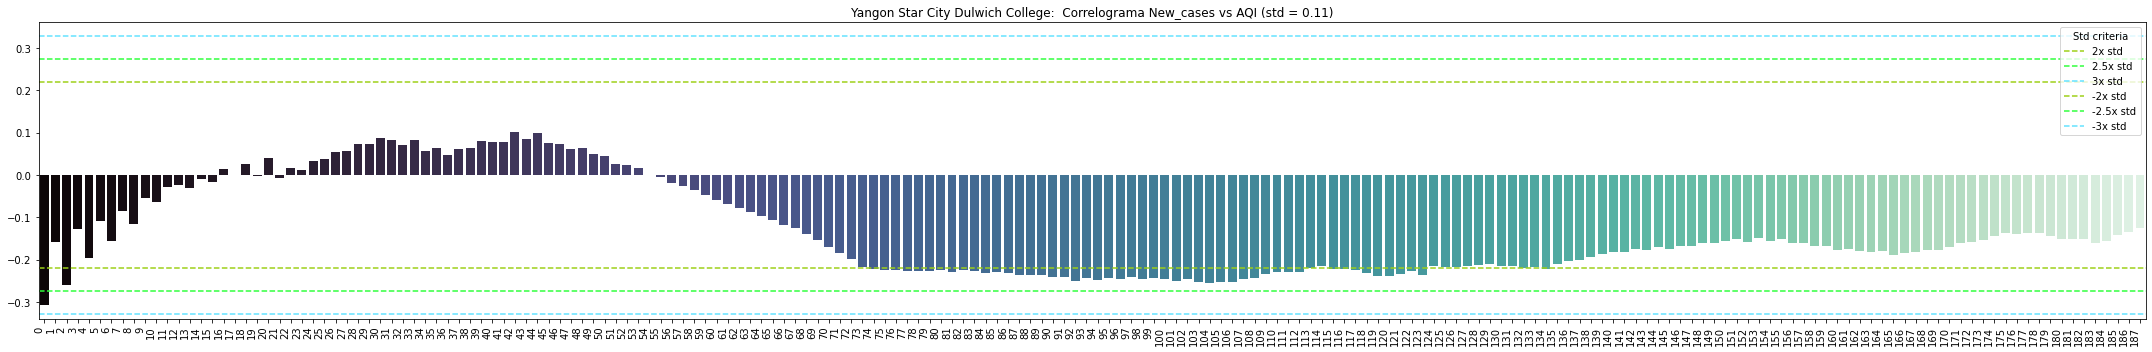

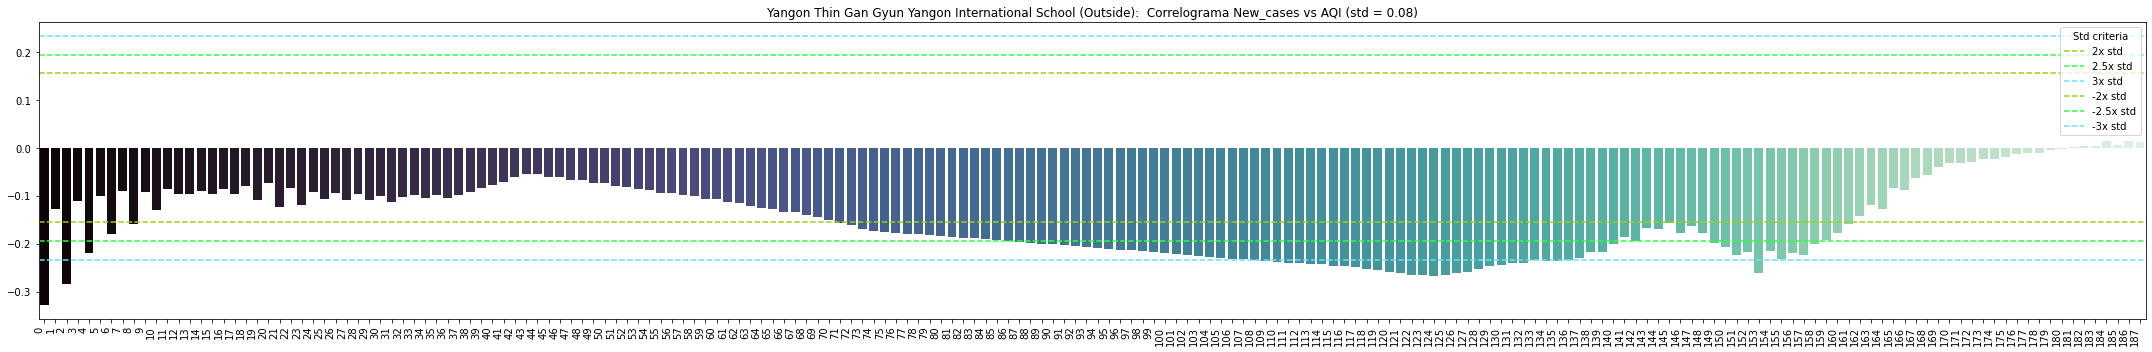

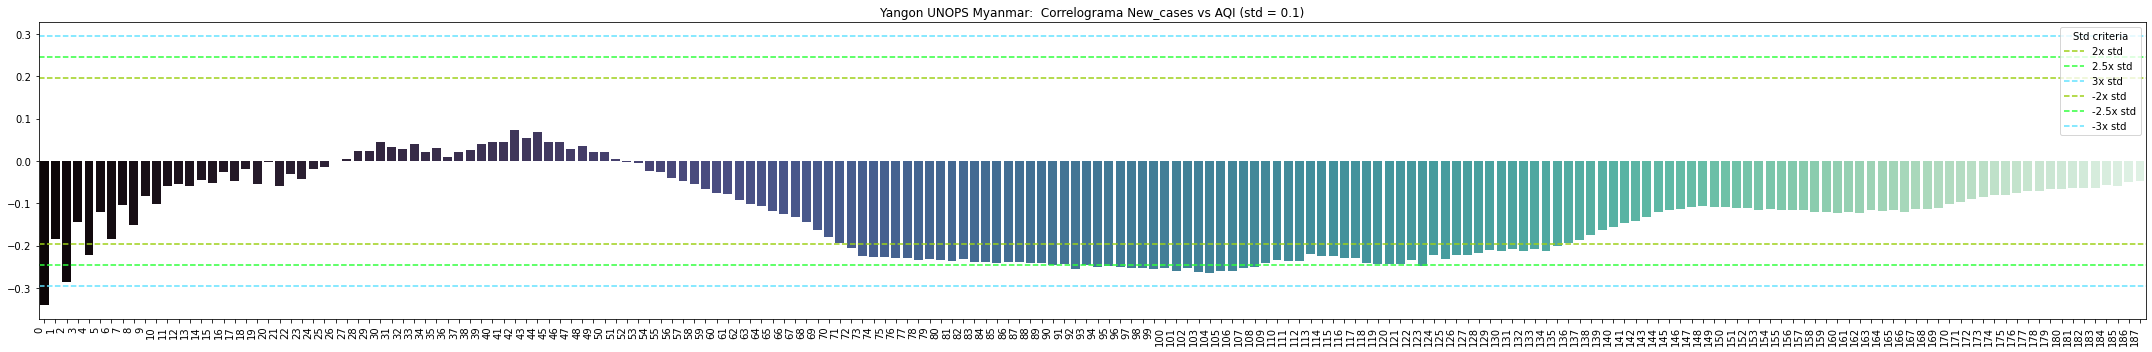

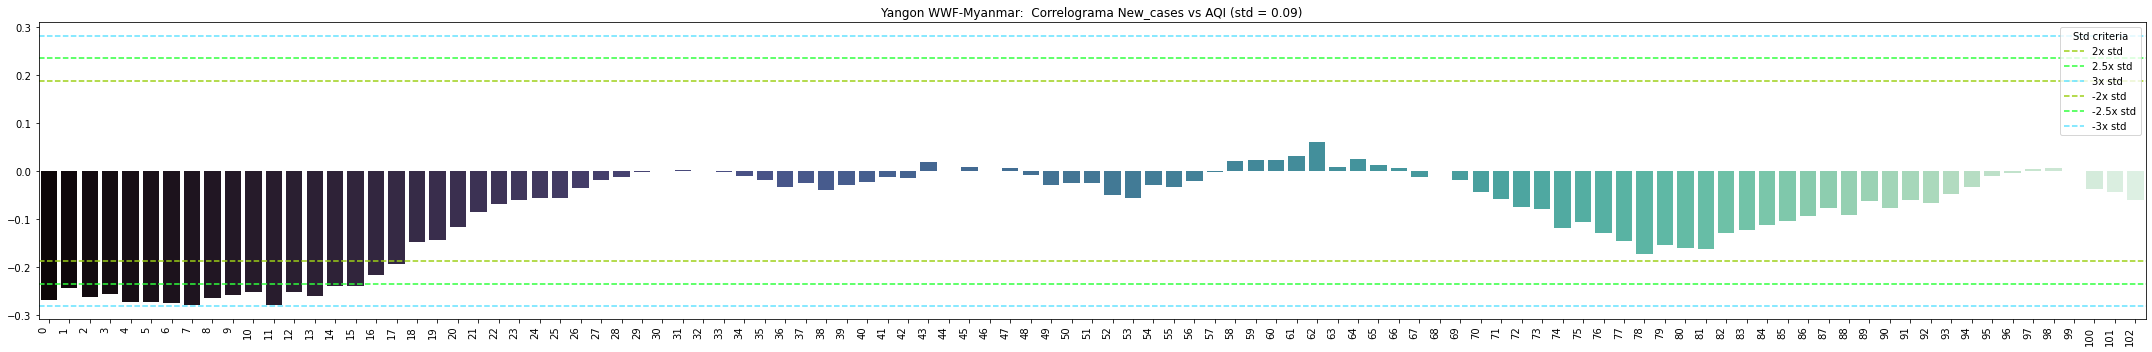

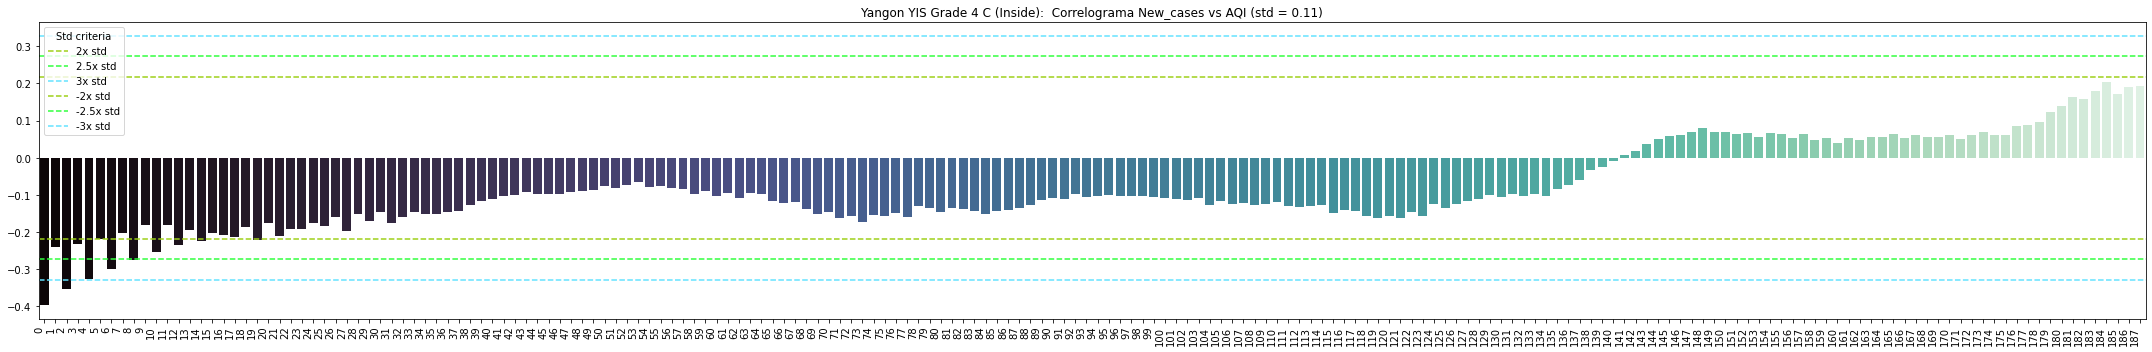

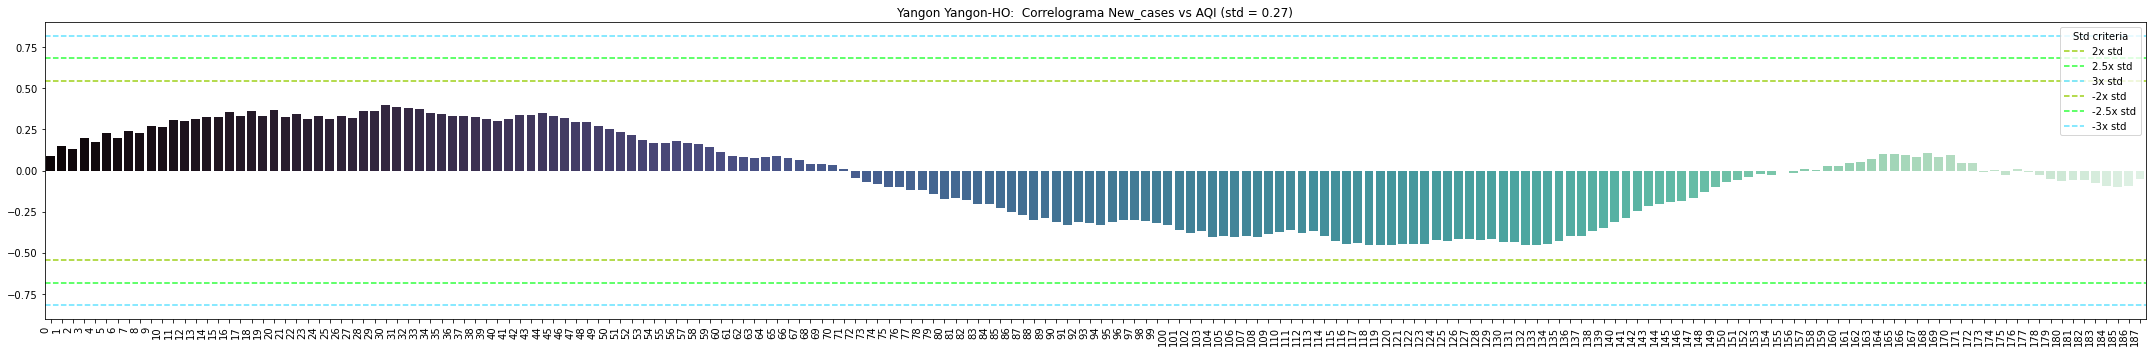

In [37]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(city_data[col2], city_data[col1], city + ': ', H)

#### Nuevos casos de muertes vs AQI

In [38]:
sel_numerical_cols = ['AQI']
sel_effects_cols = ['New_deaths']

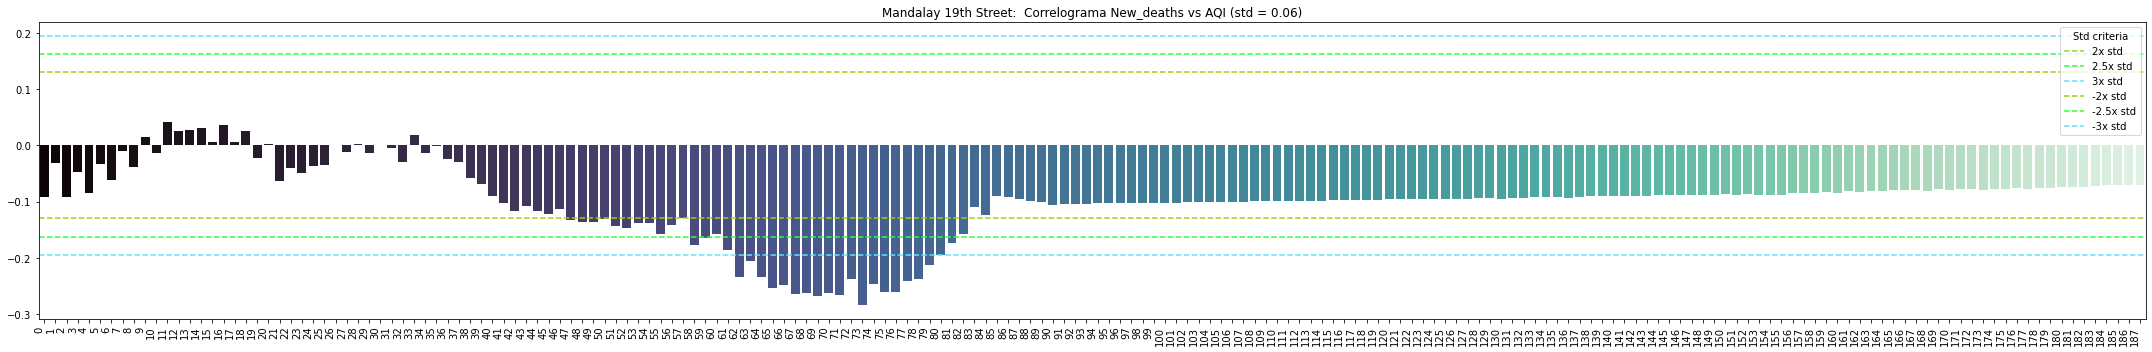

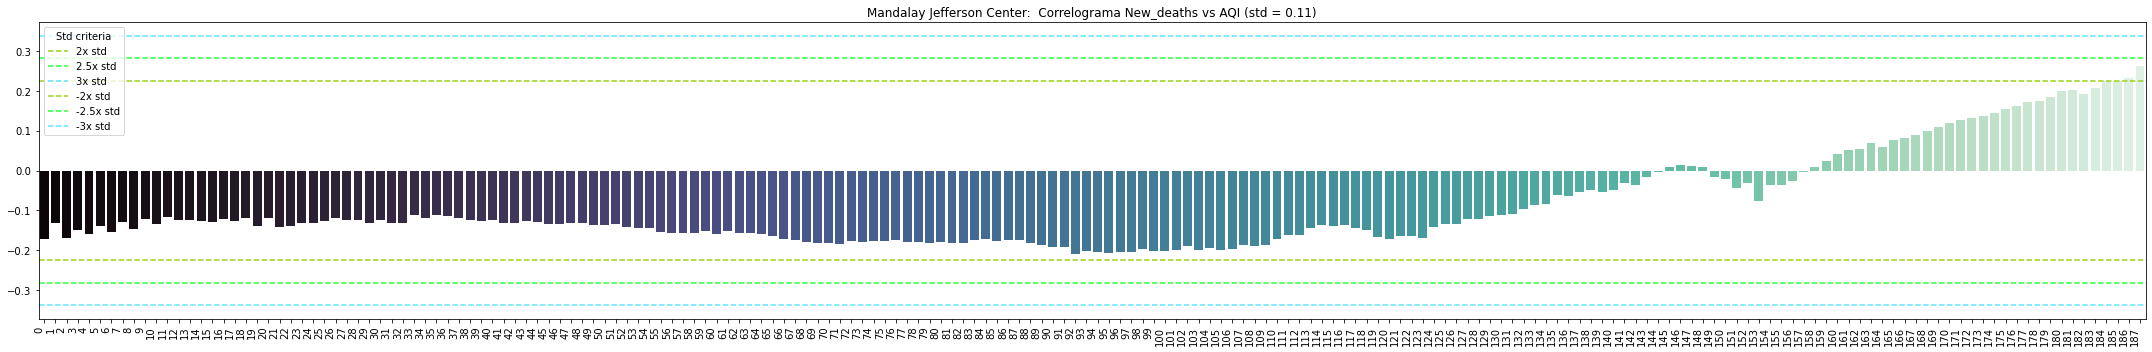

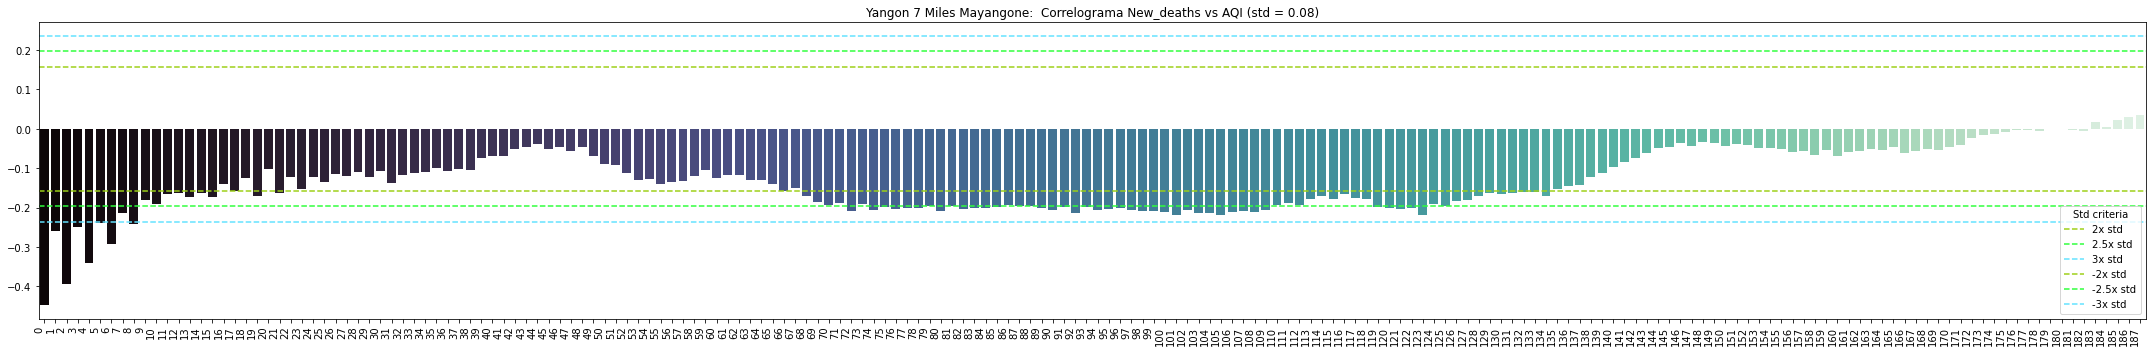

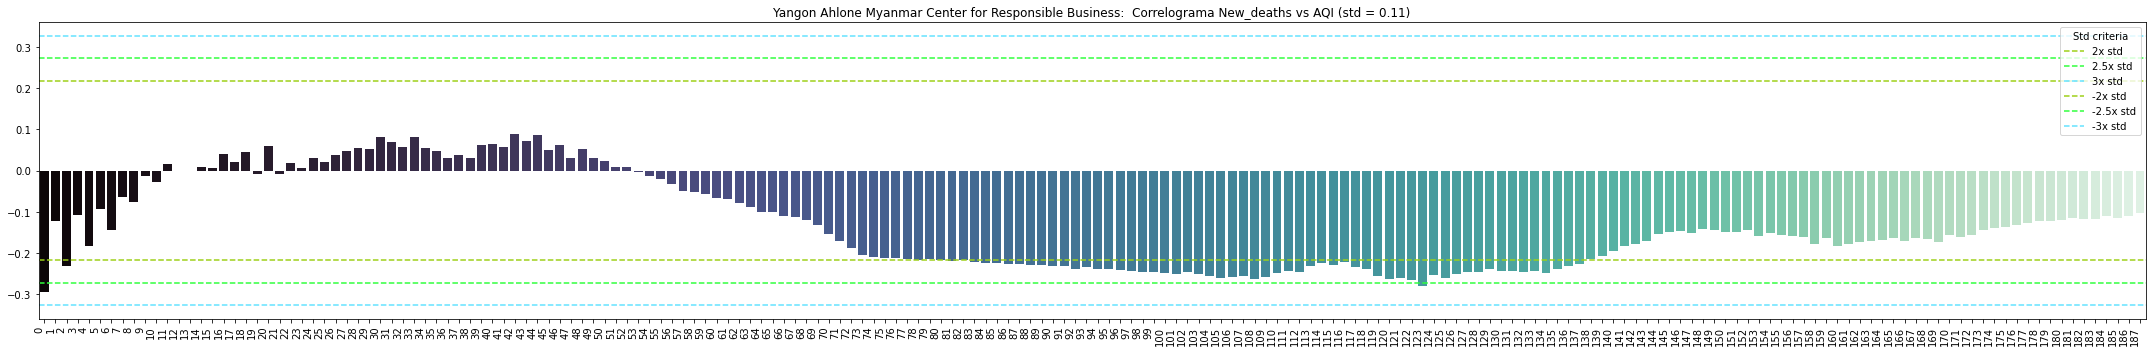

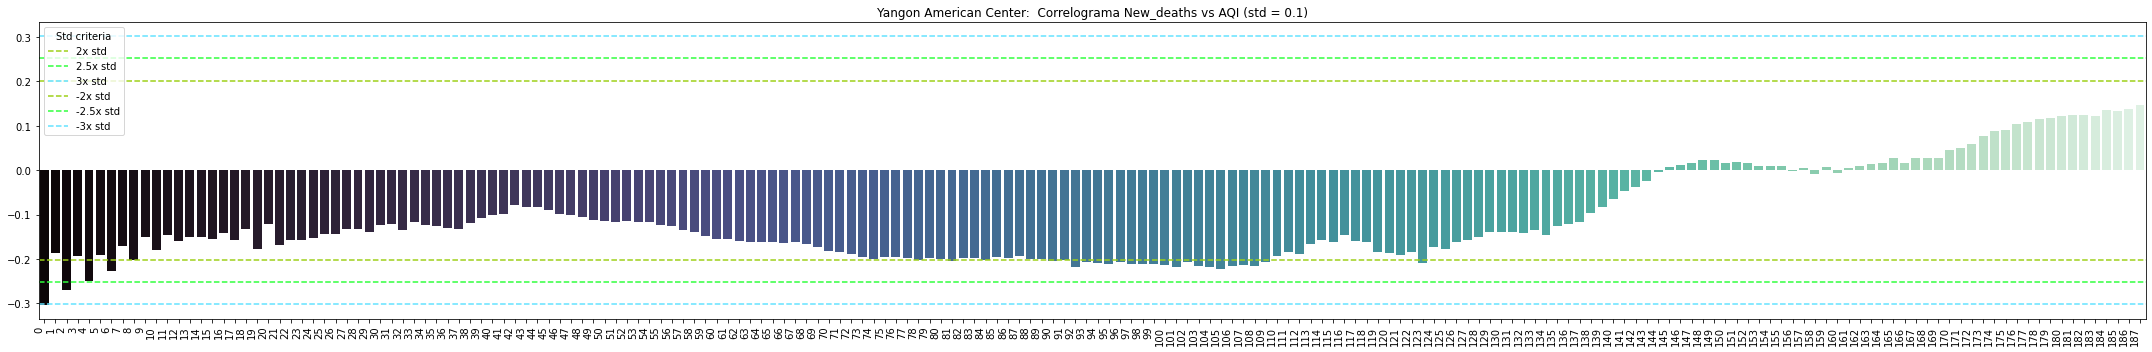

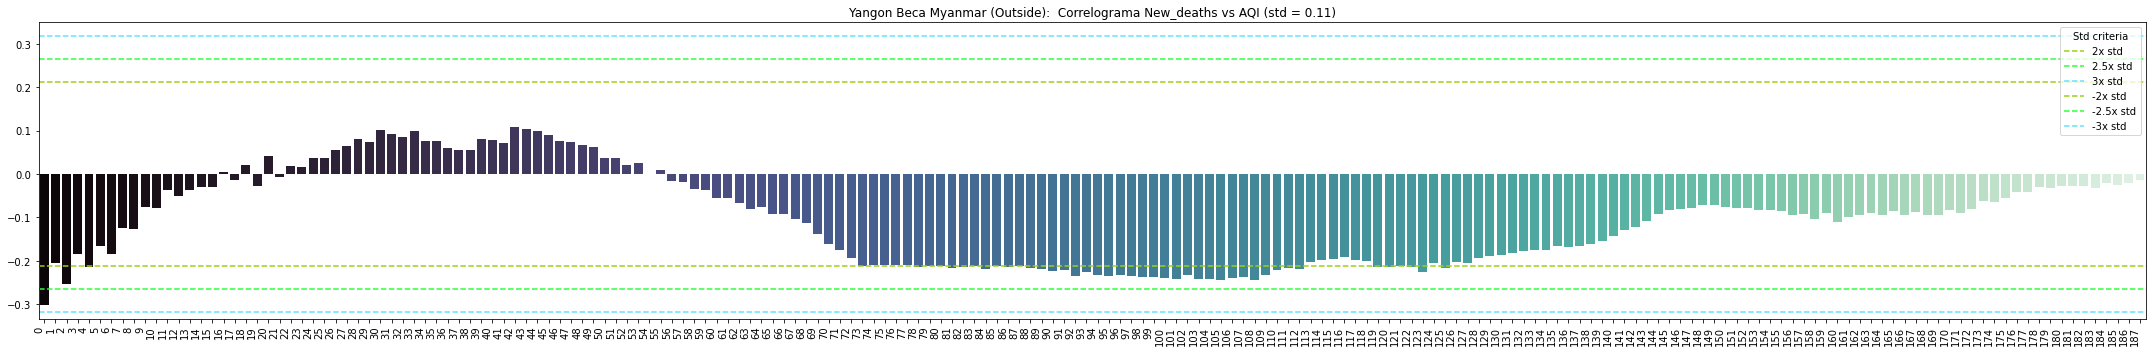

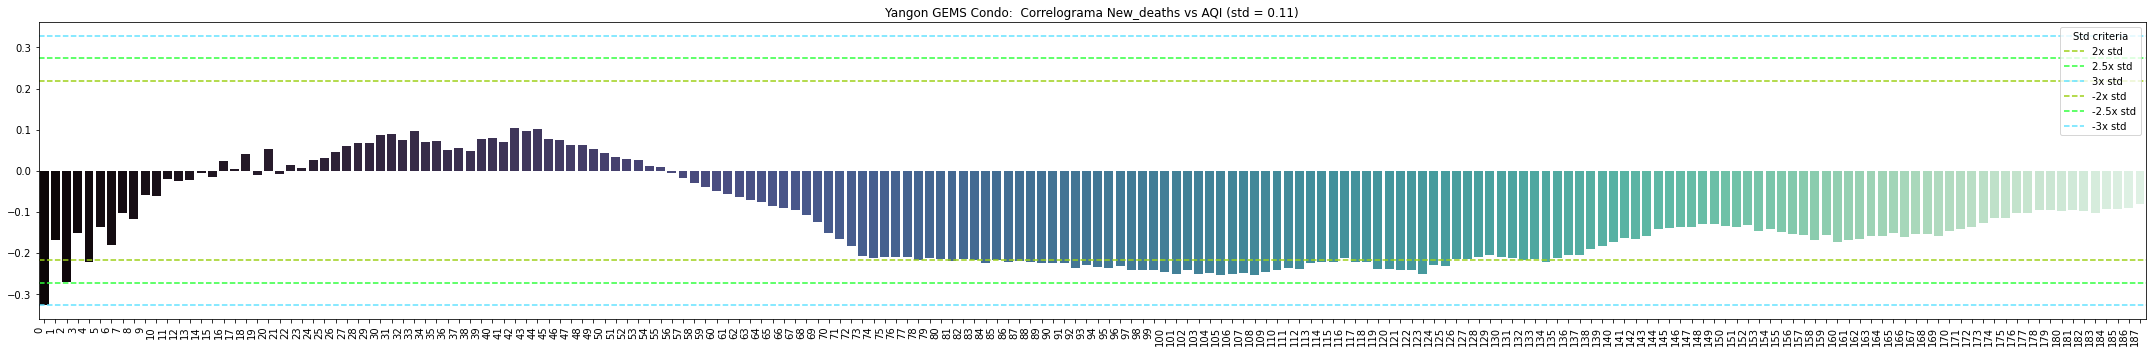

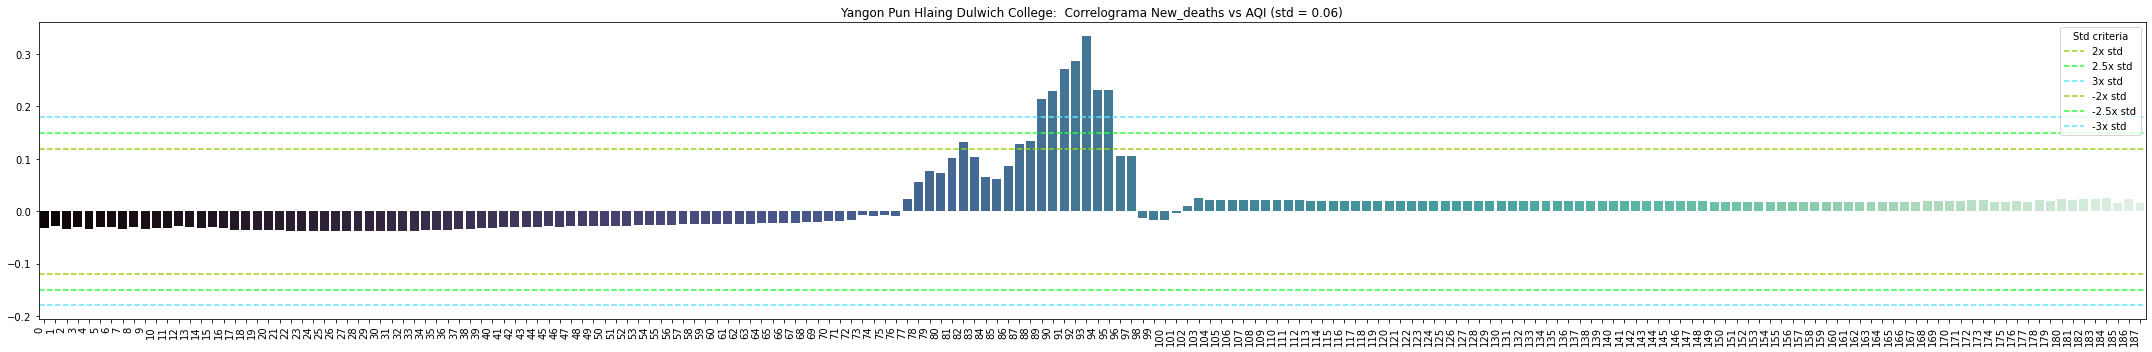

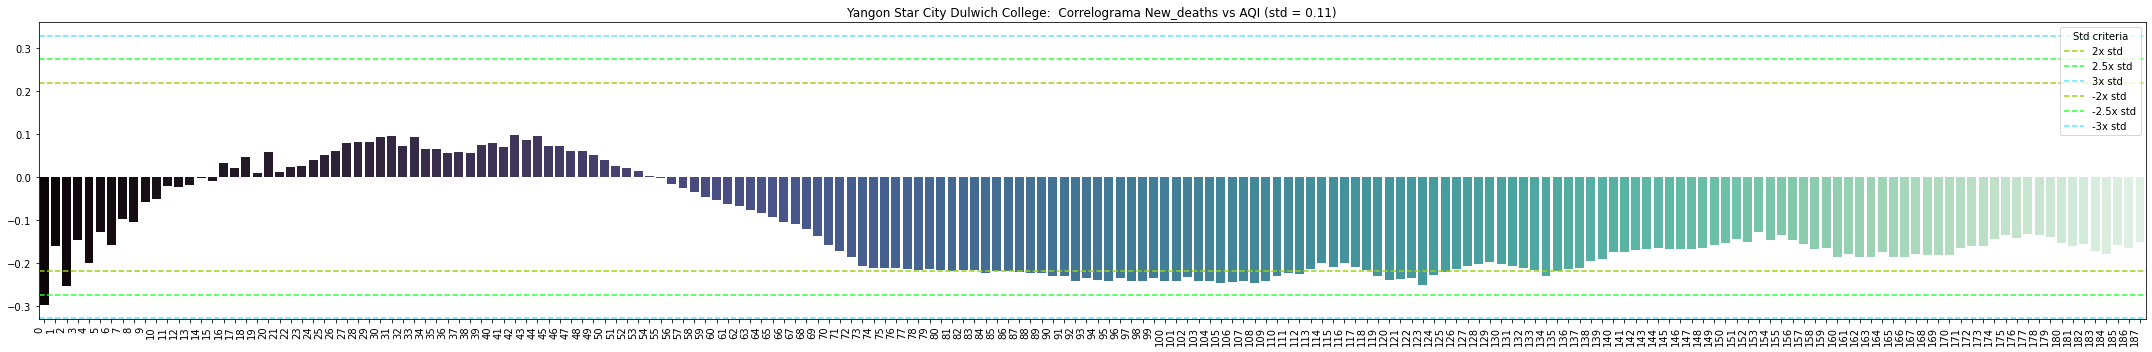

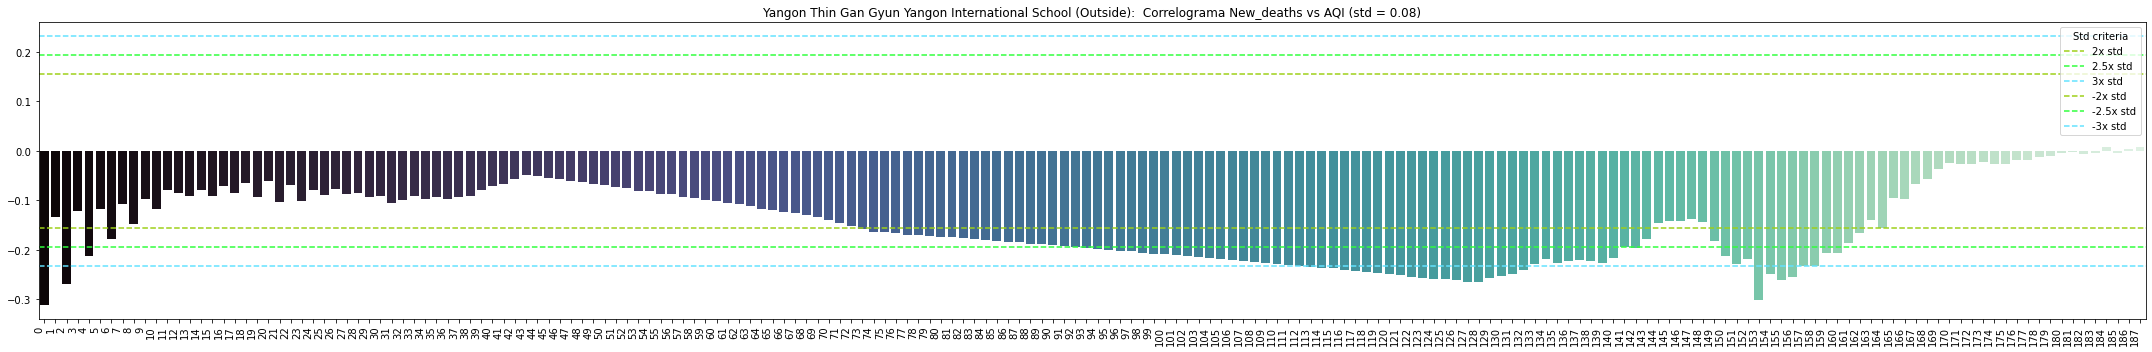

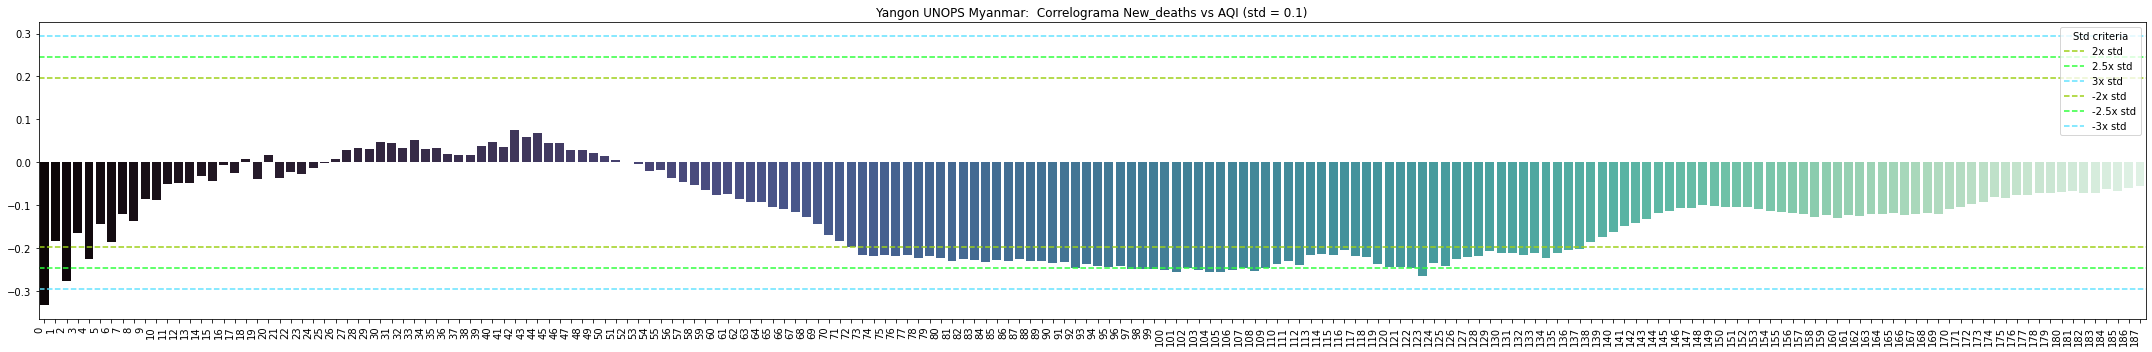

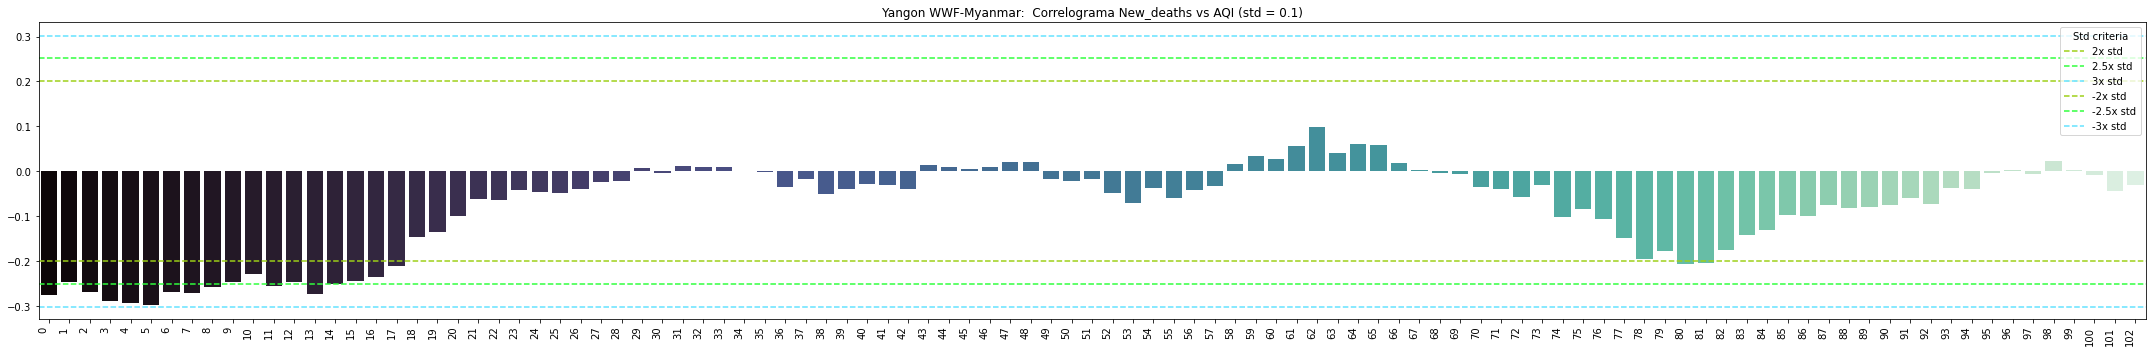

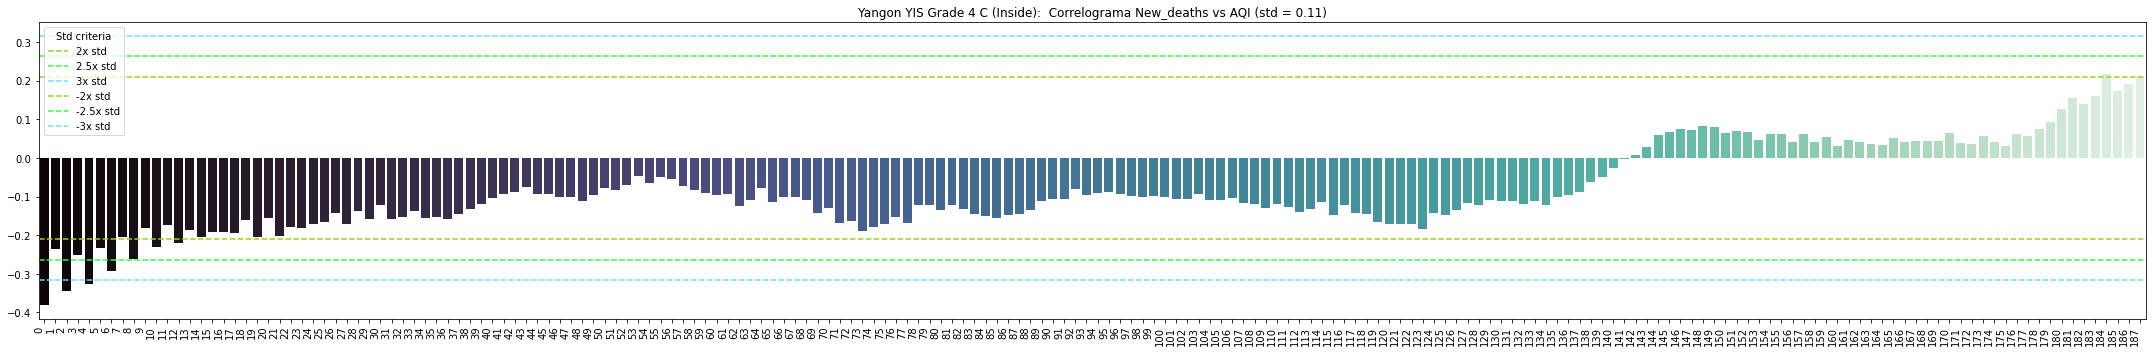

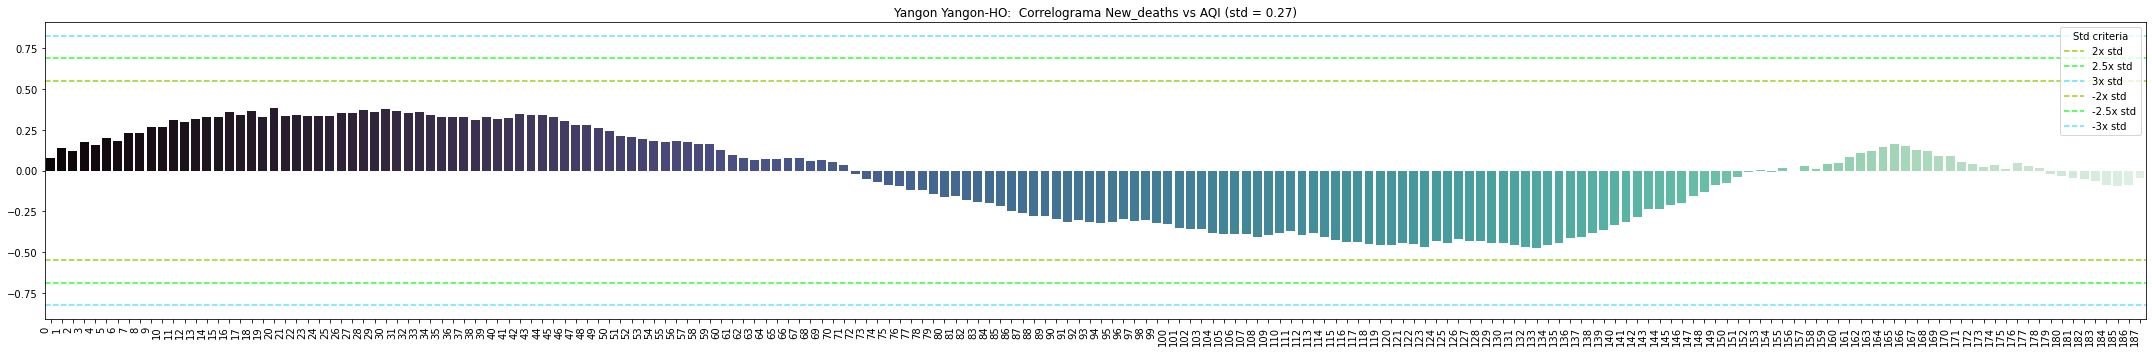

In [39]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(city_data[col2], city_data[col1], city + ': ', H)

Observamos que en la mayoría de centros de medición, la correlación entre la cantidad de nuevos casos de enfermos y muertes con AQI es negativa para la mayoría del tiempo, lo cual nos quiere decir que cuando una de estas variables disminuye aumenta la otra en el futuro. Este resultado es importante, ya que contradice la intuición que cuando los contaminantes son mayores existen más casos de enfermos y muertes.

#### Nuevos casos de enfermos vs Temperatura

In [40]:
sel_numerical_cols = ['Temperature_F']
sel_effects_cols = ['New_cases']

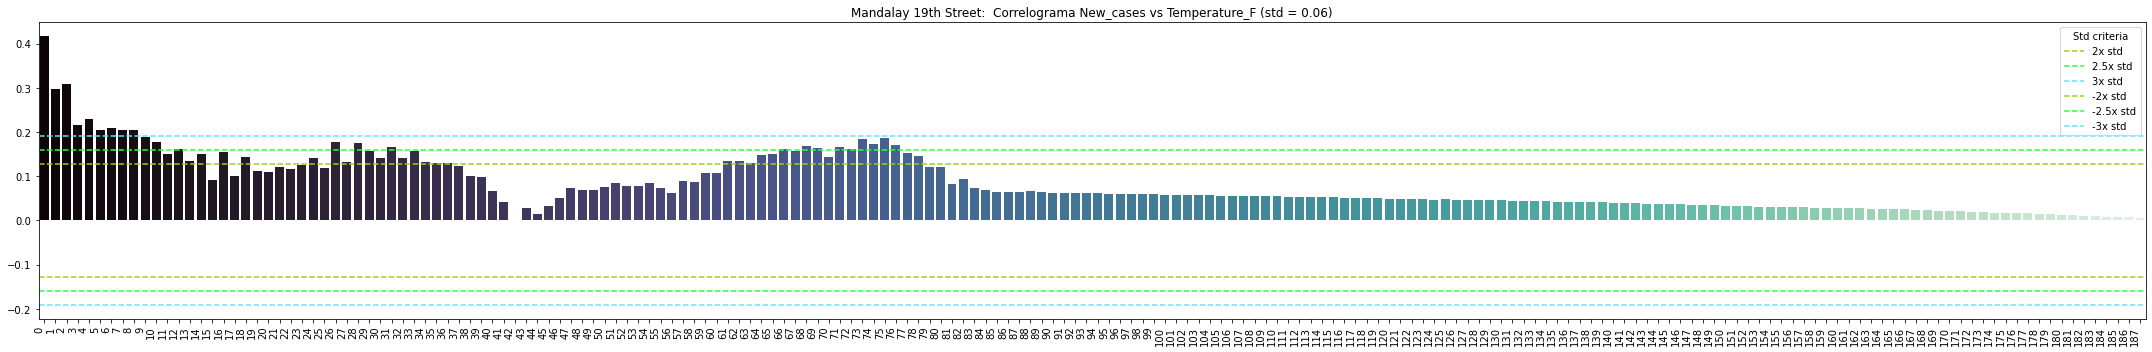

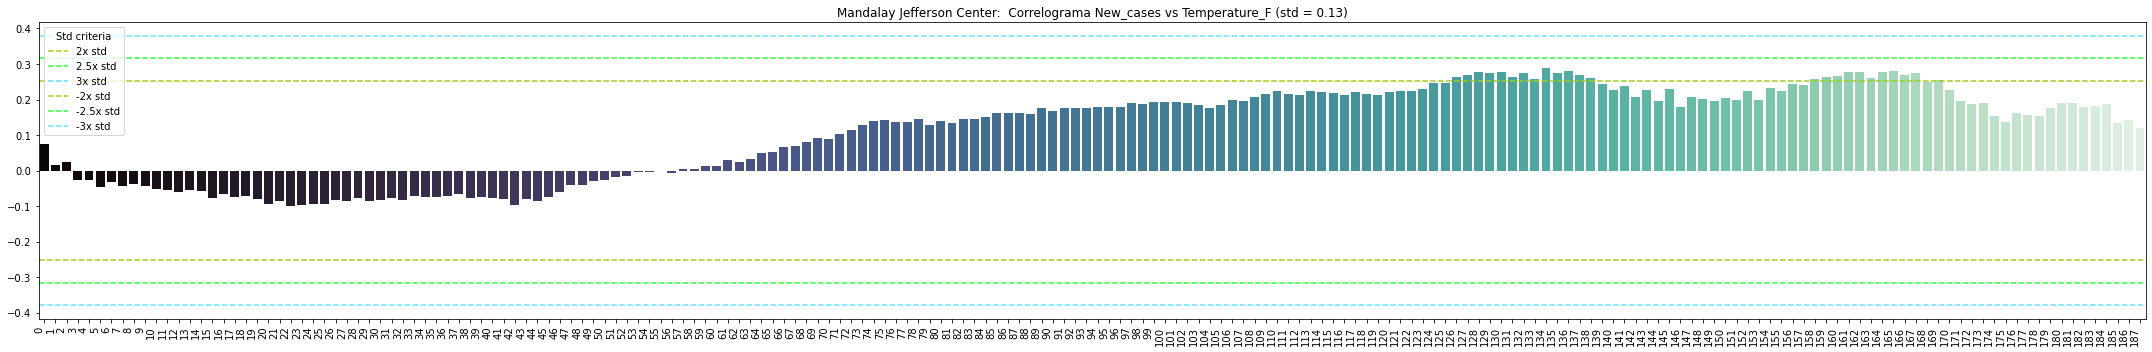

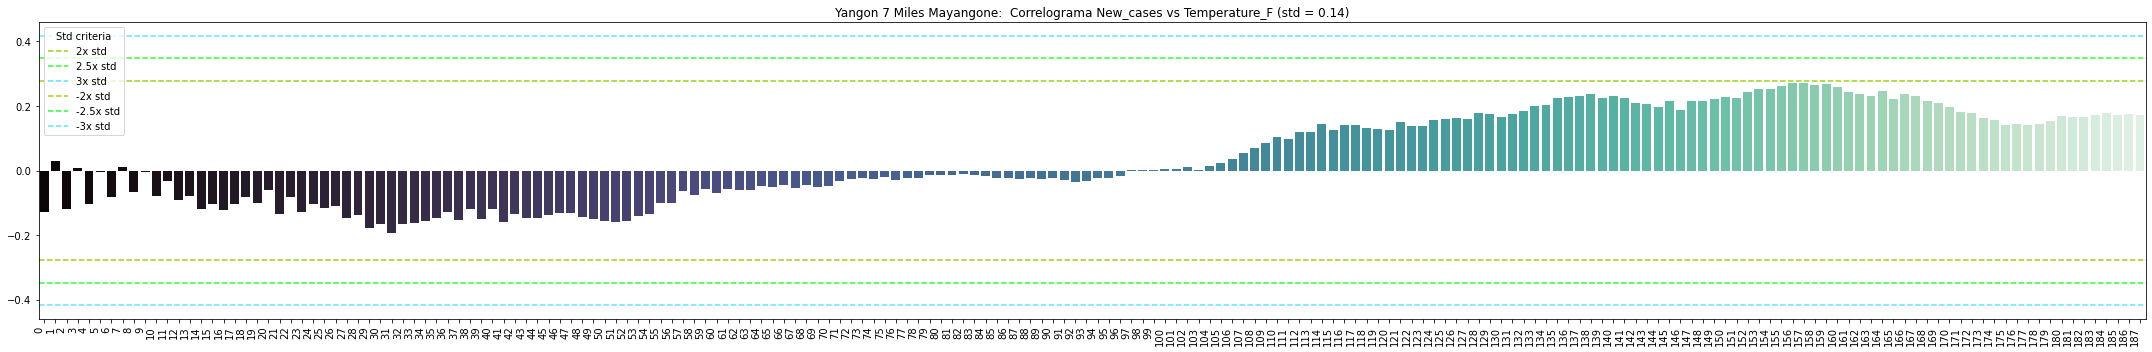

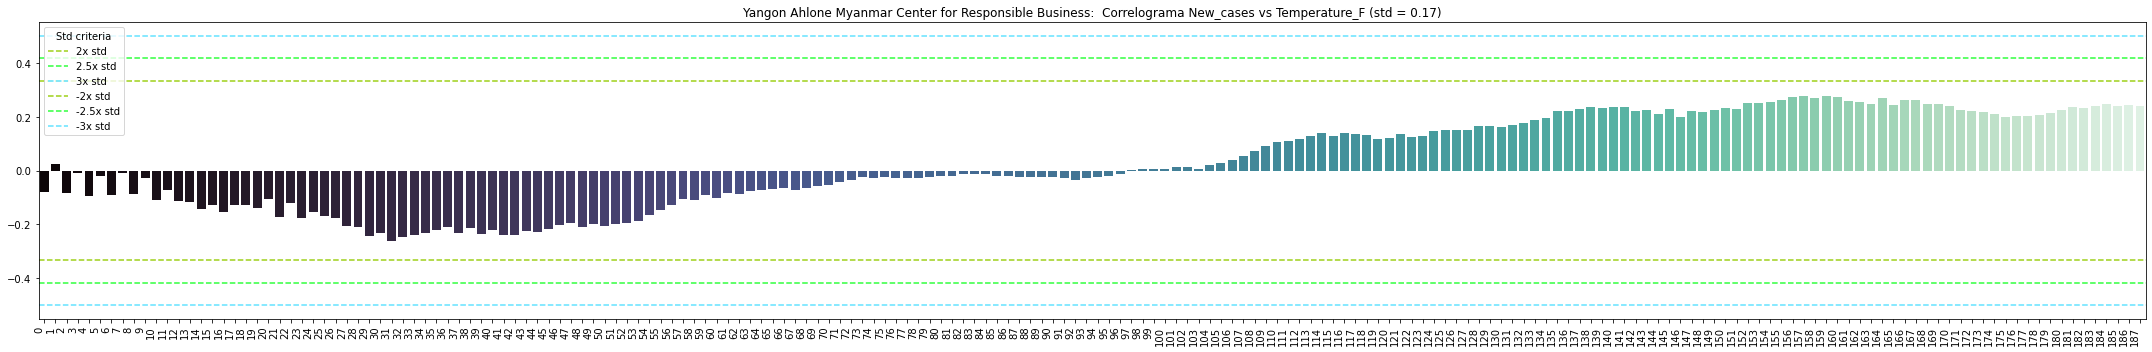

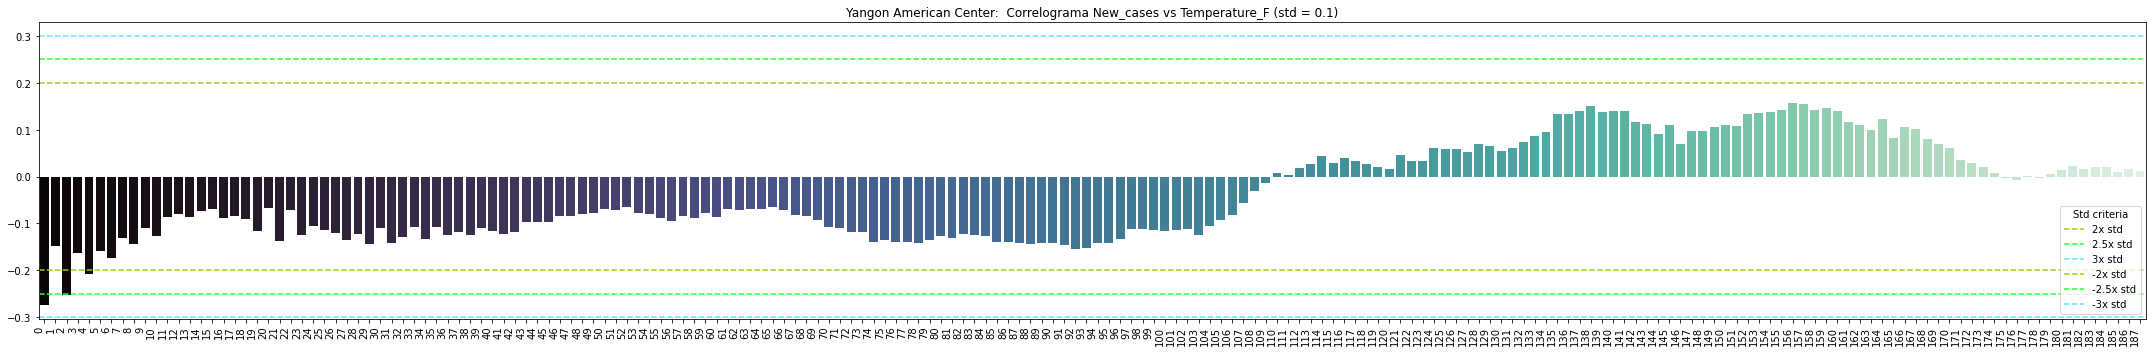

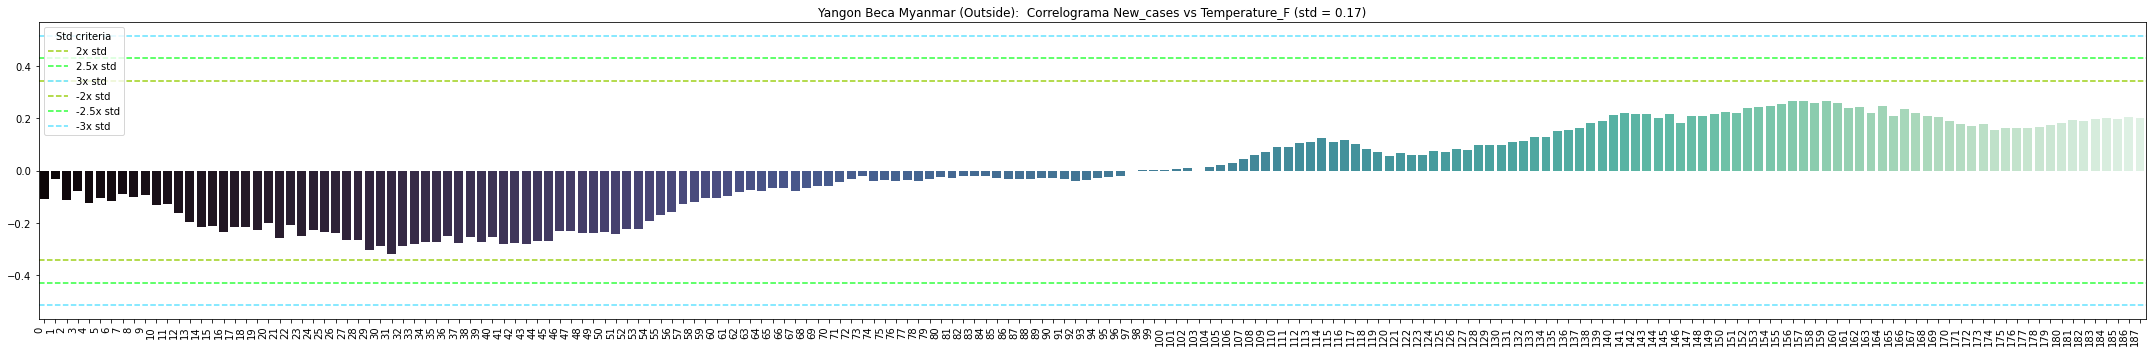

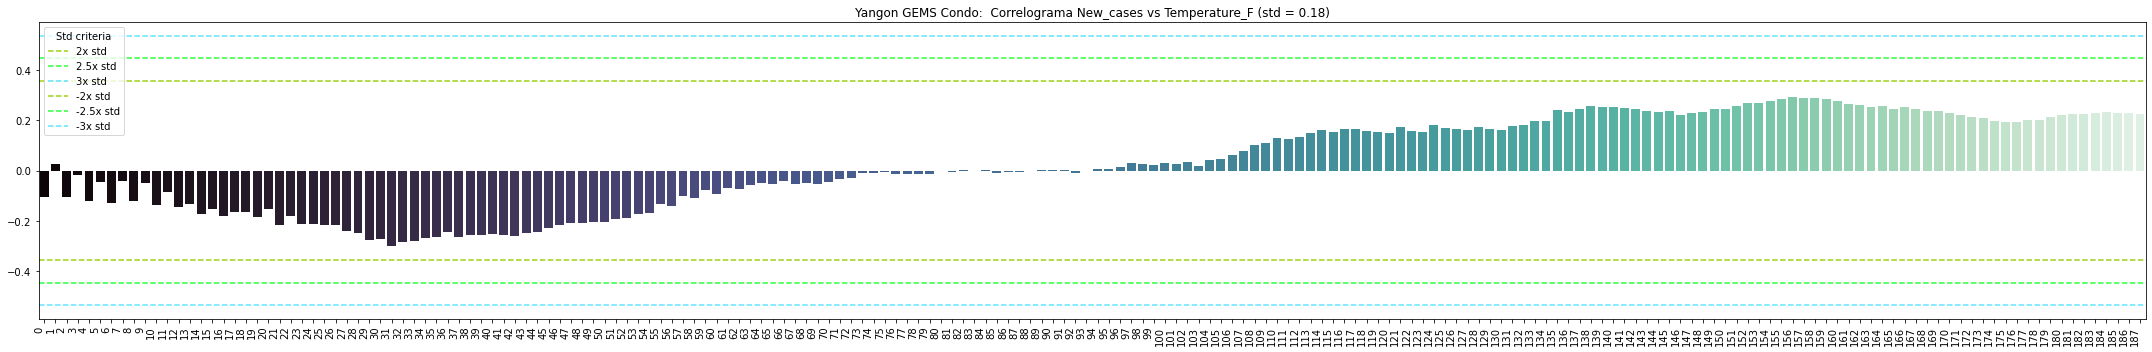

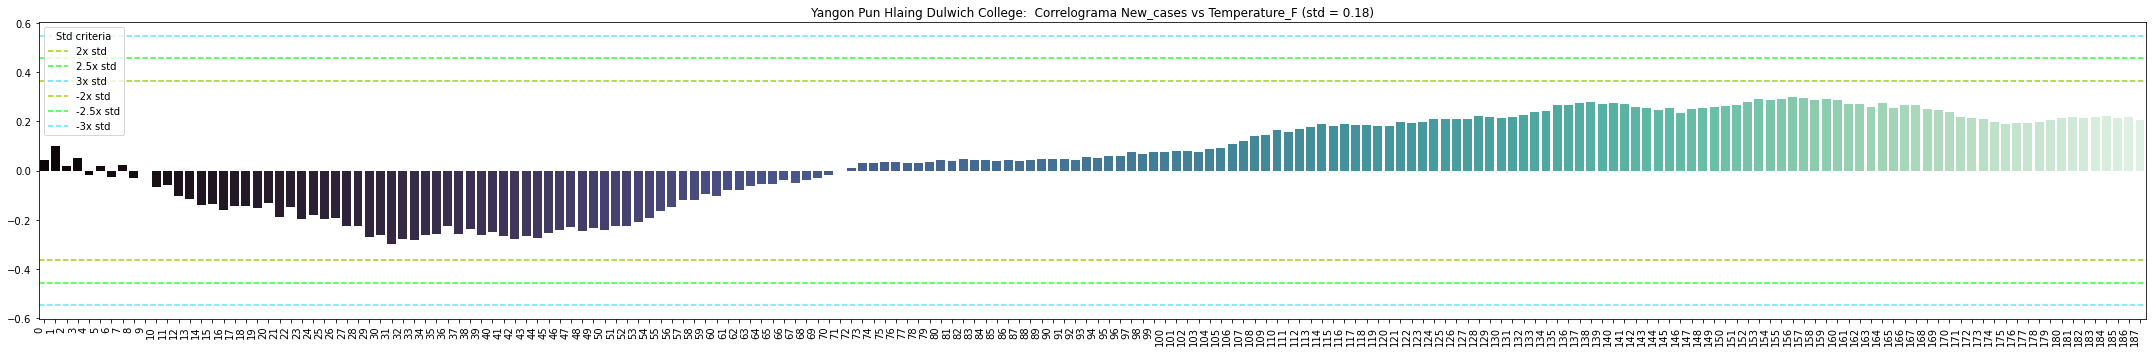

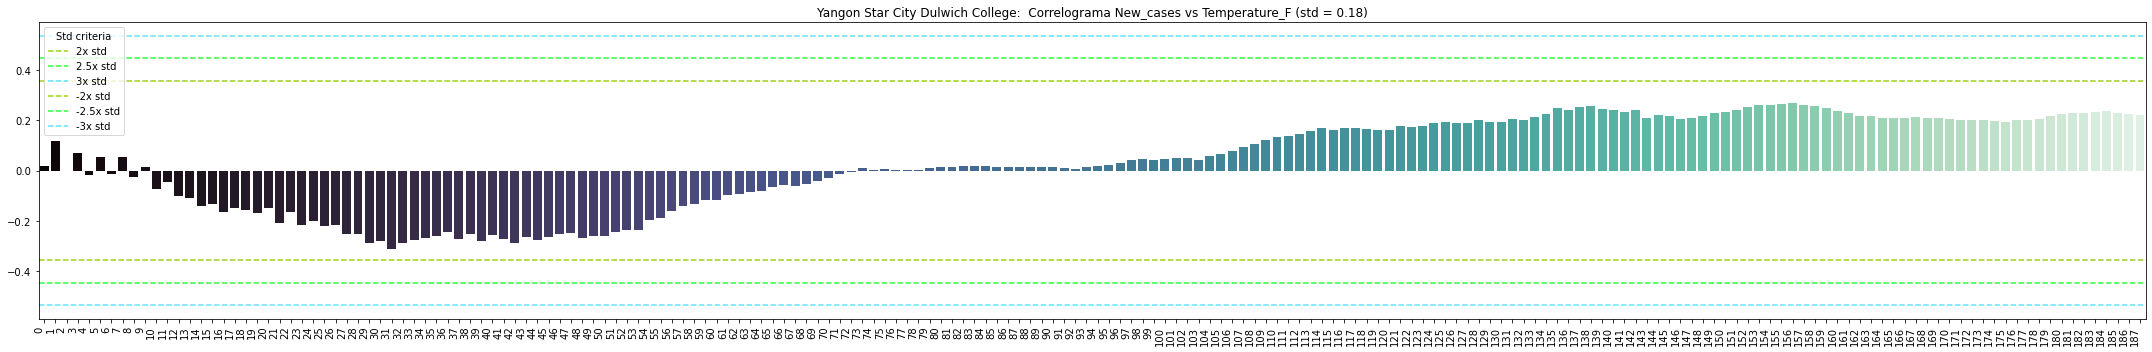

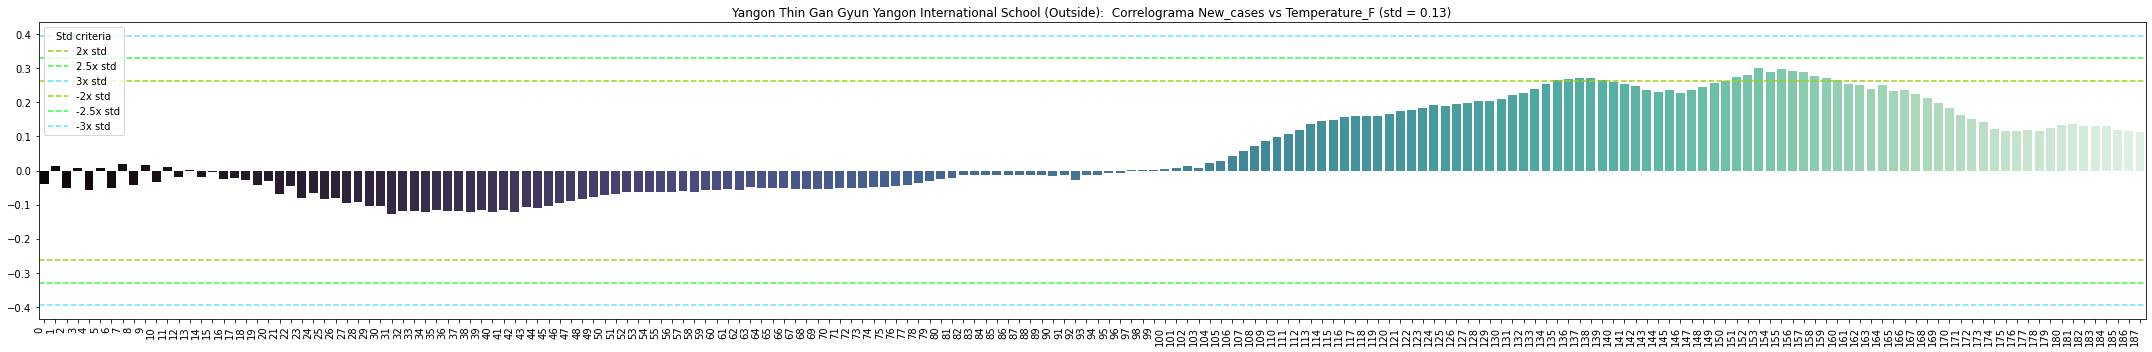

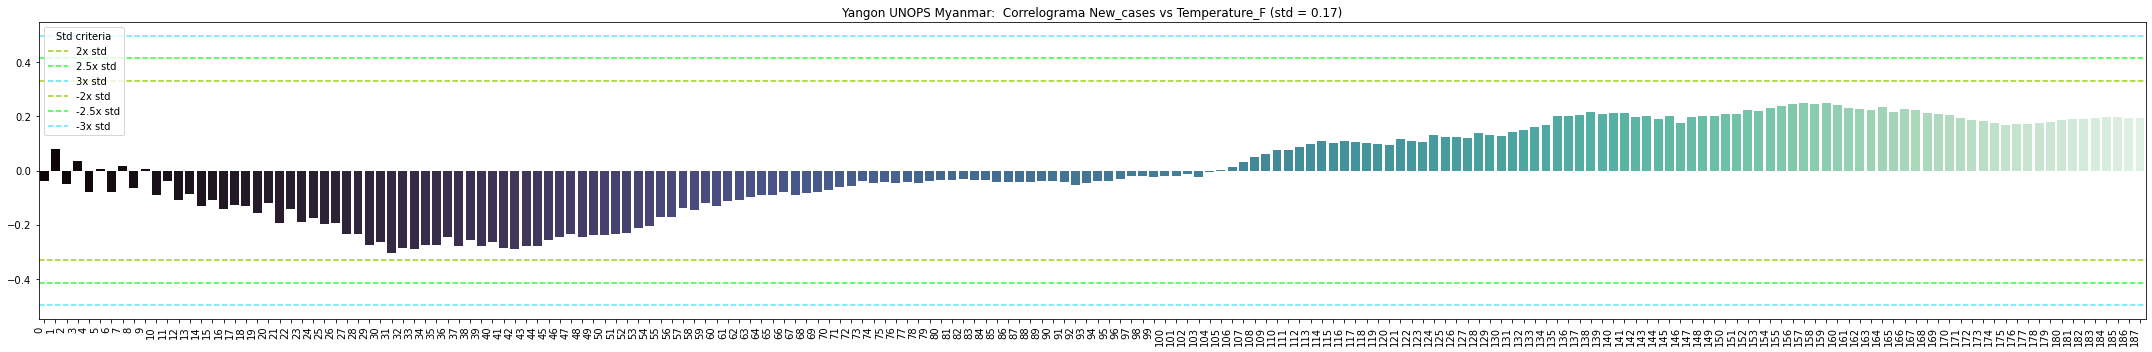

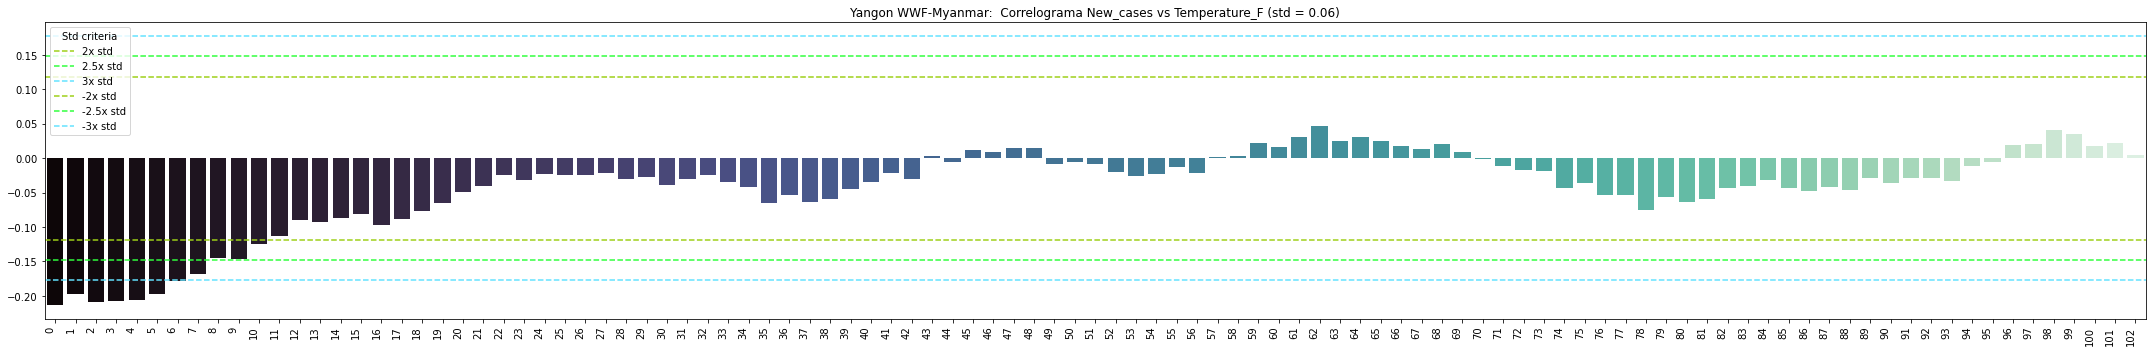

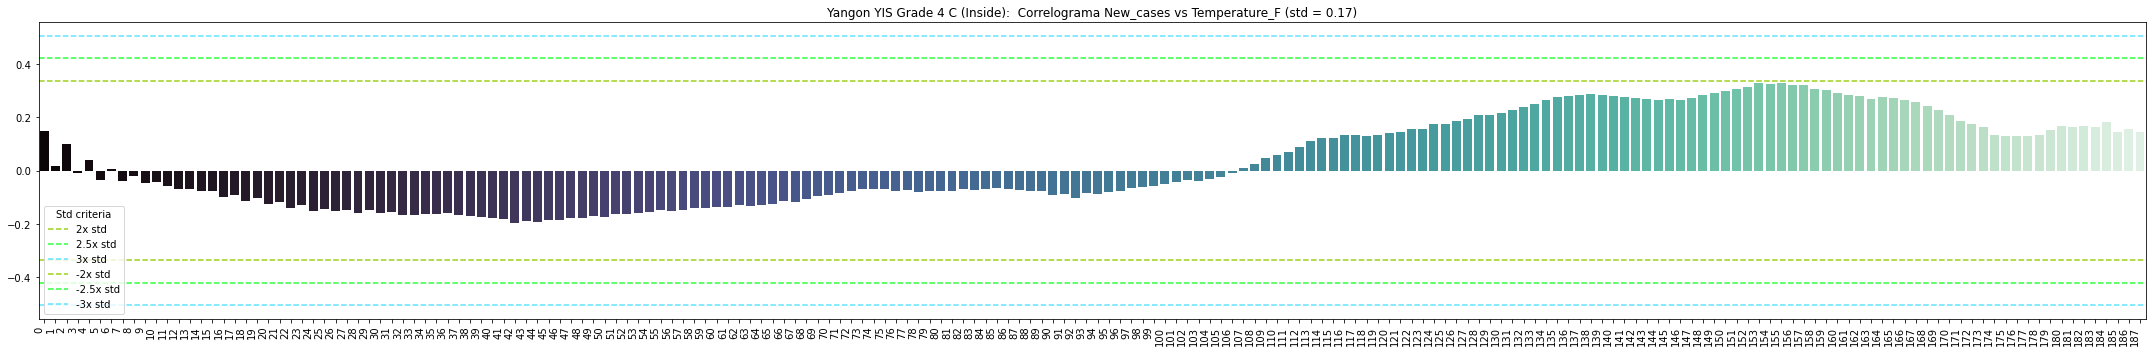

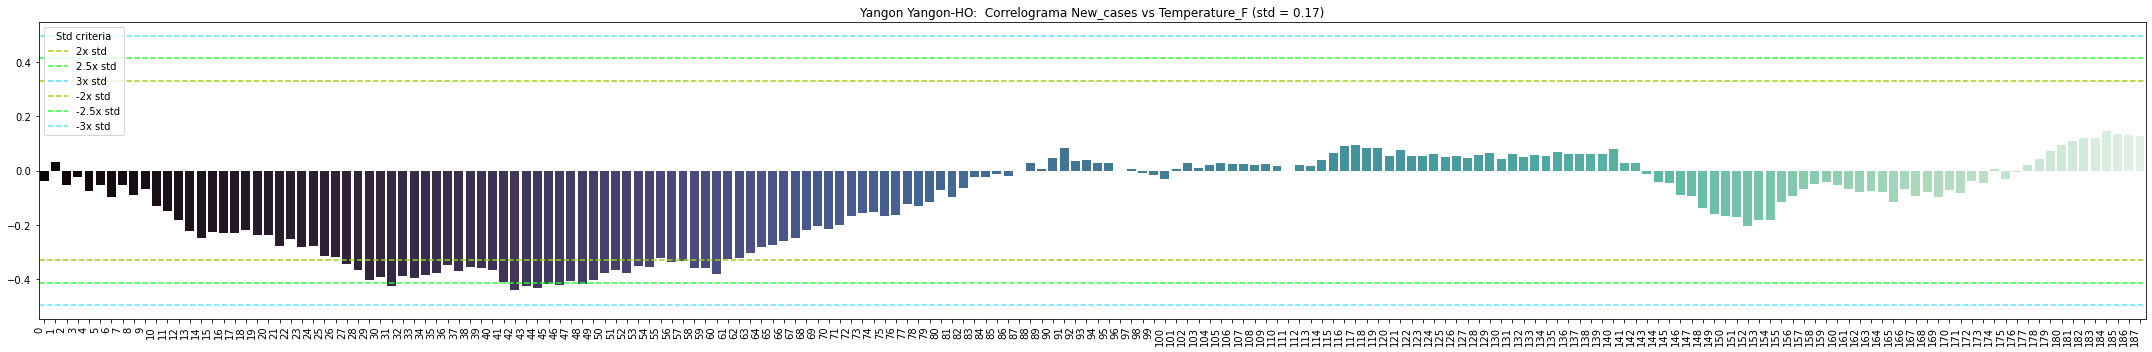

In [41]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(city_data[col2], city_data[col1], city + ': ', H)

Observamos que en la mayoría de centros de medición, la correlación entre la cantidad de nuevos casos de enfermos y el AQI es negativa la mayoría del tiempo, lo cual nos quiere decir que cuando una de estas variables disminuye aumenta la otra en el futuro. Este resultado es importante, ya que contradice la intuición que cuando los contaminantes son mayores existen más casos de enfermos.

#### Nuevos casos de muertes vs Temperatura

In [42]:
sel_numerical_cols = ['Temperature_F']
sel_effects_cols = ['New_deaths']

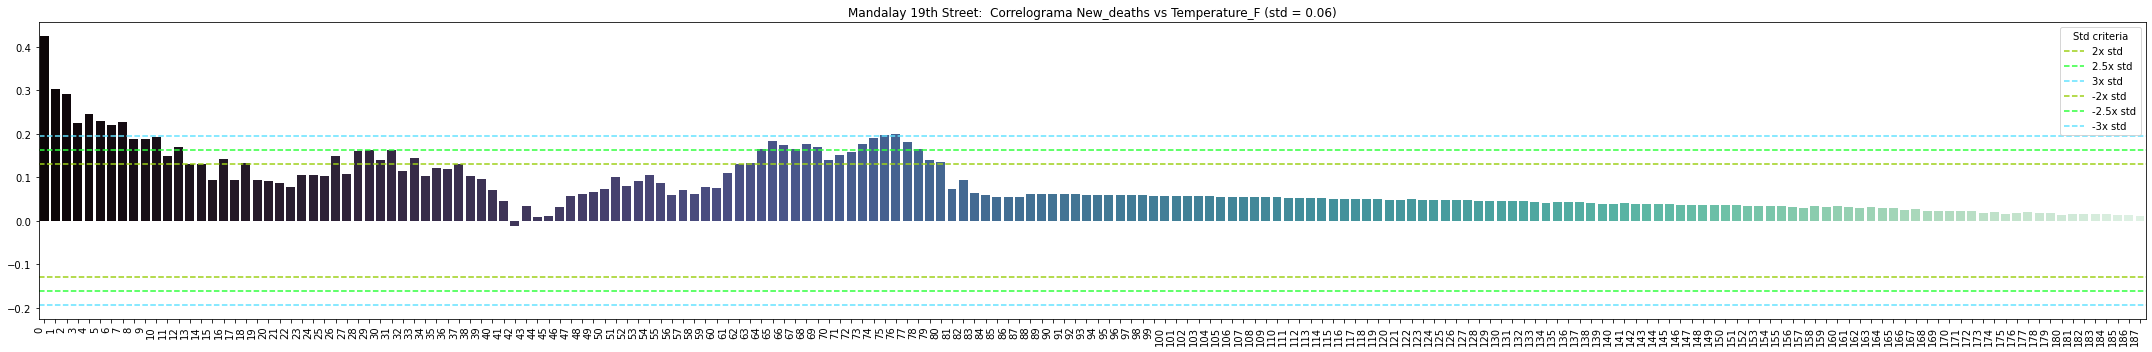

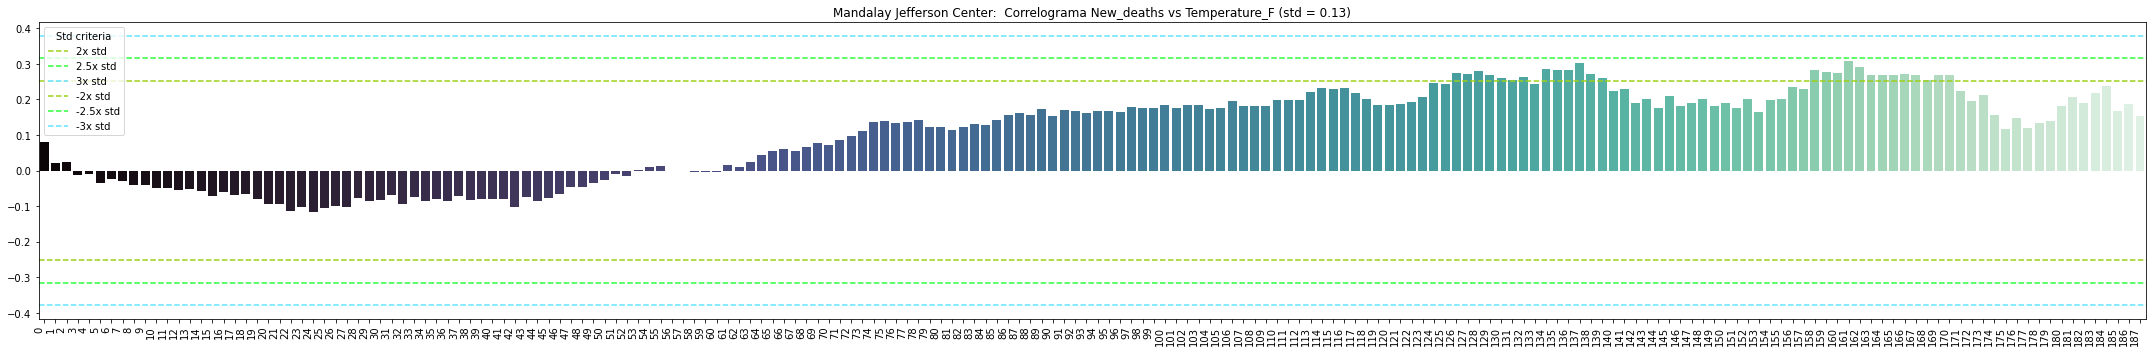

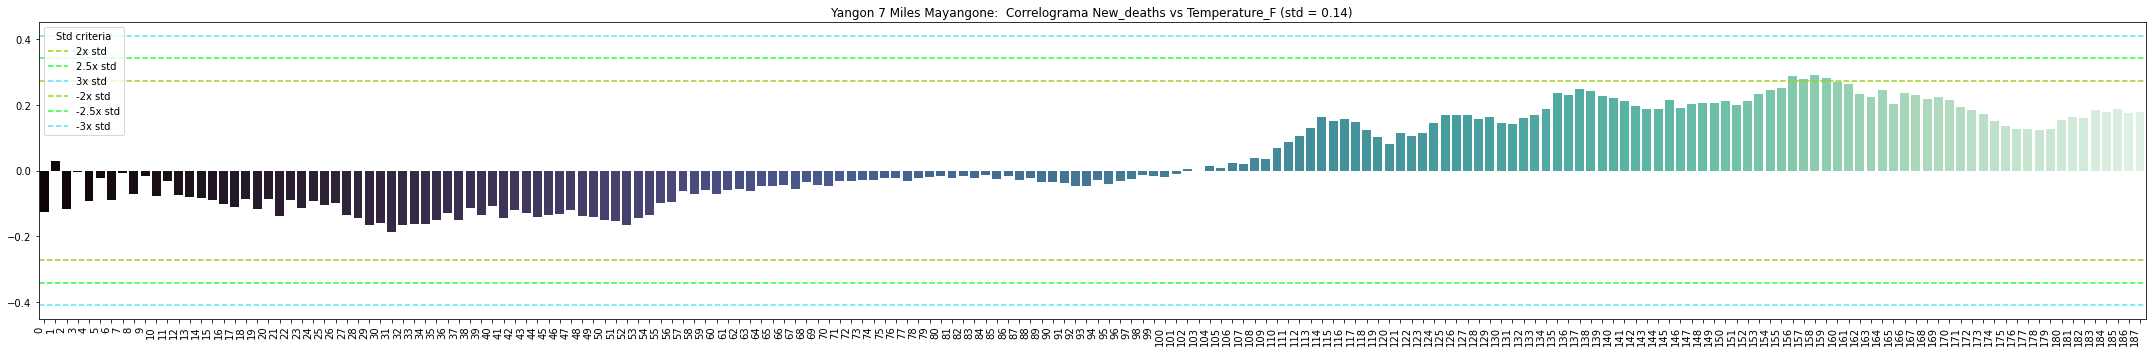

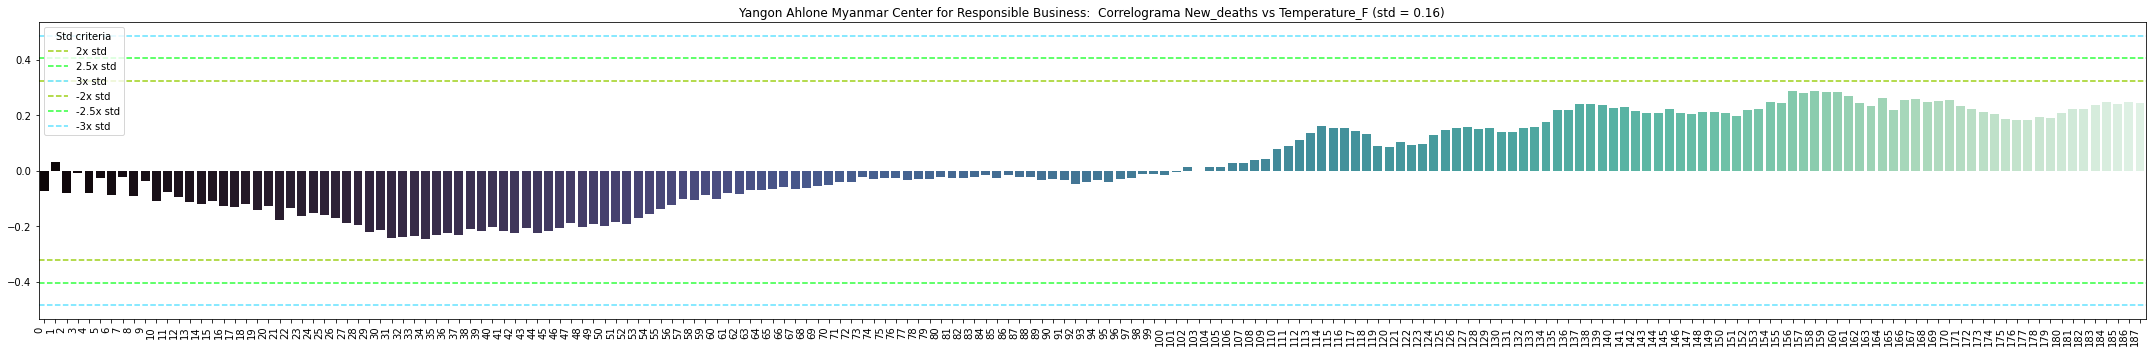

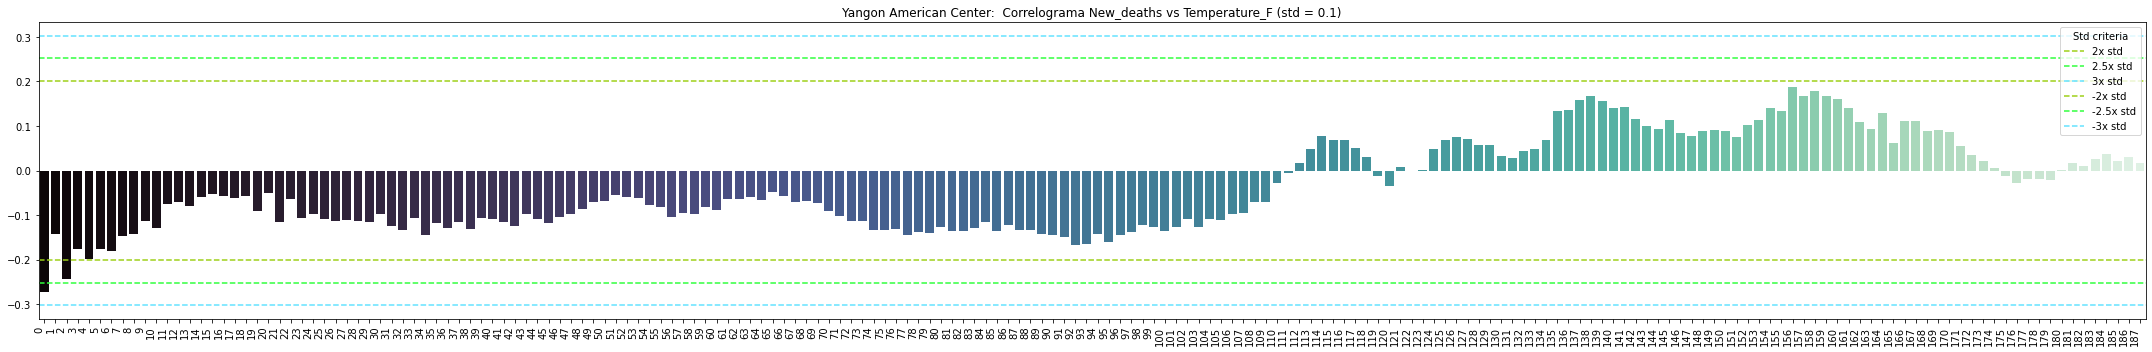

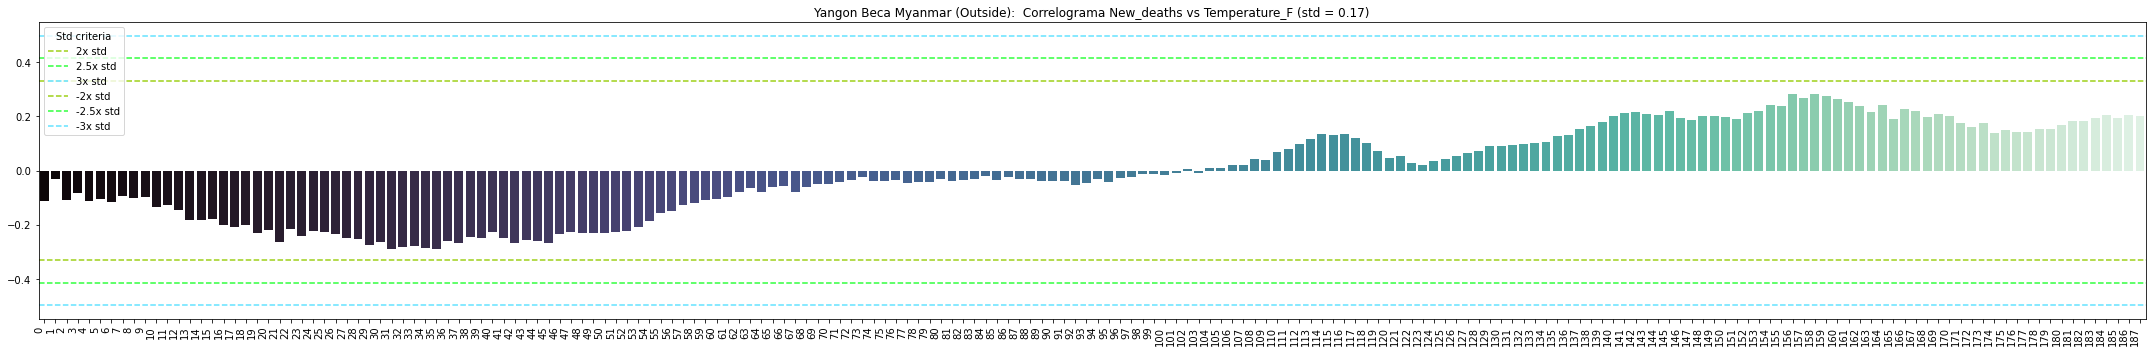

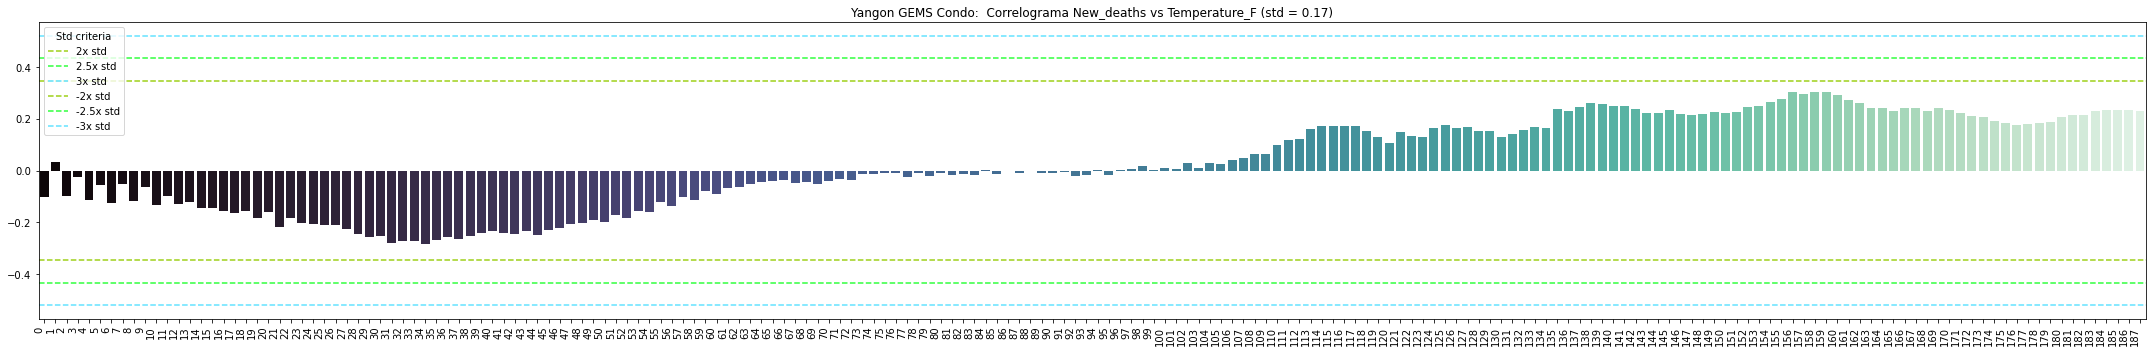

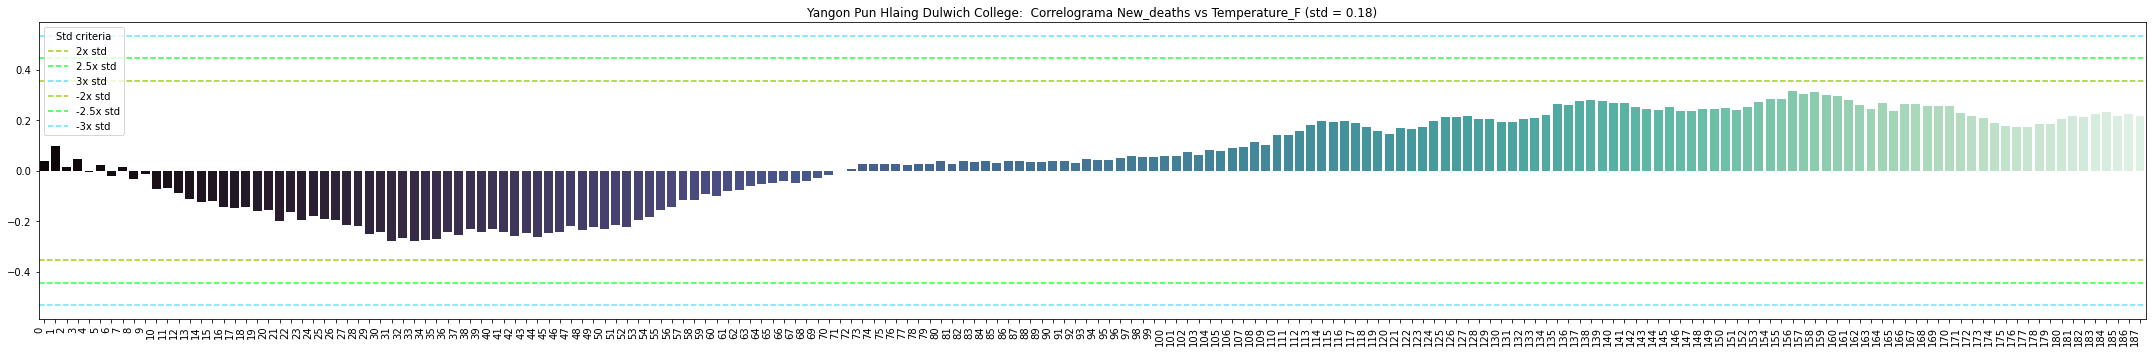

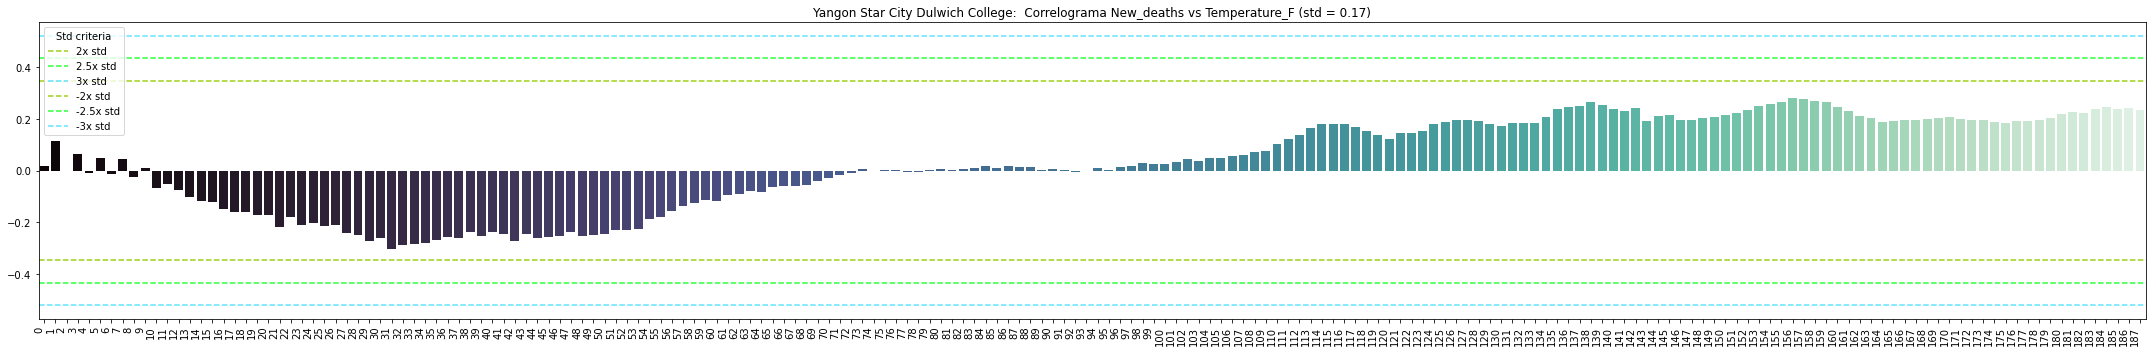

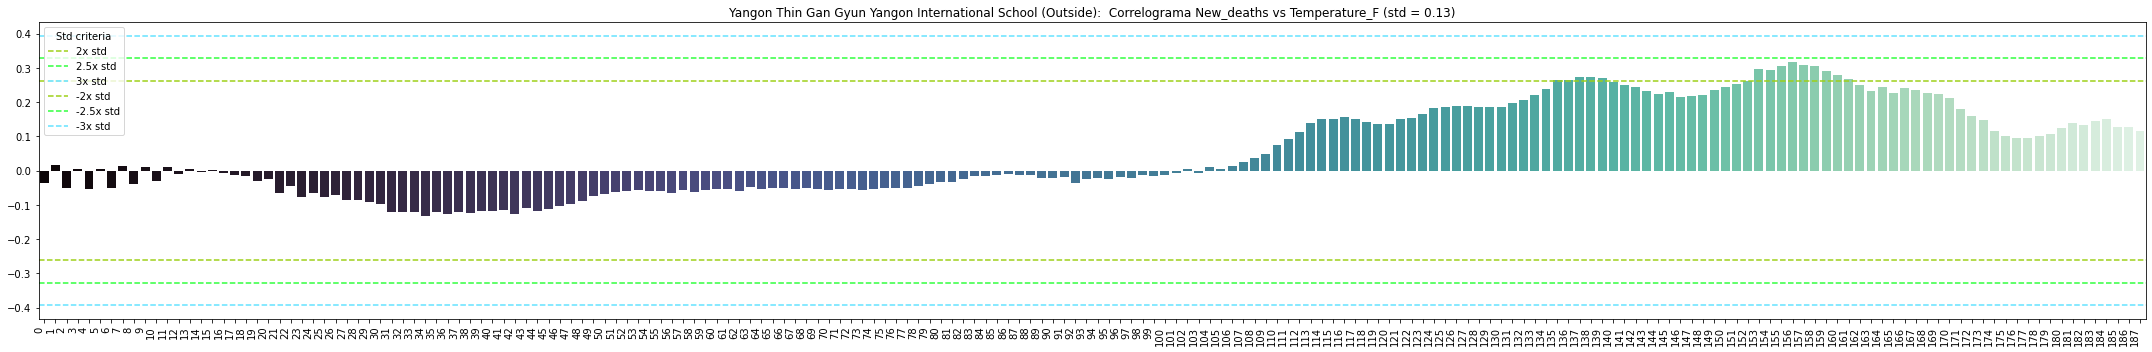

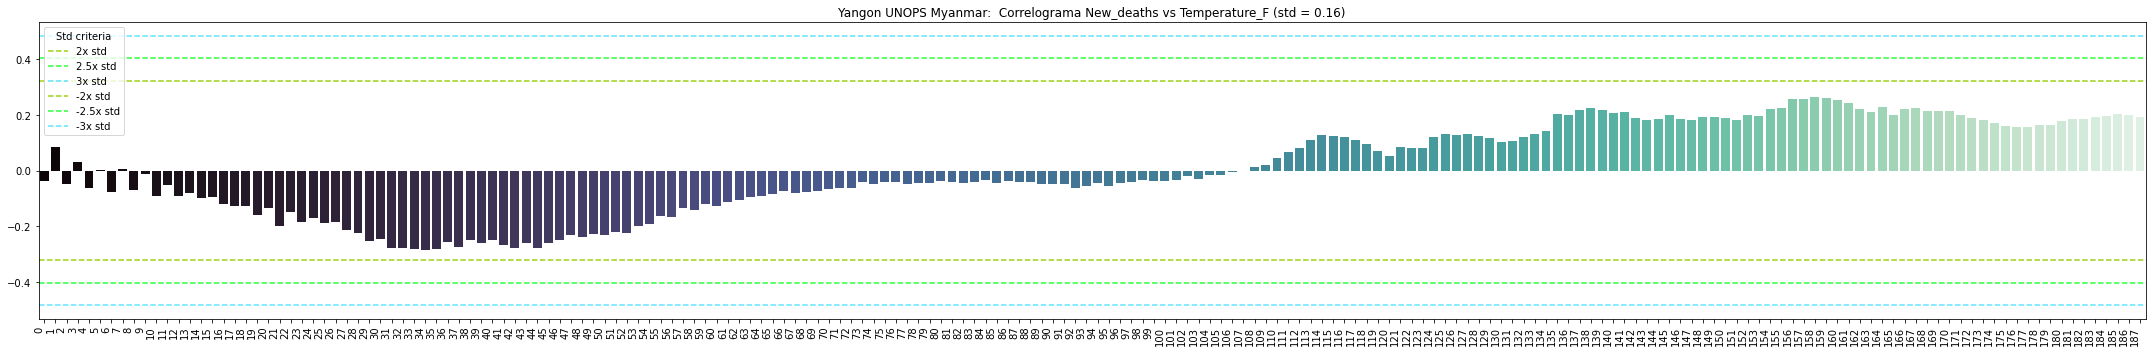

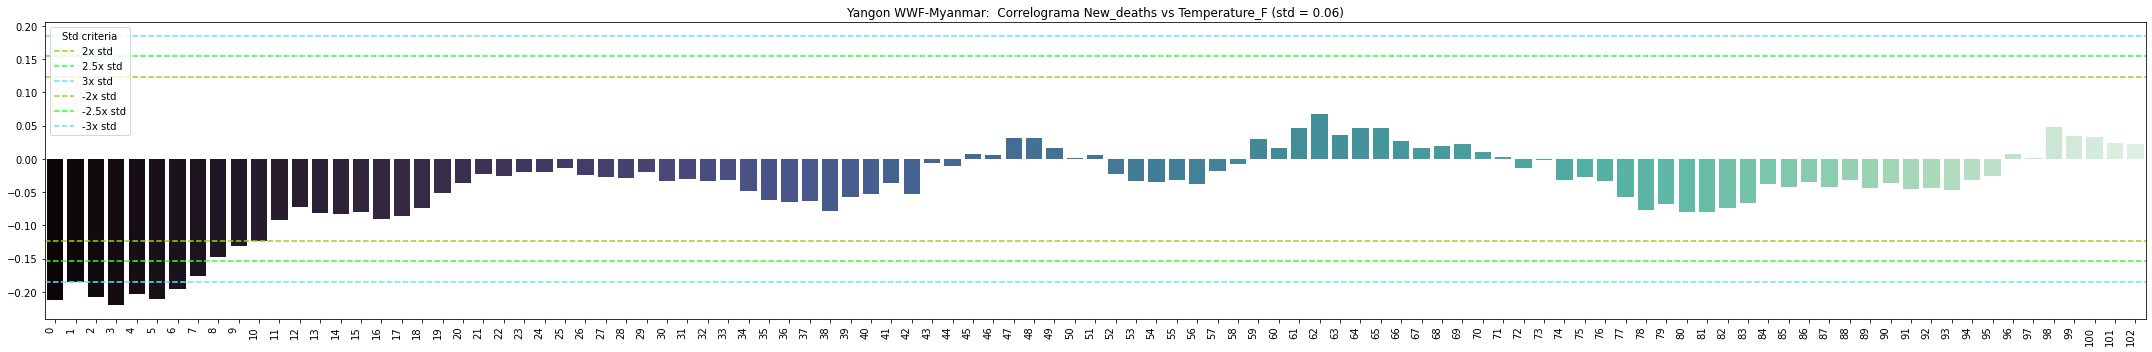

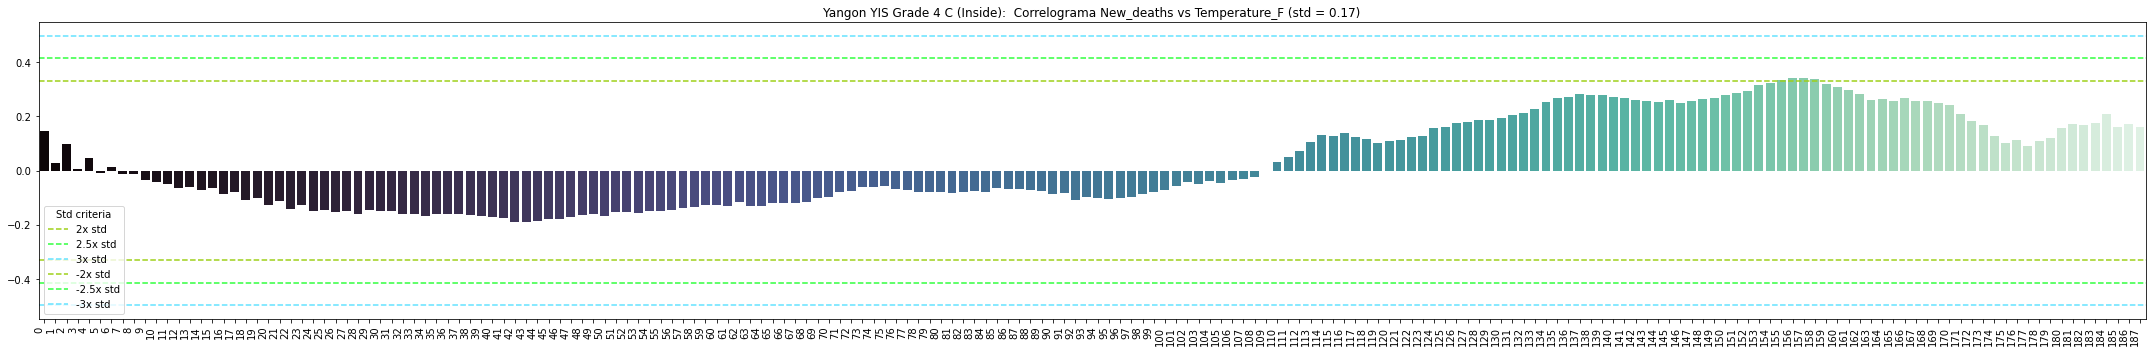

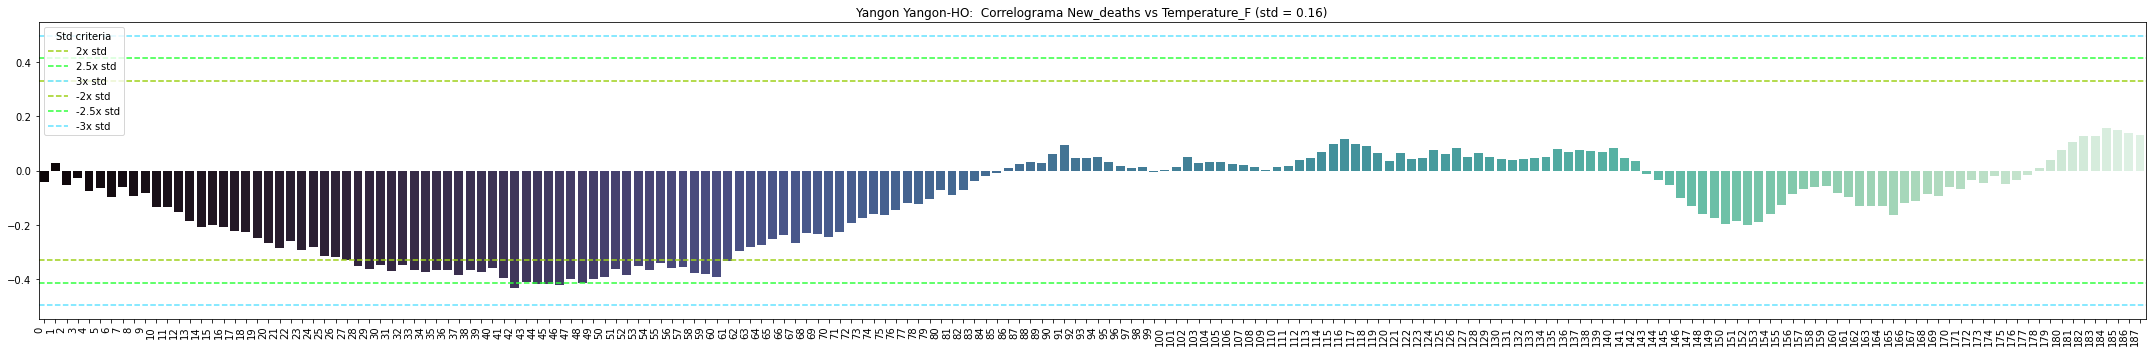

In [43]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(city_data[col2], city_data[col1], city + ': ', H)

#### Nuevos casos de enfermos vs % de Humedad

In [ ]:
sel_numerical_cols = ['Humidity_%']
sel_effects_cols = ['New_cases']

In [ ]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(city_data[col2], city_data[col1], city + ': ', H)

Observamos que en la mayoría de centros de medición, la correlación entre la cantidad de nuevos casos de enfermos y el AQI es negativa la mayoría del tiempo, lo cual nos quiere decir que cuando una de estas variables disminuye aumenta la otra en el futuro. Este resultado es importante, ya que contradice la intuición que cuando los contaminantes son mayores existen más casos de enfermos.

#### Nuevos casos de muertes vs % de Humedad

In [ ]:
sel_numerical_cols = ['Humidity_%']
sel_effects_cols = ['New_deaths']

In [ ]:
for i in range(len(cities)):
    city_data = df_city_grouped_mean[df_city_grouped_mean.City == cities[i]].sort_values(by = 'Date')
    for col1 in sel_numerical_cols:
        H = int(len(center_data) / 2) - 1
        for col2 in sel_effects_cols:
            plot_correlogram(city_data[col2], city_data[col1], city + ': ', H)

In [9]:
list(set(features.Season))

['Cool Season', 'Rainy Season', 'Hot Season']